### Import neccessary packages ###

In [105]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline
import seaborn as sbn
from sklearn.preprocessing import StandardScaler
from timeit import default_timer as timer
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

### Read the file ###

In [106]:
# load the file
houseData = pd.read_csv('AmesHousing.csv', keep_default_na=False)


In [107]:
# Check the initial shape of the data. The result is 2930 rows, 82 columns
print ('Initial shape of the houseData is', houseData.shape)


Initial shape of the houseData is (2930, 82)


In [108]:
# See the initial data types of each columns
houseData.dtypes

Order              int64
PID                int64
MS SubClass        int64
MS Zoning         object
Lot Frontage      object
Lot Area           int64
Street            object
Alley             object
Lot Shape         object
Land Contour      object
Utilities         object
Lot Config        object
Land Slope        object
Neighborhood      object
Condition 1       object
Condition 2       object
Bldg Type         object
House Style       object
Overall Qual       int64
Overall Cond       int64
Year Built         int64
Year Remod/Add     int64
Roof Style        object
Roof Matl         object
Exterior 1st      object
Exterior 2nd      object
Mas Vnr Type      object
Mas Vnr Area      object
Exter Qual        object
Exter Cond        object
                   ...  
Bedroom AbvGr      int64
Kitchen AbvGr      int64
Kitchen Qual      object
TotRms AbvGrd      int64
Functional        object
Fireplaces         int64
Fireplace Qu      object
Garage Type       object
Garage Yr Blt     object


In [109]:
# Check duplicates row in dataframe. The result is we find no duplicates in the data row.
houseData[houseData.duplicated(keep=False)]

Empty DataFrame
Columns: [Order, PID, MS SubClass, MS Zoning, Lot Frontage, Lot Area, Street, Alley, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Pool QC, Fence, Misc Feature, Misc Val, Mo Sold, Yr Sold, Sale Type, Sale Condition, SalePrice]
Index: []

[0 rows x 82 columns]

In [110]:
# Removing spaces from column names to have better access
houseData.columns = houseData.columns.str.replace(' ',"")

# Change the empty field into NAN
houseData.replace(to_replace = "", value = np.NAN,inplace=True)

# See all the columns in dataframe houseData
houseData.columns

Index(['Order', 'PID', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemod/Add', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 

In [111]:
# Check how many columns contains empty value (empty row)
houseData.columns[houseData.isnull().sum() != 0].size

21

In [112]:
# Display which columns has empty value (empty row)
houseData.columns[houseData.isnull().sum() != 0]

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath',
       'BsmtHalfBath', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond'],
      dtype='object')

In [113]:
# See how many values are empty in each column which has empty value (empty row)
houseData.loc[:,houseData.columns[houseData.isnull().sum() != 0]].isnull().sum().sort_values()

BsmtUnfSF         1
GarageArea        1
GarageCars        1
Electrical        1
TotalBsmtSF       1
GarageQual        1
BsmtFinSF2        1
GarageCond        1
BsmtFinType1      1
BsmtCond          1
BsmtQual          1
BsmtFinSF1        1
BsmtFinType2      2
BsmtFullBath      2
BsmtHalfBath      2
GarageFinish      2
BsmtExposure      4
MasVnrArea       23
MasVnrType       23
GarageYrBlt     159
LotFrontage     490
dtype: int64

## DATA CLEANING ##

**Part 1. Fill in missing value**

a. We fill in 159 empty value in column "GarageYrBlt" with the 0 (zero) value because it means that the property has no garage. In the corresponding row in column 'GarageType', it mentioned that the row which has NaN value in the column "GarageYrBlt", is not having garage (NA).


In [114]:
# Fill NaN in column 'GarageYrBlt' based in value from 'YearBuilt'
houseData['GarageYrBlt'].fillna(value = 0, inplace = True)


b. LotFrontage is most likely similar in the same neighborhood. We fill the missing value in column 'LotFrontage' with median value of LotFrontage in the corresponding neighborhood. <br>
We will get warning message after run above code: Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1018: RuntimeWarning: Mean of empty slice return np.nanmean(a, axis, out=out, keepdims=keepdims)<br>
It means that there is groupby neighborhood which has empty 'LotFrontage'. <br>
If the median result of the similar neighborhood is np.NAN (i.e there is no LotFrontAge value in those neighborhood, then fill lotFrontage value with 0). <br>


In [115]:
# We fill the missing value in column 'LotFrontage' with median value of LotFrontage in the corresponding neighborhood
houseData['LotFrontage'] = houseData.groupby(["Neighborhood"])['LotFrontage'].transform(lambda x:x.fillna(x.median()))

# We will get warning message after run above code: Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1018: RuntimeWarning: Mean of empty slice return np.nanmean(a, axis, out=out, keepdims=keepdims)
# It means that there is groupby neighborhood which has empty 'LotFrontage'.
# If the median result of the similar neighborhood is np.NAN (i.e there is no LotFrontAge value in those neighborhood, then fill lotFrontage value with 0)
houseData['LotFrontage'].fillna(value = 0, inplace = True)
    
# Check missing value in LotFrontage 
houseData[houseData['LotFrontage'].isnull()] 

/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1076: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Empty DataFrame
Columns: [Order, PID, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemod/Add, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 82 columns]

c. Fill missing value in column 'GarageFinish',  'GarageQual', 'GarageCond' with NA (No Garage).

In [116]:
# Fill missing value in column 'GarageFinish', 'GarageQual', 'GarageCond' with NA (No Garage).
for column in ['GarageFinish', 'GarageQual', 'GarageCond']:
    houseData[column].fillna("NA", inplace=True)

d. Fill missing value in column 'GarageArea' and 'GarageCars' with 0 (it means the property has no Garage area, hence no car in the garage).

In [117]:
# Fill missing value in column 'GarageArea' and 'GarageCars' with 0 (it means the property has no Garage area, hence no car in the garage).
houseData['GarageArea'] = houseData['GarageArea'].fillna(value = 0)
houseData['GarageCars'] = houseData['GarageCars'].fillna(value = 0)

e. Fill missing value in column 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2' with NA (it means the property has no basement).

In [118]:
# Fill missing value in column 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2' with NA.
for column in ['BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2']:
    houseData[column].fillna("NA", inplace=True)

f. Fill missing value in column 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'BsmtHalfBath', 'BsmtFullBath', and 'TotalBsmtSF' with value 0. No basement means having 0 area or squarefeet of basement.

In [119]:
# Fill missing value in column 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'BsmtHalfBath', 'BsmtFullBath', and 'TotalBsmtSF' with value 0

for column in ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'BsmtHalfBath', 'BsmtFullBath', 'TotalBsmtSF']:
    houseData[column].fillna(value = 0, inplace=True)

g. We fill the missing value in column 'BsmtExposure' with most frequent value of 'BsmtExposure' in the corresponding (groupby) 'BsmtCond'.

In [120]:
# Fill the missing value in column 'BsmtExposure' with most frequent value of 'BsmtExposure' in the corresponding (groupby) 'BsmtCond'
houseData['BsmtExposure'] = houseData.groupby(["BsmtCond"])['BsmtExposure'].apply(lambda x:x.fillna(x.value_counts().index.tolist()[0]))

h. We fill missing value in column 'Electrical' with most frequent value (mode) in this column. It seems that most housing in these days has electrical. The value will be SBrkr (Standard Circuit Breakers & Romex).


In [121]:
# Fill missing value in column 'Electrical' with most frequent value (mode) in this column.
houseData['Electrical'] = houseData['Electrical'].fillna(houseData['Electrical'].mode()[0])

i. We fill missing value in column 'MasVnrType' with 'None' and missing value in column 'MasVnrArea' with value zero (0).

In [122]:
# We fill missing value in column 'MasVnrType' with 'None' and missing value in column 'MasVnrArea' with value zero (0)
houseData['MasVnrType'] = houseData['MasVnrType'].fillna("None")
houseData['MasVnrArea'] = houseData['MasVnrArea'].fillna(value = 0)

In [123]:
# Check again the missing value
houseData.columns[houseData.isnull().sum() != 0]

Index([], dtype='object')

**Part 2. Convert the categorical variables into ordinal variables**

a. Columns 'ExterQual','PoolQC' ,'ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu', 'GarageQual','GarageCond' have same categorical values. So we can map them with same key-value pairs.

In [124]:
houseData.loc[:, ['ExterQual','PoolQC' ,'ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu', 'GarageQual','GarageCond']].sample(10)


ExterQual PoolQC ExterCond BsmtQual BsmtCond HeatingQC KitchenQual  \
1250        TA     NA        TA       TA       TA        Gd          TA   
2816        TA     NA        Gd       Gd       TA        Gd          TA   
444         Gd     NA        TA       Gd       TA        Ex          Gd   
2404        Ex     NA        TA       Ex       TA        Ex          Ex   
1225        TA     NA        Gd       TA       TA        Gd          Gd   
2001        TA     NA        Gd       TA       TA        Ex          TA   
988         Gd     NA        Ex       TA       TA        Ex          TA   
2168        TA     NA        TA       Gd       TA        Gd          TA   
1062        Gd     NA        TA       Ex       TA        Ex          Ex   
1767        Ex     NA        TA       Ex       TA        Ex          Ex   

     FireplaceQu GarageQual GarageCond  
1250          NA         TA         TA  
2816          NA         TA         TA  
444           Gd         TA         TA  
2404          Gd         TA         TA  
1225          Gd         TA         TA  
2001          NA         TA         TA  
988           TA         TA         TA  
2168          Fa         TA         TA  
1062          Gd         TA         TA  
1767          Ex         TA         TA

In [125]:
# Columns 'ExterQual','PoolQC' ,'ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu', 'GarageQual','GarageCond' have same categorical values. So we can map them with same key-value pairs
convert_dict = {"NA": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
cols = ['ExterQual','PoolQC' ,'ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu', 'GarageQual','GarageCond']
for col in cols:
    houseData[col].replace(convert_dict, inplace=True)

b. Convert BsmtExposure, BsmtFinType1 and BsmtFinType2 into categorical values

In [126]:
# Convert BsmtExposure
houseData['BsmtExposure'].replace({"NA": 0, "No": 1, "Mn": 2, "Av": 3, "Gd": 4}, inplace=True)
houseData['BsmtExposure'].sample(10)

2351    1
2775    3
1049    1
1775    1
2731    4
2541    1
2250    1
613     1
2344    1
2563    1
Name: BsmtExposure, dtype: int64

In [127]:
# Convert BsmtFinType1 and BsmtFinType2
convert_dict = {"NA": 0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ": 6}
houseData["BsmtFinType1"].replace(convert_dict, inplace=True)
houseData["BsmtFinType2"].replace(convert_dict, inplace=True)
houseData.loc[:, ["BsmtFinType1", "BsmtFinType2"]].sample(10)

BsmtFinType1  BsmtFinType2
2691             1             1
1280             4             1
117              3             1
246              6             1
1088             1             1
2790             6             1
2511             6             1
859              3             1
2121             5             4
1807             1             1

In [128]:
# Convert Functional, GarageFinish, Fence
houseData["Functional"].replace({"NA": 0, "Sal": 1, "Sev": 2, "Maj2": 3, "Maj1": 4, "Mod": 5, "Min2": 6, "Min1": 7, "Typ": 8}, inplace=True)
houseData["GarageFinish"].replace({"NA": 0, "Unf": 1, "RFn": 2, "Fin": 3}, inplace=True)
houseData["Fence"].replace({"NA": 0, "MnWw": 1, "GdWo": 2, "MnPrv": 3, "GdPrv": 4}, inplace=True)
houseData.loc[:, ["Functional", "GarageFinish", "Fence"]].sample(10)

Functional  GarageFinish  Fence
1715           8             2      0
1456           8             2      0
2273           8             2      0
1513           8             0      0
1430           8             2      0
1343           6             1      0
2286           8             3      0
2456           8             3      0
1973           8             2      0
2072           8             3      4

c. Convert CentralAir

In [129]:
# Convert CentralAir
houseData["CentralAir"].replace({"N": 0, "Y": 1}, inplace=True)
houseData["CentralAir"].sample(10)

785     1
1516    0
1325    1
702     1
862     1
2538    1
398     1
2300    1
2906    1
41      1
Name: CentralAir, dtype: int64

d. For the other categorical variables which is not ordinal values, we can use LabelEncoder from sklearn to convert them to numerical variables

In [130]:
# For the other categorical variables which is not ordinal values, we can use LabelEncoder from sklearn to convert them to numerical variables
encoder = LabelEncoder()

# list of columns.
cols = ['MSZoning','LotConfig','Neighborhood','Exterior1st','BldgType','HouseStyle','MSSubClass','Foundation',
        'Condition1','RoofStyle','SaleCondition','Exterior2nd','SaleType','Street','MasVnrType','Alley',
        'LotShape','LandContour','Utilities','LandSlope','Condition2','RoofMatl','Heating','Electrical',
        'GarageType','PavedDrive','MiscFeature']

# convert to numerical.
for col in cols:
    encoder.fit(houseData[col])
    houseData[col] = encoder.transform(houseData[col])

# check
houseData.loc[:, cols].sample(10)

MSZoning  LotConfig  Neighborhood  Exterior1st  BldgType  HouseStyle  \
1427         5          1            23           13         0           5   
2808         5          4             5           13         0           5   
2735         5          1             7            9         0           7   
1788         5          4            24            5         0           2   
154          5          4            15           13         0           2   
997          5          4             8            6         0           2   
595          5          4            15           13         0           2   
2301         5          0            14            6         0           2   
2691         6          3            11            0         0           5   
1884         5          4            15            8         0           2   

      MSSubClass  Foundation  Condition1  RoofStyle  ...  LandContour  \
1427           5           2           2          1  ...            3   
2808           5           2           2          1  ...            3   
2735           8           1           2          0  ...            3   
1788           0           2           2          1  ...            3   
154            0           3           2          1  ...            3   
997            0           2           2          1  ...            3   
595            0           1           2          1  ...            3   
2301           0           1           2          1  ...            3   
2691           6           0           2          1  ...            3   
1884           0           1           2          1  ...            3   

      Utilities  LandSlope  Condition2  RoofMatl  Heating  Electrical  \
1427          0          0           2         1        1           4   
2808          0          0           2         1        1           4   
2735          0          0           2         5        1           4   
1788          0          0           2         1        1           4   
154           0          0           2         1        1           4   
997           0          0           2         1        1           4   
595           0          0           2         1        1           4   
2301          0          0           2         1        1           4   
2691          0          0           2         1        1           4   
1884          0          0           2         1        1           4   

      GarageType  PavedDrive  MiscFeature  
1427           1           2            2  
2808           1           2            2  
2735           1           2            2  
1788           1           2            2  
154            5           2            2  
997            1           2            2  
595            5           2            2  
2301           1           2            2  
2691           5           0            2  
1884           1           2            4  

[10 rows x 27 columns]

d. Check columns are not int and we need to convert those variables to numeric.

In [131]:
# Check columns are not int
houseData.select_dtypes(exclude=[np.integer]).columns

Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea'],
      dtype='object')

In [132]:
# We need to convert those variables to numeric
cols = ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea']

for col in cols:
    houseData[col] = pd.to_numeric(houseData[col])

# Check
houseData.loc[:, cols].head(10)

LotFrontage  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0        141.0         112         639           0        441         1080   
1         80.0           0         468         144        270          882   
2         81.0         108         923           0        406         1329   
3         93.0           0        1065           0       1045         2110   
4         74.0           0         791           0        137          928   
5         78.0          20         602           0        324          926   
6         41.0           0         616           0        722         1338   
7         43.0           0         263           0       1017         1280   
8         39.0           0        1180           0        415         1595   
9         60.0           0           0           0        994          994   

   BsmtFullBath  BsmtHalfBath  GarageYrBlt  GarageCars  GarageArea  
0             1             0         1960           2         528  
1             0             0         1961           1         730  
2             0             0         1958           1         312  
3             1             0         1968           2         522  
4             0             0         1997           2         482  
5             0             0         1998           2         470  
6             1             0         2001           2         582  
7             0             0         1992           2         506  
8             1             0         1995           2         608  
9             0             0         1999           2         442

In [133]:
houseData.sample(20)

Order        PID  MSSubClass  MSZoning  LotFrontage  LotArea  Street  \
1234   1235  535150210           0         5         73.0     7390       1   
489     490  528290190           8         5         62.0     7750       1   
336     337  923276250          10         5         70.0     7700       1   
660     661  535381040           4         5         60.0    10410       1   
2000   2001  902404010           1         6         90.0     8100       1   
419     420  527455280           0         5         73.0    10710       1   
856     857  907202080           0         5         70.0     7000       1   
1472   1473  907405020           0         5         70.0     9135       1   
626     627  535125090           5         5         85.0    13600       1   
1676   1677  527450150          13         6         21.0     1890       1   
2637   2638  902101050           4         6         60.0     9600       1   
431     432  528110010           5         5         97.0    13478       1   
635     636  535175050           0         5         66.0    12400       1   
433     434  528110090           5         5        107.0    13891       1   
1451   1452  907227050           0         5         60.0     7180       1   
1764   1765  528340030           5         5         89.0    10557       1   
2499   2500  533110130           5         5        121.0    16059       1   
1354   1355  903401050           4         5         51.0     9144       1   
2474   2475  531375100           0         5         63.0    13072       1   
1862   1863  534104090           5         2         72.5     7050       1   

      Alley  LotShape  LandContour  ...  PoolArea  PoolQC  Fence  MiscFeature  \
1234      1         0            3  ...         0       0      0            2   
489       1         3            3  ...         0       0      0            2   
336       1         3            3  ...         0       0      0            4   
660       0         3            3  ...         0       0      0            2   
2000      2         3            3  ...         0       0      2            2   
419       1         3            3  ...         0       0      0            4   
856       1         0            3  ...         0       0      2            2   
1472      1         3            3  ...         0       0      0            2   
626       1         3            3  ...         0       0      0            2   
1676      1         3            3  ...         0       0      0            2   
2637      0         3            3  ...         0       0      0            2   
431       1         0            3  ...         0       0      0            2   
635       1         0            3  ...         0       0      0            2   
433       1         3            3  ...         0       0      0            2   
1451      1         0            3  ...         0       0      0            2   
1764      1         0            3  ...         0       0      0            2   
2499      1         3            3  ...         0       0      0            2   
1354      2         3            3  ...         0       0      0            2   
2474      1         3            3  ...         0       0      0            2   
1862      1         3            3  ...         0       0      0            2   

      MiscVal  MoSold  YrSold  SaleType  SaleCondition  SalePrice  
1234        0       7    2008         9              4     135000  
489         0       3    2009         9              4     156000  
336       600       2    2010         9              4     159000  
660         0       6    2009         9              4     142900  
2000        0       6    2007         0              4     153500  
419      1200       7    2009         9              4     148800  
856         0       7    2009         9              4     136500  
1472        0      12    2008         9              4     214000  
626         0      10    2009         9              

e. We set the Order column as index

In [134]:
# Set Order column as index
houseData.set_index('Order', inplace=True)

f. We remove PID column since we think it's not relevant to predictive model

In [135]:
# Remove PID column since it's not relevant to predictive model
houseData.drop(columns=['PID'], inplace=True)

## DATA OBSERVATION ##

The target column is 'SalePrice'. We can display the correlation between column 'SalePrice' to the other column.

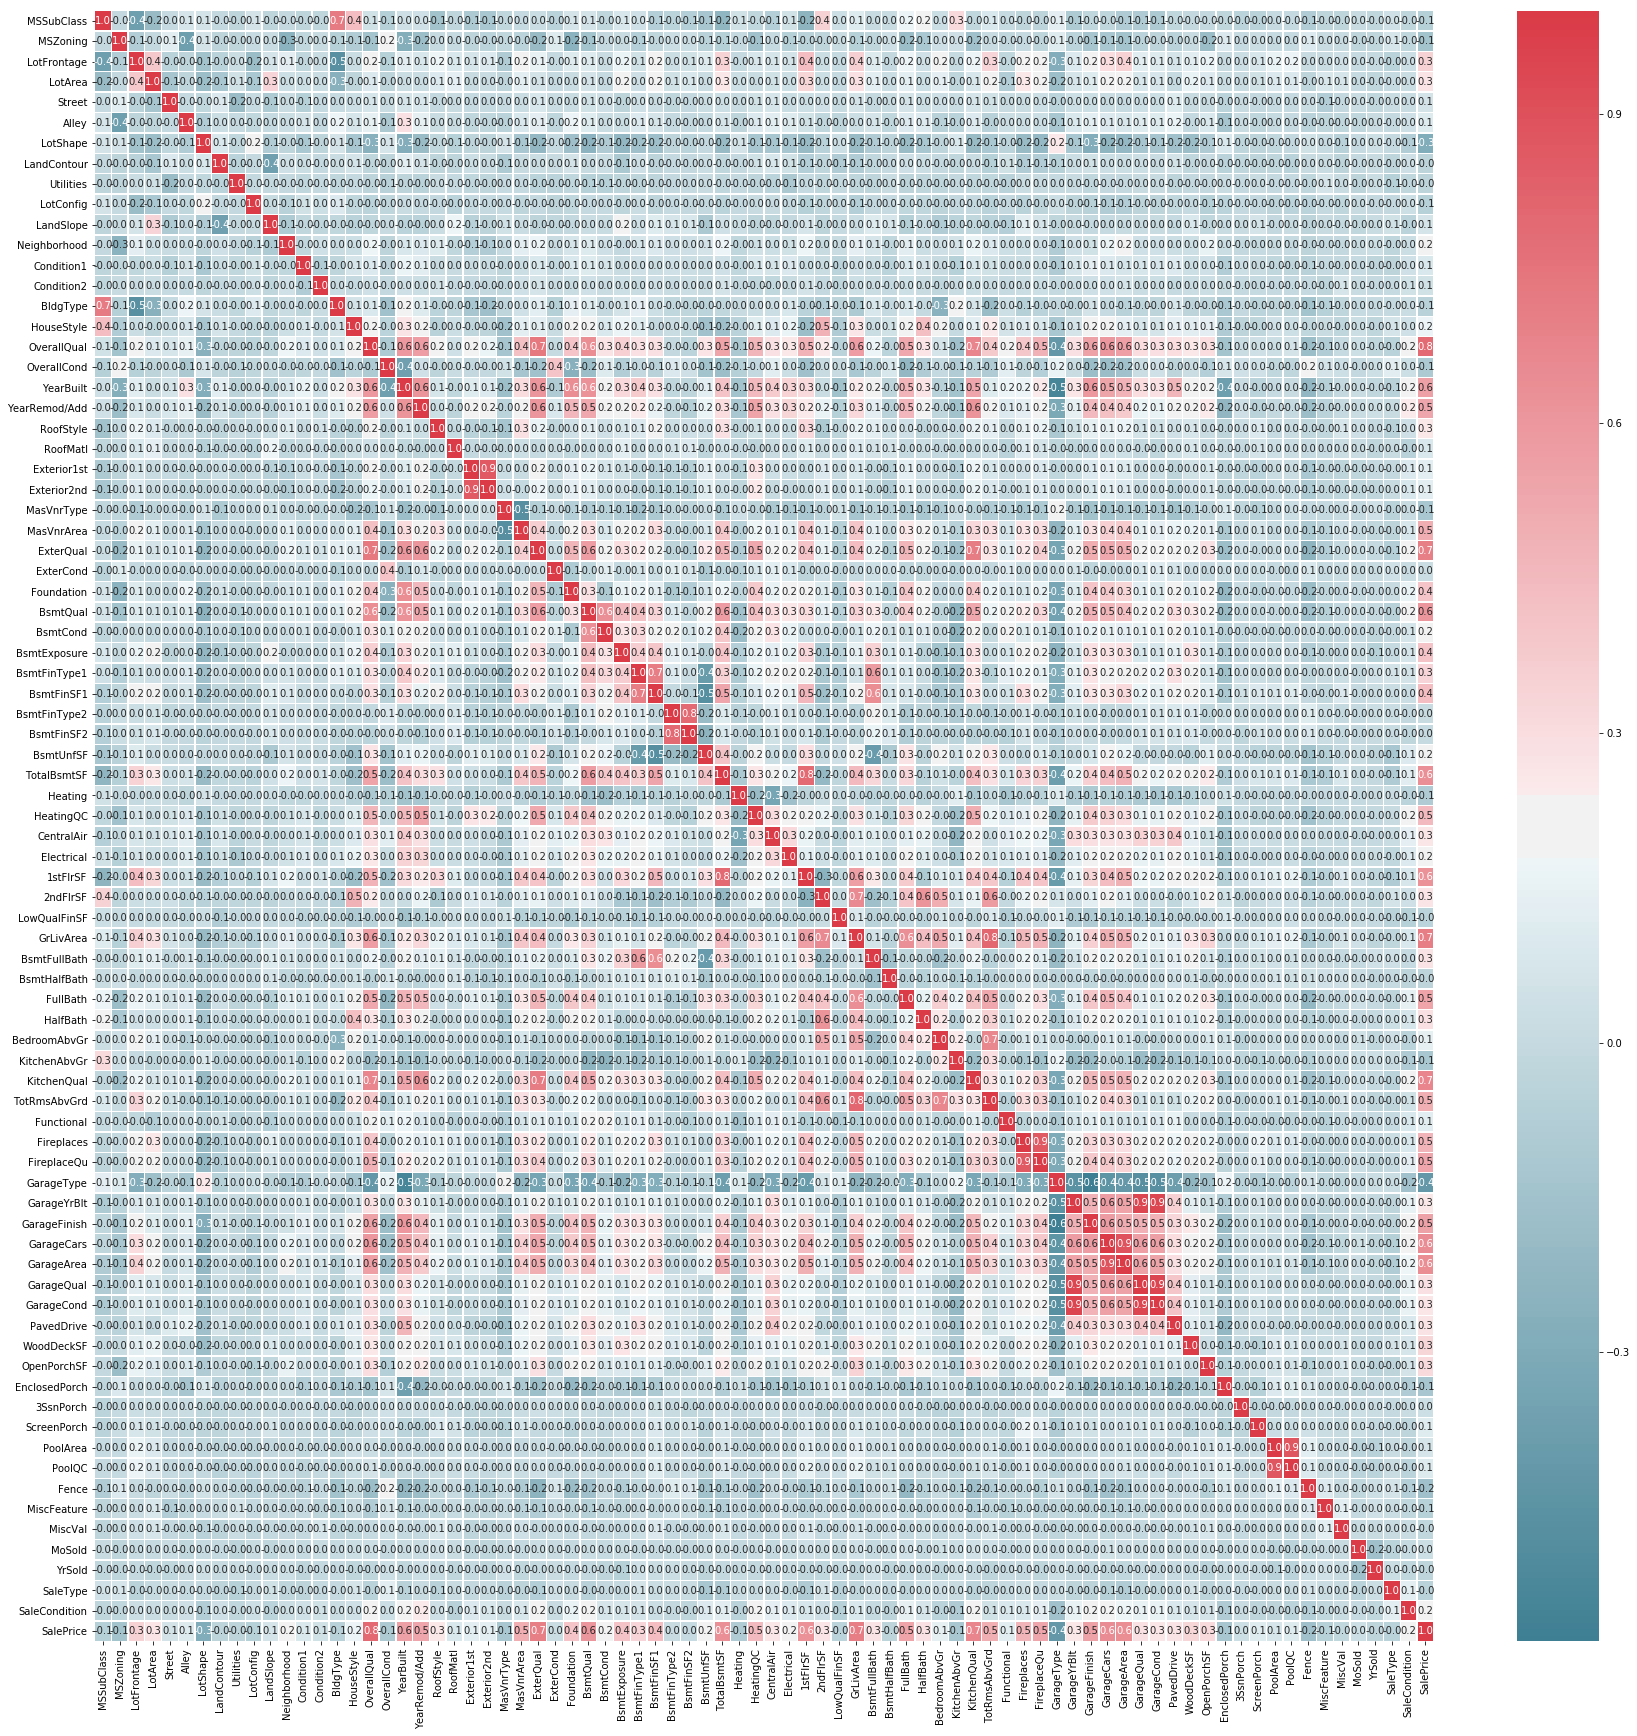

In [136]:
# Display the correlation heatmap

fig = plt.figure(figsize=(30,30))
ax = fig.add_subplot(1,1,1)
colormap = sbn.diverging_palette(220, 10, as_cmap=True)
sbn.heatmap(houseData.corr(), cmap=colormap, annot=True, linewidths=.4, fmt='.1f', ax=ax)

In [137]:
# Sorted the most important features correlated to Sale Price
corr = houseData.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print("Most important feature correlated to Sale Price")
print(corr.SalePrice)

Most important feature correlated to Sale Price
SalePrice        1.000000
OverallQual      0.799262
GrLivArea        0.706780
ExterQual        0.697970
KitchenQual      0.672914
GarageCars       0.647562
GarageArea       0.640138
TotalBsmtSF      0.632529
1stFlrSF         0.621676
BsmtQual         0.607532
YearBuilt        0.558426
GarageFinish     0.549899
FullBath         0.545604
FireplaceQu      0.533901
YearRemod/Add    0.532974
MasVnrArea       0.502196
TotRmsAbvGrd     0.495474
Fireplaces       0.474558
HeatingQC        0.450325
BsmtFinSF1       0.433147
BsmtExposure     0.412216
Foundation       0.406601
LotFrontage      0.349463
BsmtFinType1     0.336965
WoodDeckSF       0.327143
OpenPorchSF      0.312951
HalfBath         0.285056
GarageQual       0.277952
PavedDrive       0.275964
BsmtFullBath     0.275823
                   ...   
RoofMatl         0.087918
PoolArea         0.068403
LandSlope        0.066396
Street           0.059519
Condition2       0.054331
MoSold          

Based on correlation heatmap above, some features which has high correlation with 'SalePrice' are: OverallQual,GrLivArea,ExterQual, KitchenQual, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF, BsmtQual This correlation will be proven after we run our algorithm modelling.

In [138]:
# Show the correlation summary
houseData.corr()

MSSubClass  MSZoning  LotFrontage   LotArea    Street  \
MSSubClass       1.000000 -0.006329    -0.372050 -0.196098  0.003079   
MSZoning        -0.006329  1.000000    -0.074488 -0.010588  0.121061   
LotFrontage     -0.372050 -0.074488     1.000000  0.388280 -0.046829   
LotArea         -0.196098 -0.010588     0.388280  1.000000 -0.133966   
Street           0.003079  0.121061    -0.046829 -0.133966  1.000000   
Alley            0.067993 -0.371265    -0.036865 -0.027129 -0.003542   
LotShape         0.056495  0.057889    -0.144939 -0.177461 -0.017853   
LandContour     -0.007419 -0.035519    -0.044029 -0.120979  0.093747   
Utilities       -0.027523 -0.027307     0.022872  0.054454 -0.190961   
LotConfig        0.060164  0.004010    -0.182909 -0.116868  0.002211   
LandSlope       -0.029636  0.014524     0.065640  0.334766 -0.093787   
Neighborhood    -0.007171 -0.252405     0.133642  0.035629  0.013405   
Condition1      -0.028786 -0.017240    -0.017835  0.031729 -0.064432   
Condition2      -0.022772  0.009805     0.014262  0.020257  0.000628   
BldgType         0.718842 -0.064184    -0.464420 -0.260507  0.005283   
HouseStyle       0.434708 -0.081271     0.022786 -0.026946  0.025979   
OverallQual      0.054567 -0.141962     0.201778  0.097188  0.072496   
OverallCond     -0.067008  0.179918    -0.056006 -0.034759  0.018069   
YearBuilt        0.039857 -0.273121     0.119596  0.023258  0.062254   
YearRemod/Add    0.043715 -0.178601     0.085472  0.021682  0.080505   
RoofStyle       -0.146568  0.001399     0.174956  0.099047 -0.008225   
RoofMatl        -0.021228  0.005883     0.088740  0.138358  0.007484   
Exterior1st     -0.101077 -0.035825     0.071074  0.011129  0.001354   
Exterior2nd     -0.122687 -0.037623     0.101875  0.018142  0.000604   
MasVnrType      -0.017404 -0.015628    -0.088679 -0.030253  0.002585   
MasVnrArea       0.002477 -0.038052     0.220205  0.125950  0.022296   
ExterQual        0.019897 -0.194871     0.148925  0.059433  0.080900   
ExterCond       -0.044082  0.107372    -0.003066  0.004292  0.014723   
Foundation       0.063833 -0.247830     0.110472  0.016576  0.012585   
BsmtQual         0.061225 -0.140887     0.110642  0.058186  0.051694   
...                   ...       ...          ...       ...       ...   
BedroomAbvGr     0.030091  0.038123     0.228522  0.136569  0.040366   
KitchenAbvGr     0.309991  0.039167     0.004299 -0.020301  0.013293   
KitchenQual     -0.013369 -0.158149     0.170448  0.079323  0.065567   
TotRmsAbvGrd     0.089628  0.008156     0.334023  0.216597  0.052044   
Functional       0.002324 -0.017234    -0.015947 -0.074884  0.009095   
Fireplaces      -0.030669 -0.004544     0.240240  0.256989  0.018081   
FireplaceQu     -0.031738 -0.026888     0.230255  0.187922  0.033295   
GarageType       0.133587  0.114355    -0.280556 -0.168533 -0.042078   
GarageYrBlt     -0.096321 -0.038368     0.102193  0.073049  0.034857   
GarageFinish    -0.017776 -0.129876     0.197907  0.111393  0.033534   
GarageCars      -0.022507 -0.120964     0.300179  0.179456  0.015411   
GarageArea      -0.086944 -0.142014     0.351545  0.212749  0.003326   
GarageQual      -0.089035 -0.045828     0.119771  0.085092  0.034558   
GarageCond      -0.103527 -0.031764     0.109662  0.074817  0.035430   
PavedDrive      -0.016581 -0.043519     0.066660  0.004334  0.109380   
WoodDeckSF      -0.006880  0.010791     0.119759  0.157212  0.009730   
OpenPorchSF     -0.011842 -0.179556     0.156742  0.103760  0.007398   
EnclosedPorch   -0.023138  0.095054     0.009170  0.021868 -0.039905   
3SsnPorch       -0.041573  0.002163     0.029496  0.016243  0.006614   
ScreenPorch     -0.048894  0.022419     0.075053  0.055044 -0.006764   
PoolArea         0.004022  0.002386     0.155085  0.093775  0.004042   
PoolQC          -0.003715  0.002434     0.169462  0.096183  0.004124   
Fence           -0.084292  0.102662     0.011028 -0.030525  0.017375   
MiscFeature     -0.028048  0.006731     0.016602  0.081

We try to get some information from the dependant variable  (column 'SalePrice').

In [139]:
# Get information from column 'SalePrice'
# We will see that the SalePrice minimum value is greater than zero.
houseData['SalePrice'].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

We plot column 'SalePrice' with the top three features (as our example) which has highest correlation from correlation heatmap, to get better understanding.

Draw the scatter to see any outliers in the dataframe houseData. Now we plot SalePrice with GrLivArea.<br>
From the picture below, we can see that there are three outliers in the dataframe. The outlier tells us that there are 3 houses with very large Ground Living Area but having very low price. We decide to remove these outliers to make a good prediction later on.

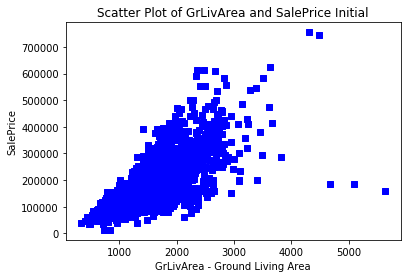

In [140]:
# Looking for outliers
plt.scatter(x = houseData.GrLivArea, y = houseData.SalePrice, c = "blue", marker = "s")
plt.title("Scatter Plot of GrLivArea and SalePrice Initial")
plt.xlabel("GrLivArea - Ground Living Area")
plt.ylabel("SalePrice")
plt.show()

In [141]:
# Remove these outliers to make a good prediction later on
houseData = houseData.drop(houseData[(houseData['GrLivArea']>4000) & (houseData['SalePrice']<300000)].index)

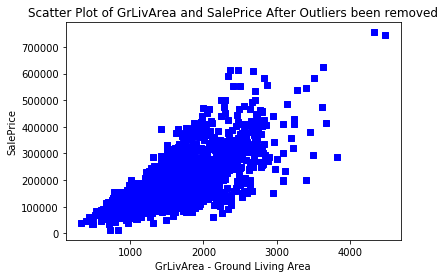

In [142]:
# Display the graph after three outliers have been removed
plt.scatter(x = houseData.GrLivArea, y = houseData.SalePrice, c = "blue", marker = "s" )
plt.title("Scatter Plot of GrLivArea and SalePrice After Outliers been removed")
plt.xlabel("GrLivArea - Ground Living Area")
plt.ylabel("SalePrice")
plt.show()

Now we plot SalePrice with 'OverallQual' (Rates the overall material and finish of the house).
From the picture below, we can see that if the house is having better overal quality, then the price will also better.

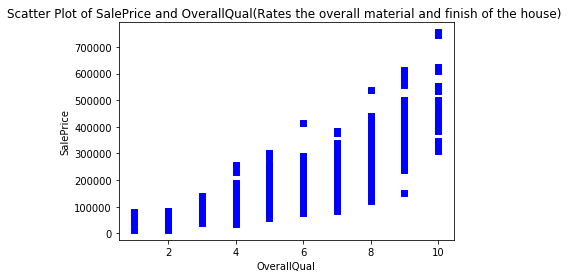

In [143]:
# Plot 'SalePrice' and 'OverallQual' (Rates the overall material and finish of the house)
plt.scatter(x = houseData.OverallQual, y = houseData.SalePrice, c = "blue", marker = "s")
plt.title("Scatter Plot of SalePrice and OverallQual(Rates the overall material and finish of the house) ")
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")
plt.show()

We now plot SalePrice with 'ExterQual' (Evaluates the quality of the material on the exterior).
From the picture below, we can see that if the house is having better ExterQual(Evaluates the quality of the material on the exterior), then the price will also better.

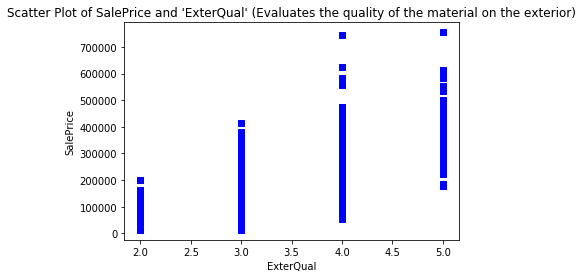

In [144]:
# Plot 'SalePrice' and 'ExterQual' (Evaluates the quality of the material on the exterior).
plt.scatter(x = houseData.ExterQual, y = houseData.SalePrice, c = "blue", marker = "s")
plt.title("Scatter Plot of SalePrice and 'ExterQual' (Evaluates the quality of the material on the exterior)")
plt.xlabel("ExterQual")
plt.ylabel("SalePrice")
plt.show()

We see the distribution of label values (SalePrice)

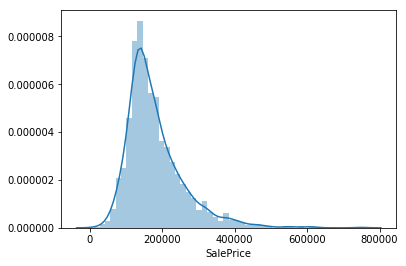

In [145]:
# Check the distribution of label values (SalePrice)
sbn.distplot(houseData['SalePrice'])


In [146]:
# Skewness metric
houseData['SalePrice'].skew()

1.7425011929188197

The skewness value > 1 ==> data is highly skewed. (Ref: https://medium.com/@TheDataGyan/day-8-data-transformation-skewness-normalization-and-much-more-4c144d370e55 ). We can use Logarithm transformation to normalize the SalePrice data. A normalized label helps in better modeling the relationship between label values and independent features.

In [147]:
normalized_saleprice = np.log(houseData['SalePrice'])
print('Check skewness:', normalized_saleprice.skew())

Check skewness: -0.01437359054172442


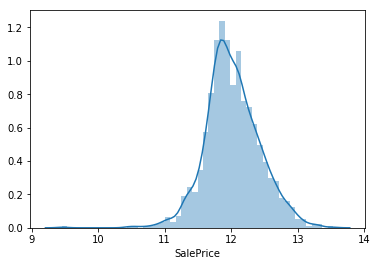

In [148]:
sbn.distplot(normalized_saleprice)

In [149]:
# We check the type of all columns in dataframe houseData
houseData.dtypes

MSSubClass         int64
MSZoning           int64
LotFrontage      float64
LotArea            int64
Street             int64
Alley              int64
LotShape           int64
LandContour        int64
Utilities          int64
LotConfig          int64
LandSlope          int64
Neighborhood       int64
Condition1         int64
Condition2         int64
BldgType           int64
HouseStyle         int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemod/Add      int64
RoofStyle          int64
RoofMatl           int64
Exterior1st        int64
Exterior2nd        int64
MasVnrType         int64
MasVnrArea         int64
ExterQual          int64
ExterCond          int64
Foundation         int64
BsmtQual           int64
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual        int64
TotRmsAbvGrd       int64
Functional         int64
Fireplaces         int64
FireplaceQu        int64
GarageType         int64
GarageYrBlt        int64


## Divide the houseData into trainset and testset, then normalize x_train an x_test by using StandardScaler

In [150]:
# We use sklearn.model_selection import train_test_split to split the dataframe into trainset and testset
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
   
#Divide data into training set and test set = 70 % : 30%
trainset, testset = train_test_split(houseData, test_size=0.3)

# Convert all columns with type integer (except SalePrice) to float 32 to save some memory.
trainset = trainset.astype('float32')
testset = testset.astype('float32')
    
x_trainset = trainset.drop(['SalePrice'],axis=1)
x_testset = testset.drop(['SalePrice'],axis=1)
 
scaler = StandardScaler()

x_train = scaler.fit_transform(trainset.drop(['SalePrice'],axis=1).values)
y_train = scaler.fit_transform(trainset['SalePrice'].values.reshape(-1, 1))
y_train = np.ravel(y_train)

x_test = scaler.fit_transform(testset.drop(['SalePrice'],axis=1).values)
y_test = scaler.fit_transform(testset['SalePrice'].values.reshape(-1, 1))
y_test = np.ravel(y_test)

## GA_ANN Algorithm

**Step 1 Initial population function**

In [151]:
# Initial population function
# pop_size is the number of individuals (rows) in the initial population
# genesPerCh is the number of genes per each individual (features/ columns) 

def generate_pop (pop_size, genesPerCh):                   # assign randomly binary values to each individual
    chromosomes = np.array([np.random.choice([0,1], size=genesPerCh)for individual in range(pop_size)],dtype='int8')   
    return chromosomes   # return the initial population

**Step 2 Decode Function**

In [152]:
# Decode function
# pop is the population to be decoded
# np.argwhere return indices from non-zero genes and flattened the array with np.ravel
def decode_function(pop): 
    selected_features = np.array([np.ravel(np.argwhere(pop[i])) for i in range(pop.shape[0])])
    return selected_features         # return array with selected indices 

**Step 3 ANN Functions**

In [153]:
#ANN with SKlearn
from sklearn.neural_network import MLPRegressor  

def NeuralNetwork(train_x, train_y):
    mlp = MLPRegressor(hidden_layer_sizes=(10),
                       activation='relu',
                       solver='lbfgs',
                       max_iter=1,
                    )
 
    mlp.fit(train_x, train_y)  
    return mlp

def get_predictions_forTrain(features):
    #for given feature indexes, this function will get predictions from neural network for the specified features
    print('features {}'.format(features))
    mlp = NeuralNetwork(x_train[:,features], y_train)
    predictions = mlp.predict(x_train[:,features])
    return predictions

**Step 4 Fitness Function**

In [154]:
def fitness(pred, real):
    MSE_ANN = mean_squared_error(real , pred)
    RMSE_ANN = np.sqrt(MSE_ANN)
    return (1/RMSE_ANN) #fitness would be the inverse of roo mean square error

#### Step 5 Stopping criteria Fuction

In [155]:
def stoppingCriteria(fitness, pop, fitness_of_featuresSets, n):
    #This functions stops the iteration if after 20x5 iterations, the fitness drops, it takes the population from previous fitness STORED
    global temp_pop #The population which will be used as 
    global temp_fitness
    if len(fitness) < n: #No stopping until we reach nx5 iterations 
        return False
    elif len(fitness) == n: #At nx5th iteration, store the population and its fitness
        temp_pop = pop
        temp_fitness = fitness_of_featuresSets
        return False
    else:
        if fitness[-2] < fitness[-1]: #this means that fitness is increased after 5 iterations
            #keep on storing the latest population and respective fitness PASSED
            #This process can be complicated by using the n-5th and n-10th fitness value, but sometimes, it would take more iteration but the same best fitness
            temp_pop = pop
            temp_fitness = fitness_of_featuresSets
            return False
        else: #if it drops from the value 5 iterations before, stop the process
            return True #return true only when it is smaller than previous one. Temp_pop will be the previous population

**Step 6 Roulette Wheel Selection Function**

In [156]:
def RouletteWheel_Selection(pop,fitness):
    porps = (fitness/np.sum(fitness))  # calculate the proportions of all fitnesses   
    print('porps: {}'.format(porps))
    fitness_pop = np.hstack([pop,porps]) # add the proportions to population
    print('fitness_pop: {}'.format(fitness_pop))
    new_parents = np.zeros(pop.shape,dtype='int8')
    print('new_parents: {}'.format(new_parents))
    for chromosome in range(new_parents.shape[0]) :
        pick = np.random.uniform(0,1)         # pick random number from 0 to summation of proportions
        index = np.argwhere(fitness_pop[:,-1].cumsum()>pick)[0]  # go through the population and sum the fitnesses and 
        new_parents[chromosome] = fitness_pop[index,:-1]         # return the chromosome when the sum of fitnesses is 
                                                                 # greater than pick number
    return new_parents   # return the selected parents 

**Step 7 Uniform Crossover Function**

In [157]:
def uniformCrossover(population):
    offspring = np.zeros_like(population)
    p1 = population[::2] #Even indexes 0,2,4... would be parent 1
    p2 = population[1::2] #Odd indexes 1,3,5... would be parent 2
    if len(p1)!=len(p2): #If population size is odd the p1 would be larger thatn p2
        #We won't be doing the crossover of last individual of the mutation pool and copy it as it is to the offspring
        offspring[-1] = p1[-1]
        p1 = p1[:-1]
    swap = np.random.choice([True,False], size=p1.shape) #generate True or False of every parent set.
    #True means swap the cell from p1 with p1. False means no swapping
    #Even rows of offspring would be p1 and odd would be p2
    offspring[:-1:2] = np.where(swap, p2, p1) #if swap is true for a cell, even row would have p2 for that gene. Other-wise p1 
    offspring[1::2] = np.where(swap, p1, p2) #if swap is true for a cell, odd row would have p1 for that gene. Other-wise p2
    return offspring

**Step 8 Mutation**

In [158]:
# Mutiation function with default mutation probability as 0.3
def bitFlipMutation(offspring, p = 0.3):
    toMutate = np.sort(np.random.randint(offspring.shape[0], size=int(offspring.shape[0]*p))) #Select the chromosomes you want to apply Mutation on
    bitPos = np.random.randint(offspring[toMutate].shape[1], size=offspring[toMutate].shape[0]) #generate a random gene position to flip for selected chromosomes
    offspring[toMutate, bitPos] = np.where(offspring[toMutate, bitPos],0,1) #if value is 1, replace it by 0 and vice-versa
    return offspring

**MAIN Part**

In [159]:
pop_size = 100 #size of the initial population

In [160]:
pred_train = np.frompyfunc(get_predictions_forTrain, 1, 1) #Function to get prediction array corresponding to all the slected features in the population

In [161]:
fVec = np.vectorize(fitness, excluded=['real'], otypes=[np.float32]) #vectorized funtion to get the fitness of every individual in the population

In [162]:
house_features = houseData.columns[:-1] #Names of features
house_features

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemod/Add', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'W

In [163]:
genesPerCh = house_features.size #genes per chromosome
genesPerCh

79

In [164]:
pop = generate_pop(pop_size, genesPerCh) #Generate initial population. This will be updated in every generation

In [165]:
selected_features = decode_function(pop)

In [166]:
selected_features #esse eh OBJETO

array([array([ 1,  3,  4,  5,  7,  8,  9, 10, 11, 12, 15, 17, 19, 20, 21, 22, 25,
       28, 31, 32, 34, 38, 39, 41, 42, 43, 44, 45, 52, 59, 60, 61, 62, 64,
       66, 71, 75, 76, 78]),
       array([ 0,  1,  7,  9, 10, 11, 12, 13, 15, 16, 18, 20, 21, 22, 23, 24, 25,
       28, 29, 32, 33, 34, 35, 36, 37, 38, 41, 45, 46, 47, 48, 49, 50, 51,
       53, 54, 56, 57, 58, 61, 62, 64, 65, 66, 67, 71, 75, 77]),
       array([ 4,  5,  6,  7,  8, 12, 13, 14, 16, 17, 18, 22, 23, 25, 28, 33, 34,
       35, 36, 39, 40, 45, 47, 50, 51, 52, 55, 56, 57, 58, 60, 63, 68, 69,
       70, 73, 74, 76, 77, 78]),
       array([ 0,  1,  4,  5,  6,  7,  9, 11, 13, 14, 15, 22, 23, 25, 26, 31, 34,
       35, 37, 39, 40, 44, 45, 48, 50, 52, 54, 55, 56, 57, 59, 61, 62, 65,
       67, 68, 69, 73, 74, 75, 78]),
       array([ 1,  4,  9, 10, 14, 18, 21, 24, 28, 30, 34, 35, 36, 37, 40, 41, 42,
       43, 44, 48, 52, 53, 54, 55, 56, 57, 58, 59, 60, 64, 65, 68, 70, 71,
       73, 74, 75, 76, 78]),
       array([ 1,  7, 

In [167]:
number_of_generations = 201 #the values is set to have mod5 = 1 for a complete plot

In [168]:
avgFitnessPerGeneration = [] #average of fitness values of the individuals in every fifth generation
maxFitnessPerGeneration = [] #maximum of fitness values of the individuals in every fifth generation
minFitnessPerGeneration = [] #minumum of fitness values of the individuals in every fifth generation

In [169]:
s_predictions = pred_train(selected_features) #predicted labels for train data for each individual in the population

features [ 1  3  4  5  7  8  9 10 11 12 15 17 19 20 21 22 25 28 31 32 34 38 39 41
 42 43 44 45 52 59 60 61 62 64 66 71 75 76 78]
features [ 0  1  7  9 10 11 12 13 15 16 18 20 21 22 23 24 25 28 29 32 33 34 35 36
 37 38 41 45 46 47 48 49 50 51 53 54 56 57 58 61 62 64 65 66 67 71 75 77]
features [ 4  5  6  7  8 12 13 14 16 17 18 22 23 25 28 33 34 35 36 39 40 45 47 50
 51 52 55 56 57 58 60 63 68 69 70 73 74 76 77 78]
features [ 0  1  4  5  6  7  9 11 13 14 15 22 23 25 26 31 34 35 37 39 40 44 45 48
 50 52 54 55 56 57 59 61 62 65 67 68 69 73 74 75 78]
features [ 1  4  9 10 14 18 21 24 28 30 34 35 36 37 40 41 42 43 44 48 52 53 54 55
 56 57 58 59 60 64 65 68 70 71 73 74 75 76 78]
features [ 1  7 12 13 14 16 19 22 23 24 25 27 29 31 32 34 36 38 42 43 46 49 50 51
 53 54 55 57 58 60 61 62 63 64 68 69 70 71 73 74 75 77]
features [ 2  3  6  7  8  9 10 12 13 14 15 16 19 20 21 24 25 26 29 30 31 34 36 37
 40 42 43 46 47 48 50 51 52 53 54 55 56 57 59 60 62 64 68 69 70 73 75 78]
features [ 0  2  5  6  7 

features [ 1  3  4 10 15 16 17 18 19 22 24 25 28 31 33 36 37 38 40 44 45 49 50 52
 53 54 57 58 59 62 68 69 71 72 73 75]
features [ 1  7 11 12 14 16 19 21 23 24 28 33 36 37 38 41 42 45 46 48 49 51 52 53
 57 58 59 62 64 66 67 69 70 72 73 77]
features [ 3  4  5  6  7 10 12 13 16 18 19 20 21 26 28 30 32 33 34 35 37 39 41 44
 45 46 47 50 51 54 59 60 63 64 68 70 72 77 78]
features [ 0  1  3  7 13 14 15 19 20 21 22 23 24 25 26 29 31 32 33 34 37 39 41 42
 43 45 47 48 49 50 51 52 54 56 60 61 62 63 70 74 76 77 78]
features [ 0  3  5  8 10 11 12 13 14 16 18 19 28 30 31 32 34 35 37 39 41 43 45 46
 47 48 49 50 51 54 57 58 59 61 62 66 68 71 72 76 77]
features [ 0  1  4  7  8  9 10 11 14 15 17 18 19 20 22 23 25 29 31 34 38 39 43 50
 51 52 53 54 55 63 64 65 67 70 73 74 75 77]
features [ 2  5  6  9 19 20 21 24 25 26 29 30 31 33 34 36 39 40 41 42 43 44 45 47
 48 49 50 51 52 53 56 57 60 61 65 66 70 73 74 75 77 78]
features [ 1  2  3  4  5  6 11 15 16 21 22 24 25 28 31 34 37 39 40 43 44 47 49 51
 52 53 54

In [86]:
s_predictions

array([array([-0.57212903,  0.16122855,  0.49039732, ...,  1.81010848,
        0.40836223, -0.64744327]),
       array([-0.42711395,  0.09082352,  0.22764702, ..., -0.05991744,
        0.01039265,  0.13190859]),
       array([-0.72923112,  1.88773367,  0.36086929, ...,  1.23562437,
        0.96738338,  0.87332672]),
       array([ 0.31701648,  0.38698551, -0.28055247, ...,  1.50259607,
       -0.61702437, -0.30557199]),
       array([ 0.87800105,  2.02740327,  1.03838222, ...,  3.99748313,
       -0.5877404 , -0.47528899]),
       array([0.37258079, 0.85738087, 0.98843262, ..., 0.98146153, 0.33337132,
       0.33332051]),
       array([-1.25934206,  0.57740709, -0.7838134 , ...,  0.33055897,
       -1.44772098, -0.60172817]),
       array([0.75911448, 1.03036587, 0.84110782, ..., 1.65501554, 0.67478401,
       1.00829151]),
       array([ 0.69230006,  0.47345891,  1.09043121, ...,  2.06990511,
        0.27498968, -0.80358251]),
       array([ 0.33899507,  1.87766007,  0.0611374 , ..., 

In [170]:
x_trainset.shape

(2048, 79)

In [171]:
x_train.shape

(2048, 79)

In [172]:
y_train.shape

(2048,)

In [173]:


for iteration in range(number_of_generations):
    s_predictions = pred_train(selected_features) #predicted labels for train data for each individual in the population
    fitness_of_featuresSets = fVec(pred = s_predictions, real = y_train) #for every predicted array, get the fitness for each individual
    fitness_of_featuresSets = fitness_of_featuresSets.reshape(fitness_of_featuresSets.shape[0],1)  #taking the transpose to get proper dimensions for future computations
    if iteration%5 == 0: #max, min and average values will only be stored for every 5th iteration
        avgFitnessPerGeneration.append(np.mean(fitness_of_featuresSets))
        maxFitnessPerGeneration.append(np.max(fitness_of_featuresSets))
        minFitnessPerGeneration.append(np.min(fitness_of_featuresSets))
        if stoppingCriteria(maxFitnessPerGeneration, pop, fitness_of_featuresSets, n=15): #checking if the stopping criteria is met
            selectedPop = temp_pop #temp pop is selected to get the best individual
            fitnessForSelectedPop = temp_fitness #the corresponding fitness for the population
            indPos = np.argmax(fitnessForSelectedPop) #get the index where the best betness resides
            bestInd = selectedPop[indPos] #get the best pop corresponding to best fitness
            break  #no more generations if stopping criteria is met

    print ('pop {} / fitness_of_featuresSets {}'.format(pop, fitness_of_featuresSets))
    mating_pool = RouletteWheel_Selection(pop, fitness_of_featuresSets)
    #CrossOver
    offspring = uniformCrossover(mating_pool) 
    #Mutation
    offspring = bitFlipMutation(offspring)
    #updating population for next generation
    pop = offspring
    #updating features for next iteration
    selected_features= decode_function(offspring)

features [ 1  3  4  5  7  8  9 10 11 12 15 17 19 20 21 22 25 28 31 32 34 38 39 41
 42 43 44 45 52 59 60 61 62 64 66 71 75 76 78]
features [ 0  1  7  9 10 11 12 13 15 16 18 20 21 22 23 24 25 28 29 32 33 34 35 36
 37 38 41 45 46 47 48 49 50 51 53 54 56 57 58 61 62 64 65 66 67 71 75 77]
features [ 4  5  6  7  8 12 13 14 16 17 18 22 23 25 28 33 34 35 36 39 40 45 47 50
 51 52 55 56 57 58 60 63 68 69 70 73 74 76 77 78]
features [ 0  1  4  5  6  7  9 11 13 14 15 22 23 25 26 31 34 35 37 39 40 44 45 48
 50 52 54 55 56 57 59 61 62 65 67 68 69 73 74 75 78]
features [ 1  4  9 10 14 18 21 24 28 30 34 35 36 37 40 41 42 43 44 48 52 53 54 55
 56 57 58 59 60 64 65 68 70 71 73 74 75 76 78]
features [ 1  7 12 13 14 16 19 22 23 24 25 27 29 31 32 34 36 38 42 43 46 49 50 51
 53 54 55 57 58 60 61 62 63 64 68 69 70 71 73 74 75 77]
features [ 2  3  6  7  8  9 10 12 13 14 15 16 19 20 21 24 25 26 29 30 31 34 36 37
 40 42 43 46 47 48 50 51 52 53 54 55 56 57 59 60 62 64 68 69 70 73 75 78]
features [ 0  2  5  6  7 

features [ 0  1  3  7 13 14 15 19 20 21 22 23 24 25 26 29 31 32 33 34 37 39 41 42
 43 45 47 48 49 50 51 52 54 56 60 61 62 63 70 74 76 77 78]
features [ 0  3  5  8 10 11 12 13 14 16 18 19 28 30 31 32 34 35 37 39 41 43 45 46
 47 48 49 50 51 54 57 58 59 61 62 66 68 71 72 76 77]
features [ 0  1  4  7  8  9 10 11 14 15 17 18 19 20 22 23 25 29 31 34 38 39 43 50
 51 52 53 54 55 63 64 65 67 70 73 74 75 77]
features [ 2  5  6  9 19 20 21 24 25 26 29 30 31 33 34 36 39 40 41 42 43 44 45 47
 48 49 50 51 52 53 56 57 60 61 65 66 70 73 74 75 77 78]
features [ 1  2  3  4  5  6 11 15 16 21 22 24 25 28 31 34 37 39 40 43 44 47 49 51
 52 53 54 55 56 60 62 63 64 66 71 73 74]
features [ 0  1  2  3  4  7  8  9 12 13 14 15 18 19 20 22 23 27 28 29 30 31 32 33
 37 39 40 41 42 44 45 47 48 53 54 56 57 59 60 61 64 65 66 71 72 74 77 78]
features [ 1  3  5  8 10 12 17 19 20 25 28 30 31 32 34 36 37 39 40 41 44 45 46 47
 49 54 55 56 58 59 63 66 68 73 74 75 77 78]
features [ 0  2  3  5  6  8  9 12 15 18 20 21 25 26 27 

features [ 1  7 10 14 16 18 21 22 23 24 28 30 31 34 35 37 38 39 41 42 43 48 51 53
 54 55 56 57 58 60 62 65 70 71 73 74 75 76 78]
features [ 1  2  4  8  9 10 14 17 18 21 25 27 28 30 32 33 34 36 40 41 42 44 45 47
 48 50 52 53 54 55 59 60 64 65 66 68 70 73 76 78]
features [ 0  1  2  3  4 11 13 20 22 23 24 26 27 30 31 33 35 36 42 43 46 47 49 50
 51 54 56 58 59 60 65 67 70 72 73 74]
features [ 0  1  2  3  5  6  9 10 12 13 14 15 16 21 22 23 26 27 30 32 33 34 37 38
 39 41 44 45 47 48 50 51 52 53 57 60 61 65 67 68 73 74 75 76 77]
features [ 0  1  3  4  5  9 11 12 15 19 23 27 28 30 33 34 35 37 39 42 47 50 55 56
 57 59 60 62 64 65 66 67 68 70 71 72 73]
features [ 2  5  6  9 12 13 14 15 17 18 20 21 22 23 26 30 32 33 34 35 36 37 38 39
 41 42 47 49 52 54 55 57 59 62 64 65 66 68 72 74 75 76 78]
features [ 0  1  2  5  7  8  9 17 18 20 22 23 25 27 29 30 31 32 34 39 41 42 43 45
 46 47 48 50 51 53 54 55 65 66 73 77 78]
features [ 2  4  6  7  8 10 11 14 16 17 18 21 22 23 25 26 28 30 31 32 33 35 38 39
 40

features [ 0  3  8 10 15 16 18 19 22 23 26 27 28 29 33 38 41 43 44 47 50 52 53 54
 58 59 61 62 66 67 68 72 75 78]
features [ 0  2  4  6  8 10 12 15 16 17 18 19 21 23 24 26 27 29 32 34 35 38 41 42
 43 44 45 46 47 49 50 53 54 57 58 62 64 66 67 68 70 72 75 76 77 78]
features [ 0  4  6  7  8  9 11 17 18 19 20 21 22 23 27 28 31 34 40 47 50 51 53 54
 56 58 59 62 63 65 66 68 69 74 75 76 77 78]
features [ 2  4  5  7 16 17 18 20 23 26 28 31 36 37 38 51 52 56 61 63 64 69 70 71
 73 75 76 77 78]
features [ 1  2  3  8 11 14 16 20 22 23 26 27 28 30 31 33 34 35 42 43 44 45 47 49
 51 52 56 58 59 60 62 66 67 69 70 72 73 74 76]
features [ 0  1  2  3  4  5  9 11 13 15 19 20 21 22 24 27 30 32 33 35 36 38 39 42
 43 46 48 50 54 56 58 59 61 64 65 67 70 78]
features [ 0  1  6  7  9 10 11 12 13 14 17 18 19 23 25 27 28 29 31 33 34 36 37 39
 40 41 44 45 47 48 49 52 54 56 59 63 69 71 73 75 76 77]
features [ 0  3  4  9 10 11 13 14 15 17 20 23 24 25 27 29 30 37 38 39 41 44 49 51
 52 53 55 56 61 62 64 66 67 69 72 76

features [ 0  1  3  4  5  9 10 12 14 16 18 19 20 21 23 28 30 32 33 34 35 37 44 47
 50 53 55 57 60 62 64 65 66 68 70 71 72 73]
features [ 1  4  5  9 11 12 15 19 26 27 28 30 34 35 37 39 42 47 50 51 54 56 57 59
 60 64 65 66 67 69 72 77 78]
features [ 0  2  4  7 11 17 18 19 20 22 23 24 25 26 30 31 34 36 37 38 42 46 48 52
 53 54 56 57 58 62 63 64 68 69 70 74 75 76 77 78]
features [ 0  2  4  7 11 12 13 14 16 17 18 19 21 22 23 26 27 28 32 35 36 37 38 39
 47 51 53 54 56 62 65 66 68 70 72 75 78]
features [ 1  2  8  9 10 14 17 18 25 26 29 30 32 33 35 36 40 42 44 45 47 49 53 54
 56 59 60 62 64 65 66 70 73 75 76]
features [ 1  2  4  9 10 14 17 18 21 25 27 28 30 31 32 34 38 41 42 43 45 46 47 48
 50 51 52 53 54 55 57 59 60 63 64 66 68 70 71 73 74 77 78]
features [ 0  2  7 10 16 18 19 22 23 24 28 30 31 36 37 38 42 43 47 51 53 54 55 56
 62 63 68 69 70 73 75 76 77 78]
features [ 1  4  7 11 14 16 17 18 20 21 22 23 26 28 31 34 35 37 38 39 41 48 51 52
 53 54 56 57 58 60 62 64 65 66 70 71 74 75 76 78]
feat

 42 43 45 46 47 48 52 53 54 55 56 59 60 63 64 67 69 72 73 75 78]
features [ 0  2  3  7 14 15 16 23 26 27 28 29 32 33 34 36 37 38 39 42 43 45 47 50
 52 53 54 58 59 61 62 64 66 67 72 75 78]
features [ 0  1  3  5  8  9 10 11 18 19 22 24 26 27 33 37 38 41 43 44 46 47 48 51
 53 54 57 59 60 61 66 67 68 70 72 75 77 78]
features [ 6  9 10 15 16 17 21 23 24 25 26 27 31 35 37 38 39 41 43 46 47 49 53 54
 57 58 59 62 66 70 76 77 78]
features [ 5  6  7  8 10 15 18 21 24 29 32 37 38 42 45 46 47 50 52 54 57 61 62 63
 66 72 75 78]
features [ 1  4  6  8 10 11 14 15 16 18 22 23 25 26 28 30 31 34 36 39 40 41 42 43
 44 45 47 48 49 50 51 53 54 55 59 60 62 65 66 67 68 70 72 73 74 75 76]
features [ 2  4  6  8 10 12 13 14 15 16 17 18 19 22 24 25 28 30 31 32 38 40 42 45
 47 48 52 59 67 68 69 71 72 74 75 78]
features [ 0  2  3  4  7  8  9 10 13 14 15 16 17 18 19 20 21 22 24 28 29 32 33 35
 37 39 43 44 50 51 54 56 57 59 60 61 65 66 68 69 70 71 72 77]
features [ 2  4  9 10 11 15 16 18 20 25 28 31 34 37 38 44 45 4

features [ 0  3  5  7  9 10 11 13 17 18 23 25 26 27 28 30 31 32 34 37 38 41 44 47
 50 51 52 53 59 66 70 71 72 74 76]
features [ 0  2  3  6  8 14 17 19 21 22 23 26 27 30 31 33 36 40 43 48 50 51 56 58
 59 63 65 66 68 69 70 73 74 75 76 77 78]
features [ 1  2  4  5  7  8 12 13 14 17 19 20 23 27 28 32 33 34 35 36 38 41 42 44
 45 53 54 55 56 57 58 61 62 63 68 69 72 75 76 78]
features [ 3  4  5  6 12 13 14 18 19 20 21 22 27 28 29 32 33 34 35 36 37 38 44 45
 46 47 48 49 54 61 64 65 66 70 71 73 76]
features [ 1  2  4  5  6  8 11 13 14 15 17 20 22 23 25 28 31 37 42 43 46 47 48 50
 53 55 56 59 60 66 71 73 74 76 78]
features [ 0  1 10 11 13 14 15 17 18 20 21 24 26 27 28 29 30 32 33 34 37 38 39 41
 44 45 47 48 50 52 53 55 57 59 60 63 64 68 70 71 73 74 75 77]
features [ 0  1  2  5  7  8 18 19 20 22 23 25 27 28 30 31 32 34 37 39 40 42 46 49
 50 51 56 57 58 59 61 62 63 64 65 66 69 71 72 75 76 77 78]
features [ 1  2  3  7  8  9 11 14 15 18 20 21 22 27 28 31 35 38 41 42 47 51 53 54
 57 59 61 62 65 66 70

pop [[1 0 0 ... 1 1 1]
 [1 1 0 ... 0 0 1]
 [0 1 1 ... 0 0 1]
 ...
 [0 1 0 ... 0 1 0]
 [1 0 0 ... 0 1 1]
 [0 1 1 ... 0 0 0]] / fitness_of_featuresSets [[1.0661746 ]
 [0.9192686 ]
 [1.0961639 ]
 [0.9664474 ]
 [1.1028864 ]
 [0.8983377 ]
 [1.0871401 ]
 [0.96617043]
 [1.4506751 ]
 [1.0305793 ]
 [1.0256387 ]
 [0.9645109 ]
 [1.0016835 ]
 [1.174274  ]
 [1.4243174 ]
 [0.8641807 ]
 [0.8197774 ]
 [0.98552513]
 [1.287556  ]
 [1.317793  ]
 [0.9009754 ]
 [1.0703964 ]
 [0.9324737 ]
 [1.0507741 ]
 [1.3843902 ]
 [0.94205385]
 [1.076146  ]
 [1.1824638 ]
 [1.0332432 ]
 [0.92495364]
 [1.1698859 ]
 [0.94001365]
 [1.0147243 ]
 [0.8913015 ]
 [0.8542299 ]
 [0.8964125 ]
 [0.8827512 ]
 [0.98929185]
 [1.2618384 ]
 [1.0576304 ]
 [1.270982  ]
 [0.8085624 ]
 [1.040726  ]
 [0.9681746 ]
 [0.910219  ]
 [1.2524891 ]
 [0.8625334 ]
 [0.7930526 ]
 [1.3504219 ]
 [1.0182948 ]
 [0.9813524 ]
 [1.2708786 ]
 [1.2021357 ]
 [0.7750079 ]
 [1.0773795 ]
 [1.0141424 ]
 [1.0134248 ]
 [1.0304852 ]
 [1.018218  ]
 [1.0672132 ]
 [1.172811

features [ 0  2  3  4  5  7 10 12 13 16 17 18 19 21 23 24 25 27 29 30 33 35 36 38
 41 42 44 46 48 49 51 53 54 56 58 59 61 64 67 68 69 70 71 74 77]
features [ 1  3  4  5  6  9 11 13 14 15 16 18 19 21 27 28 29 33 36 37 38 39 41 43
 44 45 47 53 54 56 59 62 64 68 69 70 72 74 75 76 77 78]
features [ 0  1  2  7  8 11 12 14 17 18 19 20 23 25 26 28 30 32 33 34 36 37 38 39
 42 44 45 47 48 50 54 56 59 61 63 64 66 67 73 78]
features [ 2  4  6 10 14 15 17 20 21 22 23 26 28 29 30 34 35 36 37 39 44 45 48 49
 50 51 53 54 55 56 58 61 67 69 70 71 73 74 75 77 78]
features [ 0  1  3  4  6  7 10 17 18 19 22 23 24 26 27 30 31 32 37 39 44 47 52 53
 55 56 60 61 63 66 67 68 75 76]
features [ 0  1  2  5  6 10 13 14 19 21 27 28 31 34 39 40 41 42 44 45 47 49 50 54
 56 57 59 60 62 67 71 75]
features [ 1  3  7 10 11 14 15 19 23 25 27 28 29 31 33 34 35 37 38 40 41 42 44 46
 47 48 49 51 53 56 68 71 74 76 77]
features [ 1  2  3  6  8  9 10 13 14 15 17 19 20 22 24 25 27 28 29 32 34 35 36 39
 40 42 45 47 50 51 52 53 54

features [ 1  3  5  7 12 13 18 22 25 27 29 30 31 37 40 42 43 44 46 48 49 51 54 57
 58 60 62 63 65 66 70 71 72 73 74 75 77]
features [ 0  2  5  6  7  8 10 11 13 14 17 18 19 20 22 23 24 25 27 28 29 31 32 35
 37 39 40 41 44 45 47 48 50 51 53 54 55 56 57 61 62 63 66 67 69 71 73 74
 75 76 77 78]
features [ 0  7 10 12 13 14 15 18 22 24 25 28 29 30 31 33 34 35 38 39 40 42 45 47
 48 53 54 59 60 62 64 65 66 68 69 70 73 75 76]
features [ 0  2  3  4  7  8  9 11 12 15 17 19 23 24 25 26 27 28 29 31 37 39 41 43
 46 48 51 52 53 55 56 57 58 61 62 65 66 68 71 72 75 76]
features [ 0  1  3  6 10 11 13 14 15 18 19 20 21 23 24 29 30 31 32 34 41 42 46 47
 48 52 53 54 56 57 60 62 67 68 71 74 78]
features [ 2  3  5  6  7 10 12 13 14 16 19 20 21 23 25 27 29 31 32 33 34 36 38 40
 41 42 44 45 46 48 49 50 51 52 54 55 56 57 59 60 62 64 68 69 71 73 74 75
 77]
features [ 1  4  6  8  9 10 12 14 15 19 20 23 24 25 27 28 29 31 34 35 37 40 41 42
 44 45 46 48 50 51 53 59 60 62 67 68 71 73 77 78]
features [ 1  4  6  7 13 2

features [ 1  5  7  8 11 14 16 17 18 19 23 24 25 28 30 31 32 33 34 37 38 39 43 46
 47 50 51 52 54 56 62 63 64 66 67 70 72 77]
features [ 0  1  2  3  8 10 11 14 15 18 19 20 27 29 30 31 32 33 36 37 39 41 42 44
 48 51 53 54 56 57 59 60 61 64 69 72 73 76 78]
features [ 4  6  7  9 10 11 12 13 14 15 16 17 19 20 24 27 29 34 36 37 38 40 42 43
 44 45 46 47 50 51 52 53 54 59 60 62 68 69 71 72 73 74 75 76 77 78]
features [ 0  1  4  7 10 12 13 14 15 19 20 23 24 25 26 27 29 30 31 32 33 34 37 40
 41 42 46 48 49 51 52 53 54 55 56 59 62 64 71 73 74 75 78]
features [ 0 10 11 12 16 17 22 23 24 25 26 27 29 31 35 37 38 39 40 42 45 46 49 50
 52 54 55 56 58 59 60 62 63 67 68 69 70 72 73 75 76 78]
features [ 0  2  3  4  6  7 14 15 16 17 19 23 24 25 27 28 29 30 31 34 35 37 38 40
 41 42 45 47 48 51 53 57 61 62 63 66 67 68 69 70 71 73 75 77]
features [ 2  3  5  7  8 10 19 21 29 30 31 35 37 38 39 41 42 47 48 50 53 55 56 62
 67 70 71 74 75]
features [ 0  1  2  3  6 10 11 13 14 15 17 18 19 20 23 25 27 28 31 32 34 

features [ 1  4  6  7 10 16 19 21 23 24 25 27 28 29 33 34 37 38 39 40 42 44 45 47
 49 53 57 59 60 62 63 65 66 67 70 71 72 75 76 77]
features [ 0  1  2  4  7  8 13 14 15 21 22 23 26 27 28 29 30 33 34 37 40 45 46 47
 48 51 52 53 54 56 57 59 61 63 67 68 70 71 78]
features [ 0  2  5  8  9 10 14 17 19 22 23 25 27 31 35 36 37 42 44 46 47 49 50 51
 52 58 59 61 66 67 70 71 72 73 77 78]
features [ 0  1  2  6  7 10 12 14 15 16 17 19 23 25 31 32 33 34 35 37 38 40 42 46
 47 48 50 53 56 58 59 60 66 68 71 72 73 74 75 76 78]
features [ 2  7 10 12 13 15 16 21 28 30 31 34 36 37 38 42 44 45 46 47 50 54 56 57
 62 64 66 71 75 76 77]
features [ 0  1  4  5  6  8 10 11 13 14 15 19 20 23 25 26 27 28 33 34 35 38 39 40
 42 44 47 48 49 50 52 53 54 56 57 58 59 60 61 62 65 66 70 71 73 75]
features [ 3  5  6 10 14 15 19 20 23 24 25 27 28 29 31 33 34 35 37 38 40 41 43 44
 45 46 47 51 54 56 59 62 63 69 70 76 77]
features [ 3  6  7 10 14 15 19 20 21 23 27 28 29 31 34 35 36 38 40 41 42 43 45 46
 48 49 51 53 54 56 57 58

pop [[1 1 1 ... 0 1 0]
 [0 0 0 ... 1 1 1]
 [0 1 1 ... 1 0 0]
 ...
 [0 0 0 ... 1 1 1]
 [0 1 1 ... 0 0 1]
 [1 0 0 ... 0 0 1]] / fitness_of_featuresSets [[1.144944  ]
 [1.0820502 ]
 [1.1068455 ]
 [1.2283617 ]
 [1.0357771 ]
 [1.0007242 ]
 [0.9920407 ]
 [1.0984017 ]
 [0.9440892 ]
 [1.08707   ]
 [0.96544486]
 [1.175218  ]
 [0.8215759 ]
 [1.14329   ]
 [1.0876837 ]
 [1.2703468 ]
 [0.88208145]
 [0.73737943]
 [0.8066879 ]
 [1.3645588 ]
 [0.88377315]
 [0.9300084 ]
 [1.3675722 ]
 [1.3300363 ]
 [1.1893138 ]
 [0.8332563 ]
 [0.7968447 ]
 [0.94726044]
 [0.8754441 ]
 [1.0192105 ]
 [1.02266   ]
 [1.0062289 ]
 [1.0407264 ]
 [1.1658891 ]
 [1.143953  ]
 [1.0356466 ]
 [1.1229397 ]
 [1.036622  ]
 [1.3217734 ]
 [1.044761  ]
 [1.3526366 ]
 [1.052776  ]
 [0.7277761 ]
 [1.1561242 ]
 [1.0640066 ]
 [0.91217196]
 [1.1267821 ]
 [1.0066057 ]
 [1.072364  ]
 [1.0848807 ]
 [1.1102918 ]
 [0.7171735 ]
 [0.8007127 ]
 [0.9150807 ]
 [1.2604219 ]
 [0.9138148 ]
 [1.3751612 ]
 [1.1883574 ]
 [0.7969386 ]
 [0.77648866]
 [0.949535

features [ 0  2  3  5  6  7  9 10 14 15 16 17 19 22 23 24 28 32 33 34 35 37 38 40
 42 43 46 47 48 50 53 56 58 59 60 62 64 66 67 71 72 73 74 75 76 77 78]
features [ 0  1  6  7  8 11 12 13 14 15 17 18 19 21 25 27 29 31 32 35 37 38 39 46
 47 48 53 54 56 66 68 69 71 72 73 74 75 78]
features [ 1  2  4  6  8 10 11 12 14 19 22 25 27 28 29 31 35 38 39 40 41 42 44 45
 47 48 49 50 51 55 57 59 60 62 64 66 69 71 72 73 74 76]
features [ 1  3  5 12 14 20 21 23 24 26 27 28 29 30 31 34 37 38 39 42 44 45 46 49
 50 51 52 54 56 62 67 68 71 73 74 75 76 77 78]
features [ 0  2  5  6  7 11 13 14 17 19 20 21 24 25 27 28 29 30 33 35 44 45 47 48
 53 55 56 60 61 62 63 67 70 71 73 74 77]
features [ 1  2  5  8 10 12 14 15 17 19 20 21 22 24 25 27 28 29 31 32 34 36 38 40
 42 44 45 46 47 48 50 53 55 56 57 60 61 62 64 65 69 71 72 73 74 75 76]
features [ 0  2  4  5  6 10 12 13 14 15 16 17 18 19 20 22 23 25 28 34 35 36 37 38
 39 40 44 46 48 50 52 53 56 59 62 65 66 68 69 70 71 72 73 74 75 77 78]
features [ 3  6  7 10 11 

features [ 0  1  4  7 10 13 14 16 17 18 20 21 24 27 28 29 31 32 33 34 35 36 39 42
 45 46 50 51 52 53 54 55 56 59 60 61 66 67 69 70 71 73 74 75 77 78]
features [ 0  2  6  7  8 10 11 12 13 14 17 18 19 20 22 23 25 27 28 31 32 34 39 40
 41 42 44 47 48 49 51 54 55 56 59 61 62 64 65 66 68 69 70 71 72 73 74 75
 78]
features [ 3  4  5  6  7  9 10 13 14 15 17 18 19 20 21 24 25 26 27 28 29 33 34 37
 38 40 41 42 43 45 48 50 51 52 53 54 55 56 60 62 65 66 68 69 70 71 75 77]
features [ 0  2  3  5 10 11 13 15 17 20 27 28 30 31 33 34 36 37 38 39 40 41 42 45
 50 53 54 56 62 64 65 69 70 71 72 74 76 77 78]
features [ 0  2  4  5  6  9 10 11 12 13 14 15 16 17 18 19 21 24 27 28 29 30 31 33
 35 41 42 44 45 47 48 52 53 55 57 58 59 60 61 62 67 70 71 73 74 75]
features [ 3  5  6  7 13 14 19 20 22 24 25 28 29 30 33 34 35 44 45 48 51 53 54 55
 56 60 61 62 63 66 68 70 72 73 77]
features [ 0  2  6  7 10 11 12 13 14 16 17 18 19 20 22 23 25 27 28 31 34 39 46 48
 50 51 53 54 55 56 59 61 62 64 65 66 69 70 72 73 74 75]


pop [[1 0 0 ... 1 0 1]
 [0 1 0 ... 0 1 1]
 [0 1 0 ... 1 0 0]
 ...
 [1 1 0 ... 0 0 0]
 [0 1 0 ... 0 1 0]
 [0 1 1 ... 1 0 0]] / fitness_of_featuresSets [[0.76998997]
 [0.87564534]
 [1.213944  ]
 [1.2389044 ]
 [0.94011927]
 [1.2136981 ]
 [1.1405162 ]
 [1.1942053 ]
 [1.6305792 ]
 [0.870636  ]
 [1.2459513 ]
 [1.1364914 ]
 [0.95635486]
 [1.1695075 ]
 [1.3460437 ]
 [0.8230485 ]
 [1.2162454 ]
 [0.97152746]
 [1.1374246 ]
 [1.3131131 ]
 [1.061854  ]
 [1.0055228 ]
 [1.0558822 ]
 [1.1673465 ]
 [1.6539862 ]
 [1.2003503 ]
 [0.88660055]
 [1.3651313 ]
 [1.0053732 ]
 [1.2217247 ]
 [0.8207577 ]
 [0.8927641 ]
 [1.2655953 ]
 [1.0076816 ]
 [0.76547843]
 [1.284153  ]
 [1.4282976 ]
 [1.1612872 ]
 [1.0755869 ]
 [1.1320336 ]
 [1.0389085 ]
 [1.1645702 ]
 [0.9469338 ]
 [0.7807896 ]
 [1.111584  ]
 [1.3186401 ]
 [0.81096363]
 [1.0571793 ]
 [1.409719  ]
 [1.0320328 ]
 [0.9579598 ]
 [1.3303401 ]
 [1.1116697 ]
 [0.8799217 ]
 [1.1449801 ]
 [1.1592932 ]
 [1.0466659 ]
 [1.2547791 ]
 [0.8395565 ]
 [0.83263963]
 [1.269140

 50 54 56 57 60 62 65 66 70 71 73 75 76 77]
features [ 0  3  4  6  8 10 13 14 15 17 18 19 20 24 26 29 31 34 35 36 40 42 43 44
 45 48 49 52 53 54 56 57 58 63 66 68 75 77 78]
features [ 6  7 10 12 15 16 17 19 20 27 30 33 34 35 37 40 42 43 45 46 47 48 53 61
 68 70 71 72 73 74 75 76]
features [ 0  1  2  6  7 13 17 18 19 21 22 23 24 25 28 29 30 31 33 34 37 39 40 42
 44 45 46 48 53 60 67 68 71 73 74 75 76 77 78]
features [ 0  1  4  6  8 10 14 16 17 19 23 24 27 31 32 33 35 37 38 39 40 41 42 45
 46 47 48 53 54 56 58 59 60 62 63 66 67 68 74 75 77 78]
features [ 2  5  6  7  9 10 11 12 13 14 15 17 18 24 25 27 28 29 31 33 36 40 41 44
 47 48 51 54 55 56 60 64 65 66 69 71 72 73 75 76]
features [ 0  1  3  7 10 13 14 18 19 20 23 25 26 27 29 31 33 34 35 38 41 42 43 44
 45 46 48 49 54 55 56 59 61 62 63 66 68 71 74 75]
features [ 0  3  6  8 10 12 13 15 16 20 23 24 27 29 31 32 33 34 37 40 42 43 44 46
 48 49 53 56 61 66 68 71 72 73 74 75 76 78]
features [ 0  3  4  6  7  8 10 13 14 15 16 17 18 19 20 24 27 3

features [ 0  1  2  5  7  9 10 11 12 13 15 16 17 21 24 27 28 29 30 31 34 36 37 38
 40 41 45 46 47 53 54 55 56 62 64 65 73 75 76 78]
features [ 0  2  5  6  7  8 10 11 12 14 15 17 18 24 25 27 28 31 33 34 36 37 39 40
 41 42 43 45 48 49 50 52 53 59 61 62 64 65 69 70 73 74]
features [ 0  1  3  7 10 12 13 15 16 18 20 22 23 25 26 27 28 29 30 31 32 34 35 37
 38 39 41 42 45 47 50 51 53 54 56 61 62 64 65 66 68 70 71 72 74 77]
features [ 0  1  2  5  6  7 10 12 13 14 15 18 24 25 27 28 29 31 32 33 34 36 37 40
 41 42 44 48 50 54 55 56 63 64 65 66 68 72 73 74 75 76 78]
features [ 2  6  7  9 11 13 14 15 17 18 19 24 25 27 28 29 31 33 38 40 41 44 45 46
 47 51 52 54 55 56 60 65 69 70 71 75 76 77]
features [ 0  1  2  3  6  9 10 12 13 14 15 16 19 21 25 29 30 34 37 40 41 45 46 47
 50 51 52 53 58 61 62 66 67 68 69 70 71 74 76 77 78]
features [ 1  2  4  5  6 10 13 14 15 17 19 20 21 24 28 30 32 34 36 37 40 41 42 44
 45 46 47 48 52 53 55 56 60 62 65 66 71 72 73 77 78]
features [ 5  6  7  9 10 14 15 16 17 19 23 

features [ 0  1  6  7 10 15 16 17 19 20 21 23 24 27 28 31 32 37 38 39 40 41 45 47
 48 53 54 55 59 62 65 67 68 69 72 75 76 78]
features [ 1  2  4  5  6  7  8  9 10 12 14 15 17 27 28 30 31 34 36 37 38 39 40 41
 42 43 44 45 47 48 50 51 52 55 59 60 61 62 65 70 72 74 75]
features [ 0  5  7 10 11 14 15 16 18 23 24 25 26 27 28 29 30 31 32 34 35 37 39 40
 41 42 43 45 47 48 49 50 51 52 53 56 59 62 63 64 66 68 70 71 74 77]
features [ 5  7 13 14 15 16 20 22 24 28 29 30 34 36 38 39 40 45 47 48 49 51 53 54
 55 56 60 61 62 63 66 70 73 75 77]
features [ 3  5  7 13 14 19 22 24 25 28 29 30 33 34 35 37 40 41 42 44 45 47 48 51
 53 55 56 58 59 62 63 65 66 68 70 71 72 73 77]
features [ 1  5  7 10 12 14 17 18 19 21 23 25 27 28 29 30 31 32 34 35 36 40 41 44
 45 46 50 53 54 62 64 65 66 67 68 69 70 73 75 77]
features [ 2  3  6 10 12 13 14 16 17 19 22 25 27 28 30 31 34 35 36 37 39 40 42 43
 44 46 48 50 51 53 54 55 56 59 60 61 62 65 68 70 73 74 78]
features [ 0  5  6 10 15 18 19 23 24 25 28 33 37 38 39 40 42 43 

features [ 0  1  3  4  5  8 10 11 12 13 19 20 23 25 27 28 31 37 38 39 40 41 42 43
 47 48 51 53 54 56 62 63 65 71 74 76 78]
features [ 1  2  3  6  7 10 11 12 13 14 15 17 18 19 21 28 29 30 31 32 33 34 37 40
 41 42 44 45 46 47 48 51 52 53 55 56 60 62 63 64 66 68 69 73 74 78]
features [ 1  2  3  6  7 10 11 12 13 14 15 17 18 19 21 28 29 30 31 32 33 34 37 40
 41 42 44 45 46 47 48 51 52 53 55 56 60 62 63 64 66 68 69 73 74 78]
features [ 2  3  5  6 12 13 14 16 17 22 25 27 28 29 31 34 35 36 39 40 42 44 45 47
 48 51 53 54 55 56 59 60 61 65 66 68 70 71 73 75]
features [ 2  6  7 10 13 15 16 17 18 19 24 25 27 28 30 33 36 37 40 43 44 46 48 50
 51 53 55 56 57 59 60 62 64 65 70 73 74 78]
features [ 5  6  7 13 14 15 16 17 18 21 23 24 25 27 28 31 32 38 39 40 45 47 48 53
 55 59 60 61 64 65 66 67 68 69 73 75]
features [ 0  1  2  6  7 10 15 16 17 19 20 24 27 28 29 33 36 37 40 41 44 45 47 48
 51 53 54 55 56 59 62 65 70 71 72 75 76 78]
features [ 1  2  3  5  7 10 12 13 14 15 16 18 23 25 26 28 29 30 31 35 37 

features [ 0  2  7  9 10 11 12 13 14 16 18 19 22 23 25 26 27 28 30 31 32 33 34 35
 36 39 42 43 45 47 48 49 50 51 52 53 56 62 63 64 66 68 70 71 72 73 74 77]
features [ 2  3  4  7 10 13 14 18 19 24 25 26 27 28 29 33 34 35 37 40 41 43 44 47
 48 50 53 54 55 56 57 59 61 62 63 66 67 69 71 72 75 76 77 78]
features [ 4  6  7  9 10 14 19 23 24 26 27 28 29 30 31 35 36 38 39 40 42 45 47 48
 54 56 57 58 59 62 63 66 68 71 74 75 76]
features [ 1  4  5  6 10 12 13 15 16 17 18 21 23 24 25 26 27 30 32 34 35 36 38 41
 42 45 47 48 51 53 54 59 60 62 63 66 67 68 70 71 75 77]
features [ 0  1  4  7  8  9 10 13 16 24 25 28 30 31 33 35 36 37 38 40 41 42 45 46
 47 51 53 59 61 62 63 66 67 69 71 75 78]
features [ 0  1  3  4  5  6  7  9 10 13 14 15 16 17 19 23 24 27 28 37 38 39 40 41
 42 44 45 46 47 50 51 53 54 58 62 63 64 65 66 67 71 74 77 78]
features [ 0  2  3  5  8  9 10 11 14 16 17 21 31 33 34 35 36 37 39 40 41 42 43 45
 46 47 48 53 56 57 60 61 62 63 66 69 71 74 77]
features [ 0  1  2  3  5  7  8  9 11 12 13 

features [ 0  1  2  4  6  7  9 10 11 12 13 14 16 18 21 22 23 27 28 31 36 38 42 45
 47 48 51 53 54 55 56 63 64 65 66 67 68 69 73 77 78]
features [ 0  2  5  7 10 12 13 15 17 18 19 24 25 27 28 29 30 31 33 37 40 42 45 47
 48 54 56 58 61 62 64 65 66 69 70 71 72 74 75]
features [ 0  1  7  8  9 10 12 13 16 24 25 28 29 30 31 35 36 37 38 39 40 41 42 45
 46 47 50 51 53 54 58 59 61 62 64 66 67 69 71 72 75 78]
features [ 1  2  3  4  5  7 10 13 14 15 16 18 23 25 26 28 30 31 33 35 37 38 41 42
 46 47 51 53 56 62 63 66 69 70 71 75 77 78]
features [ 0  2  5  6  7 12 13 17 19 20 24 25 26 28 29 30 34 37 40 41 42 47 48 52
 53 57 58 59 60 61 68 73 75 77]
features [ 0  3  4  6  7  9 10 11 13 14 17 19 22 27 31 34 36 37 38 39 47 48 50 52
 53 55 56 57 58 59 66 68 70 71 72 73 76 77]
features [ 0  1  2  4  5  6  7 10 11 12 13 14 15 17 19 20 24 27 31 34 36 37 39 40
 41 42 47 48 51 52 53 55 58 59 60 62 63 66 68 69 71 72 73 74 75 76 77 78]
features [ 2  3  6  7 10 11 13 14 17 21 25 27 28 30 31 32 33 34 37 39 40 41 

features [ 0  3  4  5  7  9 10 11 13 14 18 23 26 27 28 30 31 37 38 39 40 42 43 44
 48 49 51 53 54 56 61 62 65 66 68 69 72 73 74 76 77]
features [ 0  1  3  4  5  7 10 13 15 17 18 23 24 25 26 27 28 36 37 39 40 42 43 47
 48 49 53 54 56 60 62 64 65 66 70 71 72 73 74 75 76 77]
features [ 0  1  2  5  8  9 10 14 15 16 18 19 21 23 25 27 28 31 32 33 35 36 38 40
 41 42 47 48 49 50 52 53 54 56 60 62 68 70 71 73 74 76]
features [ 2  3  7  9 13 14 16 18 19 20 21 22 23 24 25 27 28 30 31 32 33 34 37 40
 42 44 45 46 47 48 62 63 64 65 66 67 68 70 71 72 77 78]
features [ 0  3  4  5 10 13 18 19 22 23 24 25 26 27 28 31 34 37 40 41 42 43 45 47
 49 53 54 56 59 61 62 65 68 72 73 74 76 77 78]
features [ 3  5  7 10 13 14 15 16 17 18 20 23 25 27 28 31 36 38 39 42 44 47 48 53
 54 55 56 59 61 65 66 68 69 70 71 75 76]
features [ 1  3  4  5  6  7 11 14 17 18 20 21 27 28 29 30 31 34 37 38 40 41 42 44
 47 48 54 56 57 60 62 63 68 71 75 76 77 78]
features [ 0  2  3  9 10 12 14 16 18 19 20 22 23 25 27 28 31 32 33 38 42 

features [ 0  2  4  5  6  8 10 14 15 16 17 18 19 21 24 27 28 34 36 39 41 42 44 45
 48 49 52 53 54 57 62 66 68 70 71 73 75 77]
pop [[0 1 0 ... 0 0 0]
 [1 0 1 ... 1 0 1]
 [1 1 0 ... 0 1 0]
 ...
 [0 0 0 ... 1 1 1]
 [0 1 1 ... 1 1 0]
 [1 0 1 ... 0 1 0]] / fitness_of_featuresSets [[1.0783237 ]
 [1.143037  ]
 [1.2415305 ]
 [0.9428939 ]
 [1.0767318 ]
 [1.1753193 ]
 [0.83113885]
 [1.1355916 ]
 [0.770436  ]
 [0.972903  ]
 [1.2546822 ]
 [1.1747205 ]
 [1.2374882 ]
 [0.78043264]
 [0.84378445]
 [0.839388  ]
 [1.2864578 ]
 [1.1202941 ]
 [1.3273283 ]
 [1.2458181 ]
 [0.8661261 ]
 [1.173535  ]
 [1.1874964 ]
 [0.8183808 ]
 [1.1120404 ]
 [1.0561101 ]
 [1.2708768 ]
 [1.308356  ]
 [1.0373638 ]
 [0.84460026]
 [1.47748   ]
 [0.8660773 ]
 [0.9198556 ]
 [1.1429317 ]
 [1.0709252 ]
 [1.0473846 ]
 [0.8459944 ]
 [1.2136832 ]
 [0.8086114 ]
 [0.99840623]
 [1.1145728 ]
 [0.8107318 ]
 [1.653043  ]
 [1.228628  ]
 [1.1092244 ]
 [0.85566354]
 [0.7794729 ]
 [0.9718763 ]
 [1.1903448 ]
 [1.0581775 ]
 [0.9571736 ]
 [1.159456

features [ 1  2  3  6 10 11 12 15 17 18 19 21 25 28 30 31 34 37 38 40 41 42 44 45
 47 52 55 56 58 59 61 63 66 73 74 76 77]
features [ 0  3  5  7 10 11 13 14 17 19 20 22 26 27 28 29 30 31 32 34 36 39 42 44
 45 46 49 51 53 54 56 57 59 62 66 72 75 77]
features [ 0  1  2  4  7 10 12 14 15 18 20 24 27 28 30 31 32 34 36 37 43 45 48 51
 52 53 55 60 61 63 65 66 67 68 70 71 73 77]
features [ 1  2  4  6  9 11 13 14 16 17 18 19 22 25 27 28 30 32 34 35 36 37 38 39
 40 42 47 49 51 53 54 56 57 59 62 63 66 70 72 73 75 78]
features [ 0  1  2  3  4  5  6  7 10 11 12 13 14 16 17 19 20 22 25 26 27 28 29 31
 34 36 39 40 41 42 47 48 51 53 56 58 60 61 62 63 67 68 71 72 74 75 76 77
 78]
features [ 0  3  5  7  9 10 11 13 14 17 18 19 23 25 26 27 28 31 33 34 39 42 44 45
 46 47 48 49 51 52 57 59 60 62 63 64 66 67 68 69 70 71 73 74 76 78]
features [ 1  9 10 13 18 19 20 22 23 27 28 31 32 36 38 42 44 46 47 48 50 54 56 57
 58 59 62 64 65 66 68 76]
features [ 0  2  3  4  7  9 10 12 14 16 22 23 25 27 28 30 31 33 35 37

features [ 0  1  2  5  9 10 14 15 16 18 19 22 27 28 29 31 33 34 36 38 39 40 41 42
 45 46 47 48 52 53 55 56 61 62 63 68 71 74 75 76 78]
features [ 0  1  5 14 17 18 19 20 27 28 29 31 32 33 37 38 40 42 45 48 50 54 56 57
 62 63 65 67 75 76]
features [ 2  4  5  7  9 11 13 14 15 16 18 19 20 21 23 24 28 29 33 34 35 36 39 41
 42 44 47 48 49 50 51 52 53 54 56 57 60 61 62 64 65 66 67 68 70 71 73 74
 76 77]
features [ 0  1  2  3  5  6  7  9 10 11 12 13 14 16 17 18 21 22 24 25 26 27 28 30
 31 33 34 37 38 40 42 45 48 52 55 56 58 60 62 64 65 68 71 73 74 78]
features [ 5  7  9 10 16 17 18 23 24 25 26 27 28 29 36 39 40 41 42 44 46 47 48 51
 53 54 56 60 62 63 67 68 71 72]
features [ 0  2  3  6  7 10 13 14 15 16 17 19 20 21 25 27 28 29 31 33 34 38 41 42
 45 47 48 52 57 60 61 63 64 65 66 67 68 70 71 72 74 75 76 77 78]
features [ 1  2  3  5  6  7  9 14 15 19 20 21 26 27 28 31 33 37 38 39 40 42 45 47
 48 50 54 57 61 63 68 75 77 78]
features [ 0  1  5  9 12 17 18 19 22 25 28 29 31 32 33 34 37 39 40 41 42 43

features [ 0  1  3  4  6  8 10 11 12 13 15 17 19 20 25 28 30 31 33 36 37 38 39 40
 44 45 46 47 48 49 50 53 55 62 66 69 71 75 77]
features [ 1  3  4  7 10 13 14 15 16 18 19 23 25 28 30 31 35 36 39 41 42 43 44 45
 46 47 48 51 53 54 55 56 60 62 63 65 66 72 76 78]
features [ 1  2  4  7  9 10 12 13 14 15 18 20 25 27 28 29 30 31 32 34 35 36 37 39
 40 42 46 48 51 53 54 55 56 59 60 61 62 66 67 68 69 70 71 75 76]
features [ 1  2  5  6  7  9 10 12 14 17 18 19 21 24 25 26 28 31 32 33 37 39 40 41
 42 45 47 54 57 59 61 62 64 68 70 71 75 77 78]
features [ 1  2  3  4  6  7  9 12 15 19 22 26 27 28 29 31 33 34 36 39 40 41 43 45
 47 48 50 53 55 59 60 66 68 72 76 77 78]
features [ 0  1  2  3  4  5  7 10 11 13 14 16 17 20 25 26 27 28 34 36 39 41 42 45
 47 48 49 51 53 54 56 59 61 62 63 67 68 71 73 74 75 76 77 78]
features [ 0  1  2  3  4  5  6  7 10 11 12 13 14 15 16 18 19 21 22 28 29 30 31 36
 39 40 41 42 44 48 51 52 53 56 57 58 60 62 63 66 68 69 71 72 75 77]
features [ 0  3  7 10 12 14 17 27 28 29 33 39 

features [ 0  1  2  3  5  7  9 10 13 14 15 16 18 19 22 24 27 28 30 35 38 39 40 41
 42 45 46 47 52 55 56 59 62 63 65 66 68 69 74 76 77]
features [ 0  1  2  5  7 10 11 13 14 15 16 17 19 23 25 27 28 29 30 31 32 33 34 35
 36 38 39 40 41 42 44 45 46 48 49 51 52 54 56 60 61 62 64 65 66 68 75 76]
features [ 0  2  3  4  6  7  9 10 14 17 18 20 23 24 28 33 34 35 37 40 41 42 44 45
 47 48 54 55 56 59 61 63 64 66 67 70 71 75 76 78]
features [ 0  1  3  7  8 10 11 13 15 20 25 28 29 30 34 35 42 46 47 48 49 53 57 59
 60 62 65 66 70 74 75 76 77]
features [ 0  1  6  7 10 11 13 14 16 19 22 23 27 28 30 33 34 39 40 41 42 43 44 45
 46 48 49 51 55 56 57 58 59 61 62 65 66 68 70 74]
features [ 0  2  3  4  5  7 10 15 16 17 18 19 20 23 25 27 28 29 31 32 33 35 36 38
 39 40 41 42 44 45 47 48 49 50 52 53 56 60 62 63 65 66 68 75 76 77]
features [ 1  4  6  7  9 12 13 17 18 19 22 24 25 27 28 29 31 32 34 37 39 42 47 48
 51 52 53 54 56 58 61 62 64 67 68 69 71 72 76 77 78]
features [ 0  2  4  5  6  7  9 11 12 13 14 16 17 

features [ 0  1  7  9 11 12 13 14 19 20 27 28 30 31 32 33 34 36 37 38 39 40 42 45
 46 47 48 49 54 56 58 61 63 66 71 75 76 77]
features [ 2  6  9 12 13 14 18 20 21 24 25 26 28 30 31 32 33 37 39 40 41 42 43 44
 45 46 47 48 49 51 60 62 63 64 66 68 71 73 77 78]
features [ 1  3  5  7  8  9 10 12 14 15 16 17 19 20 25 28 32 33 34 36 37 38 39 40
 41 42 44 46 50 54 55 57 61 62 64 66 68 69 77 78]
features [ 0  1  5  9 10 14 15 16 17 18 19 20 21 23 24 27 28 29 30 33 39 42 43 46
 48 52 53 54 55 56 59 60 62 64 65 68 70 77]
features [ 1  2  3  4  5  6  7 10 11 12 13 19 22 24 25 27 28 29 30 37 38 39 41 42
 44 45 47 48 53 54 56 62 63 64 66 70 71 72 73 74 75 78]
features [ 0  1  2  3  4  5  7 14 17 18 19 20 24 26 27 28 29 31 33 34 36 37 38 40
 42 44 48 49 52 54 58 62 63 67 68 70 71 75 76 77]
features [ 0  1  2  4  6 10 13 14 17 18 20 21 23 27 28 31 32 33 34 35 37 38 39 41
 42 45 47 54 56 59 60 62 63 64 65 66 71 72 75]
features [ 0  1  2  4  5  6  7  8  9 10 11 12 13 15 17 26 27 28 29 30 32 35 36 37
 38

features [ 1  3  5  6  7  9 10 13 16 17 18 19 21 27 30 31 33 34 37 39 41 45 47 48
 49 54 55 56 57 61 62 63 64 65 67 68 70 71 77 78]
features [ 0  1  2  3  4  5  7  9 12 13 14 16 19 27 28 30 31 32 33 36 37 39 40 42
 45 51 52 53 58 59 61 62 63 69 72 75 77 78]
features [ 1  2  4  5  6  9 10 14 15 16 17 18 24 25 27 28 29 30 36 40 42 43 45 47
 53 54 55 56 59 62 63 65 66 69 70 71 74 75]
features [ 1  2  3  4  7  9 10 13 14 15 17 18 19 21 28 30 31 33 36 37 39 40 41 42
 43 45 46 48 53 54 57 62 67 70 71 73 75 78]
features [ 1  2  3  4  5  6  7 10 13 14 19 22 23 24 26 28 30 33 35 36 37 39 40 41
 42 45 53 56 58 63 64 65 71]
features [ 2  3  5  7 10 12 14 16 18 19 20 23 28 31 33 34 35 36 40 42 43 44 45 46
 47 48 54 56 58 59 60 61 62 63 66 67 68 69 71 75 77 78]
features [ 1  3  4  5  6  7  9 14 15 17 18 19 24 25 27 28 29 30 31 33 36 37 39 42
 43 44 45 47 48 50 53 55 59 60 61 62 63 64 66 67 68 69 70 71 75]
features [ 2  3  6  7  9 10 13 14 15 17 18 19 21 23 24 25 28 29 33 36 38 40 42 43
 45 54 58 62

pop [[0 1 1 ... 0 0 1]
 [0 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [0 1 0 ... 1 0 1]
 [0 1 1 ... 0 0 1]
 [0 1 0 ... 0 0 0]] / fitness_of_featuresSets [[1.1176051 ]
 [0.8086222 ]
 [0.9253954 ]
 [0.8604415 ]
 [0.6932839 ]
 [0.9712337 ]
 [1.141248  ]
 [0.9569004 ]
 [1.039387  ]
 [1.0906432 ]
 [1.1119053 ]
 [0.9017573 ]
 [1.0070367 ]
 [1.1986424 ]
 [1.0023885 ]
 [0.85701823]
 [1.0603197 ]
 [1.1361632 ]
 [1.0450294 ]
 [0.94150496]
 [1.1115218 ]
 [1.0224771 ]
 [1.1228749 ]
 [1.3198893 ]
 [0.90708685]
 [1.2420982 ]
 [0.9354411 ]
 [1.6731449 ]
 [0.99053276]
 [1.2125047 ]
 [1.2361165 ]
 [0.98625624]
 [0.8956177 ]
 [1.1166488 ]
 [0.969089  ]
 [1.0146003 ]
 [0.8324014 ]
 [0.76497996]
 [0.9377465 ]
 [0.8461795 ]
 [1.0714735 ]
 [1.3072428 ]
 [1.2308701 ]
 [1.346733  ]
 [0.92003846]
 [1.251229  ]
 [0.8726206 ]
 [0.78839624]
 [1.2325543 ]
 [0.97955537]
 [0.8211212 ]
 [1.4999219 ]
 [1.5612847 ]
 [0.8695996 ]
 [1.360494  ]
 [1.2516011 ]
 [0.9306613 ]
 [1.1245576 ]
 [1.2833884 ]
 [0.9418873 ]
 [0.832424

features [ 0  1  2  3  5  9 10 13 14 15 16 17 19 21 25 27 28 34 36 37 39 41 47 48
 49 50 51 53 54 56 57 65 66 68 71 74 77 78]
features [ 1  2  4  5  6  7  9 12 13 14 15 17 18 21 23 25 26 28 32 37 39 41 42 43
 46 47 48 54 55 56 62 69 70 73 74 78]
features [ 0  1  2  3  4  6  7  9 10 12 14 15 16 18 22 25 26 27 28 29 31 34 37 38
 39 40 42 44 45 46 47 48 52 53 56 62 66 68 69 71 73 74 77 78]
features [ 0  2  3  4  6  7  9 10 11 14 15 16 17 18 22 24 25 28 31 35 36 37 38 40
 41 42 47 48 56 59 60 68 69 70 71 75 77 78]
features [ 0  1  5  6  9 10 13 14 15 17 18 19 20 24 25 28 33 37 38 42 44 47 51 52
 54 55 56 59 61 62 64 68 71 75 77]
features [ 0  1  2  3  5  7 14 16 17 18 19 20 21 22 24 27 28 29 30 31 33 34 37 38
 39 40 41 42 43 44 46 47 48 52 56 58 62 63 64 65 66 68 70 76 77 78]
features [ 2  3  4  6  7  9 10 12 14 15 17 18 19 21 24 27 31 33 35 36 37 38 40 42
 43 44 45 47 48 50 51 53 55 57 58 59 60 62 63 65 66 68 69 71 72 75 77 78]
features [ 1  2  3  4  5  6  7  9 12 14 15 18 21 23 25 28 31 

features [ 0  1  3  5  9 12 13 14 16 17 18 19 22 26 28 29 30 31 34 36 37 38 39 40
 47 50 53 55 56 62 63 69 72 73 75 77 78]
features [ 1  3  4  5  6  9 10 12 13 14 15 16 18 19 24 27 28 29 31 36 37 40 41 42
 43 45 47 54 57 59 60 62 65 66 68 70 71]
features [ 1  2  4  5  6  7  9 10 13 16 19 25 26 28 30 31 33 35 36 37 39 40 41 42
 44 45 46 47 48 51 53 54 55 62 65 67 68 70 71 75]
features [ 1  3  4  6  7  9 12 13 14 15 18 26 28 30 35 36 37 38 39 40 42 48 51 54
 56 66 67 68 71 76 78]
features [ 1  2  4  5  7  8  9 11 12 13 15 17 19 21 25 28 30 31 34 35 37 39 42 45
 48 54 56 58 59 62 67 68 70 74 75 76 78]
features [ 2  7 14 15 16 18 19 22 24 25 26 27 28 30 31 32 33 36 37 40 42 44 46 47
 48 49 50 51 55 56 59 62 68 71 72 73 75 77 78]
features [ 1  2  3  4  6  9 10 12 14 18 20 22 26 27 28 31 32 38 39 42 43 44 45 47
 48 49 50 51 52 53 56 60 61 62 63 64 67 68 74 76 77]
features [ 1  2  4  5  6  9 10 11 15 17 18 23 28 29 30 31 32 34 36 40 41 42 43 46
 47 48 51 52 54 55 56 59 60 61 62 65 66 70 71 73

features [ 1  2  3  4  5  6 10 12 14 15 16 17 18 21 22 23 25 26 27 28 30 32 33 34
 36 37 38 39 41 42 44 47 58 62 66 68 71 73 74 75 77 78]
features [ 1  4 12 14 15 18 19 20 22 23 24 25 27 28 29 32 33 35 36 37 40 42 44 45
 47 48 51 52 53 54 56 59 63 64 68 70 71 72 73 75 78]
features [ 2  3  5  7  9 10 11 14 15 18 22 26 27 28 29 30 31 33 38 48 50 51 55 56
 62 63 66 68 69 70 71 75]
features [ 1  3  5  6  7  9 13 14 15 16 17 18 19 23 24 25 27 28 29 30 31 36 37 39
 41 42 44 45 46 47 48 50 52 54 55 56 65 69 70 73 74 77]
features [ 1  2  5 10 12 13 14 19 20 22 25 28 30 32 33 37 39 40 41 42 47 48 50 53
 54 55 62 68 71 74 75 78]
features [ 3  6  7  9 10 13 17 18 22 23 24 25 28 29 31 32 34 37 38 39 41 42 45 46
 47 48 50 51 53 54 56 57 62 65 66 68 70 71 75 76 77 78]
features [ 1  2  3  5  6  9 10 11 13 14 15 16 17 18 21 24 25 26 27 28 32 36 37 38
 40 42 45 46 47 53 55 57 59 60 62 63 64 65 66 68 69 70 71 75 77]
features [ 0  1  2  4  7 10 13 14 16 18 24 25 26 27 28 31 32 35 38 39 40 41 42 43
 52 53

features [ 1  2  3  5  6  9 10 11 13 14 17 18 19 24 27 28 33 36 37 39 40 41 42 45
 47 48 49 53 54 56 58 59 60 71 74 75 77 78]
features [ 0  1  2  3  4  5  6  7  9 12 14 16 19 23 24 27 28 31 32 35 36 37 39 40
 41 48 49 50 51 54 56 57 59 62 66 68 70 73]
features [ 0  1  2  3  4  5  7  9 11 12 13 15 16 17 18 19 21 25 28 29 30 31 34 35
 36 37 39 47 50 53 54 55 56 62 67 69 73 75 76 78]
features [ 1  5  8  9 12 13 14 17 19 22 26 28 30 31 34 37 38 39 40 42 45 48 56 58
 59 62 63 68 70 72 74 75 77 78]
features [ 0  1  3  4  6  7  8  9 12 13 14 15 16 24 26 28 29 31 36 37 39 40 45 48
 53 56 57 59 60 65 68 70 71 76 78]
features [ 1  2  3  5  6  7  9 10 13 14 15 19 22 25 28 30 36 37 38 39 40 41 42 47
 48 51 52 54 56 59 62 63 64 67 69 71 74 78]
features [ 1  2  3  4  5  6  9 10 13 14 16 17 18 19 24 25 28 37 39 40 41 47 48 50
 53 54 56 62 66 70 74 77 78]
features [ 0  1  2  5  6  9 12 13 14 15 17 18 19 20 27 28 30 32 36 37 39 41 42 47
 48 49 50 52 53 54 55 57 59 69 70 71 73 74 78]
features [ 1  2  4 

 47 48 50 51 53 54 55 59 62 66 68 71 72 75 77]
features [ 0  1  3  6  9 10 13 14 15 21 23 24 25 26 27 28 33 34 36 37 39 41 44 45
 46 47 48 51 52 53 55 56 57 65 68 70 71 75 77]
features [ 1  2  3  6  9 10 12 14 18 21 28 31 36 37 39 45 47 48 50 54 58 59 61 64
 66 74 75 77 78]
features [ 0  1  2  7  9 12 13 14 16 19 20 23 24 26 28 29 31 35 37 38 40 42 43 44
 45 48 53 54 55 57 59 62 63 65 69 70 71 73 75 76 77 78]
features [ 1  2  6  7  9 10 13 14 16 17 21 22 25 26 28 30 32 33 36 37 38 40 41 42
 43 45 46 47 51 55 57 62 63 67 69 70 71 74 75 78]
features [ 1  3  4  5  6  7  9 10 13 14 15 18 19 24 25 27 28 33 36 37 42 45 47 48
 56 57 59 62 65 66 68 74 78]
features [ 0  1  7 10 14 15 18 22 24 25 26 27 28 30 31 33 35 36 37 40 41 44 47 50
 51 53 54 55 56 59 66 68 71 75 76]
features [ 1  2  3  4  5  6  9 10 13 15 19 27 28 29 32 34 36 37 41 44 46 48 51 52
 53 55 56 57 65 68 70 71 72 75 77]
features [ 1  2  4  7  9 10 13 14 15 16 18 19 22 27 28 29 32 35 36 37 40 41 42 44
 45 47 51 53 55 56 57 66 68 

features [ 1  2  3  6  8 10 12 13 14 15 19 22 25 28 29 30 31 33 37 39 40 41 42 45
 47 48 54 55 57 66 67 68 70 71 75 77]
features [ 1  4  5  6 12 13 14 15 17 18 19 21 22 23 24 26 27 28 30 31 32 33 34 36
 37 39 40 41 42 45 47 50 51 56 59 62 68 70 71 75 76 78]
features [ 0  1  5  6  7  9 10 12 14 15 18 19 21 24 25 27 28 29 31 33 36 37 38 39
 40 45 47 48 50 53 55 58 59 62 64 66 73 77 78]
features [ 0  1  3  5  6  7 11 14 17 22 23 26 27 28 29 31 36 37 38 39 40 41 42 43
 44 46 47 48 50 52 54 55 56 57 59 60 64 65 68 69 70 71 74]
features [ 1  3  4  5  6  7  9 10 14 16 18 20 22 23 25 27 28 31 33 37 39 42 45 46
 48 49 50 52 54 55 56 58 69 75 77]
features [ 1  3  4  7  9 12 15 16 18 19 21 23 25 28 29 33 36 37 38 39 41 43 47 48
 50 51 53 56 57 62 71 73 75 76 77 78]
features [ 1  4  5  6  7  9 10 11 12 13 14 15 17 18 19 22 25 28 31 32 33 34 35 36
 37 38 40 42 46 47 48 50 51 52 53 55 69 70 71 72 73 77]
features [ 1  2  3  4  5  6  8 10 13 15 20 25 28 30 31 32 37 38 39 40 41 42 47 48
 54 55 56 63 65

features [ 1  2  7 10 11 14 15 17 18 19 21 23 24 25 26 28 32 33 34 37 38 40 41 46
 53 54 55 56 57 59 61 62 68 70 72 75 76 77]
features [ 0  5  6  7  9 10 12 13 14 15 18 19 20 21 22 23 25 28 37 39 41 42 45 47
 48 54 56 57 59 62 71 73 75 77 78]
features [ 1  5  7  9 10 13 14 18 19 20 22 25 26 27 28 29 31 37 39 40 42 45 47 48
 50 51 53 54 56 59 61 63 66 68 70 71 73 75 77 78]
features [ 1  2  4  5  7 10 12 13 14 15 16 17 18 19 22 23 24 27 28 29 30 35 37 38
 39 40 42 44 45 47 48 51 54 56 64 65 66 67 68 71 72 75]
features [ 1  2  4  7  9 10 14 15 18 19 24 25 27 28 29 30 35 36 37 38 39 40 44 45
 47 48 51 52 54 56 57 59 62 63 71]
features [ 2  3  5  6  7  8 10 13 16 17 19 22 25 28 30 31 35 36 37 39 40 41 42 46
 47 48 53 54 55 56 59 60 62 70 71 74 76 77 78]
features [ 2  4  5  6  9 14 17 26 28 29 31 32 33 34 37 38 40 42 45 46 47 48 53 54
 57 58 59 60 62 65 66 70 71 73 74 75]
features [ 1  2  4  5  6  9 11 14 15 16 18 23 25 28 29 30 31 33 36 37 39 43 45 47
 48 49 51 53 54 55 59 62 63 64 65 66 68

features [ 1  2  6  7  9 10 12 13 14 16 17 18 19 24 25 28 32 33 36 37 39 40 41 42
 45 48 53 59 62 69 70 75 76 77 78]
features [ 2  4  5  6  7  9 10 13 14 15 16 17 18 19 20 24 27 28 31 38 39 41 42 44
 45 53 54 56 58 59 63 65 66 67 69 75 76 78]
features [ 1  4  5  6  7  9 10 12 13 14 17 18 19 20 22 24 25 26 27 28 29 31 34 36
 37 38 39 41 42 44 45 47 50 53 59 64 65 66 71 73 75 76 77]
features [ 1  2  7 10 12 15 17 19 20 22 24 25 27 28 29 30 31 33 36 37 42 44 45 46
 47 48 50 51 53 55 59 62 64 66 68 70 71 72 75 77 78]
features [ 0  1  2  3  4  5  8  9 10 12 13 15 17 19 22 25 28 29 30 33 37 39 40 41
 42 45 47 48 51 55 56 57 65 66 67 75 77]
features [ 1  2  6 10 12 13 14 19 22 25 28 31 33 35 37 39 40 41 42 45 47 53 54 55
 57 64 67 68 70 71 75 76 77 78]
features [ 0  1  2  5  9 12 13 14 15 17 19 22 23 25 26 28 31 32 33 37 38 39 40 41
 42 44 45 46 47 48 49 50 52 54 56 62 68 71 74 75 77 78]
features [ 0  1  3  4  7  9 10 12 13 14 15 17 18 19 22 23 26 32 35 37 38 39 40 41
 42 43 48 50 52 56 62 71

 40 42 44 45 47 49 53 54 55 57 63 64 65 68 70 71 75 76 77 78]
features [ 1  3  4  7  8 10 12 13 14 15 16 18 21 25 27 28 33 35 36 37 38 39 40 41
 42 45 47 51 53 55 57 59 60 62 64 65 69 70 75 78]
features [ 1  2  3  4  5  9 10 12 14 15 18 19 21 24 25 26 27 28 34 36 37 39 44 45
 47 48 54 56 57 62 66 71 73 77 78]
features [ 0  1  2  4  9 14 15 17 18 19 22 23 24 25 28 29 31 36 37 40 41 42 45 47
 48 54 59 62 66 68 71 73 77]
features [ 1  7  9 10 11 13 14 15 18 19 21 22 25 26 27 28 31 32 34 35 36 37 38 39
 40 41 42 44 45 47 48 50 51 52 53 55 56 58 59 62 65 66 67 68 75]
features [ 1  2  9 10 12 13 14 16 18 19 23 24 25 26 28 32 34 36 37 39 40 41 42 44
 45 46 48 51 52 53 54 55 57 58 59 61 62 69 70 75 76 77]
features [ 1  2  6  7  9 10 11 14 15 16 17 18 19 21 25 27 28 29 31 33 37 39 40 41
 42 53 59 62 66 68 69 70 72 75 77 78]
features [ 1  2  3  4  6  7  9 10 13 14 16 19 24 25 28 29 31 32 33 37 40 41 42 45
 48 53 54 55 56 59 60 62 64 65 69 70 76]
features [ 1  4  5  6  9 13 14 15 16 18 19 23 24 2

features [ 1  2  4  5  6  7  8  9 10 12 13 14 17 18 20 21 22 23 24 25 27 28 31 33
 34 36 37 38 40 41 42 45 47 48 50 53 54 55 56 59 62 64 66 69 71 75 76 77
 78]
features [ 0  1  5  6  7  9 10 11 12 13 16 17 19 22 23 26 27 28 31 32 36 37 39 40
 41 42 45 46 48 49 50 51 56 66 68 71 74 75 76 77]
features [ 1  3  5  6  9 10 13 14 15 18 19 20 25 27 28 29 34 35 37 40 41 42 45 47
 48 49 53 54 57 58 65 66 67 68 69 70 71 75 76 77 78]
features [ 2  4  6  9 10 12 13 14 15 16 17 18 21 24 27 28 31 33 37 39 42 45 48 55
 59 62 66 68 70 74 75 76 77 78]
features [ 1  2  4  5  6  7  9 14 17 18 19 21 22 27 28 29 32 37 38 40 42 43 44 45
 47 48 51 52 53 54 55 56 59 62 63 65 71 73 74 77 78]
features [ 1  2  3  4  5  6  7  9 10 12 14 15 18 19 23 24 25 26 29 30 31 32 33 36
 37 39 40 44 45 47 49 51 53 54 56 57 62 64 65 68 71 75 78]
features [ 1  3  4  6  8  9 10 13 14 16 18 19 26 27 28 29 37 39 40 41 43 46 47 48
 50 53 54 64 68 69 70 71 73 75 78]
features [ 0  1  2  3  7  9 10 14 15 17 22 23 24 26 28 29 30 32 33

features [ 1  2  3  6 14 15 16 17 18 19 22 24 25 27 28 29 30 31 32 37 39 42 45 46
 47 48 49 53 54 58 59 67 68 70 71 73 74 75 77]
features [ 1  2  3  4  5  7  9 12 14 15 21 22 26 28 29 31 32 33 37 40 42 45 49 51
 53 56 57 62 63 64 65 70 74 75 77 78]
features [ 1  4  7 10 11 12 13 14 16 17 18 21 25 27 28 29 31 32 33 36 37 39 40 42
 44 45 47 51 52 54 59 62 68 69 70 71 75 77 78]
features [ 1  2  4  5  6  7 10 12 13 14 18 19 21 24 25 26 27 28 30 31 32 34 36 37
 39 40 41 42 44 45 51 53 55 56 59 64 65 66 69 71 75 76 77 78]
features [ 1  2  3  4  5  7  9 10 12 14 15 17 18 24 25 26 27 28 29 33 36 37 38 39
 40 42 44 47 51 53 56 57 58 59 62 71 73 75 76 77 78]
features [ 1  2  3  4  5  7  9 12 13 14 16 17 18 21 25 27 28 29 31 32 34 37 38 41
 42 44 45 51 52 53 54 56 57 60 62 65 70 73 74 75 77 78]
features [ 1  2  4  5  7  9 10 11 12 14 19 21 22 25 27 28 32 35 37 40 45 47 48 49
 54 56 57 62 63 65 66 70 71]
features [ 0  1  3  5  6  9 12 13 15 18 19 22 23 25 27 28 31 32 36 37 38 39 40 41
 42 44 45 47

features [ 0  1  5  6 10 13 15 17 18 19 20 23 27 28 32 36 37 38 39 40 41 42 44 45
 47 49 55 56 59 62 63 68 75 76 77 78]
features [ 0  1  4  5  9 10 12 13 14 15 18 22 23 25 26 28 29 30 31 33 34 35 36 37
 39 40 41 42 43 45 46 50 54 55 59 62 65 68 69 71 73 74 75]
features [ 0  1  4  5  9 10 12 13 14 15 18 22 23 25 26 28 29 30 31 33 34 35 36 37
 39 40 41 42 43 45 46 50 54 55 59 62 65 68 69 71 73 74 75]
features [ 0  1  3  4  5 11 14 15 17 25 26 28 32 33 36 37 39 40 41 42 43 44 46 51
 52 53 54 56 59 62 65 68 70 72 75 77]
features [ 1  2  5  6  7  9 10 11 12 14 15 17 18 20 22 23 25 27 28 31 33 36 37 38
 39 41 45 46 47 48 50 51 52 55 56 58 63 65 66 71 74 75]
features [ 1  2  4  6 10 11 14 15 17 18 22 28 30 33 35 36 37 39 40 45 47 51 56 57
 59 62 65 68 72 73 75]
features [ 1  2  4  6 10 11 14 15 17 18 22 28 30 33 35 36 37 39 40 45 47 51 56 57
 59 62 65 68 72 73 75]
features [ 1  3  4  5  6  7 10 14 16 17 18 19 22 23 28 29 32 33 34 37 38 42 44 45
 47 48 50 51 52 53 54 55 56 58 59 62 65 72 75 77

features [ 1  2  3  5  9 14 16 17 18 19 24 25 27 28 29 30 31 32 37 38 39 42 44 45
 46 47 49 51 53 54 56 59 60 70 73 74 75 77 78]
features [ 1  2  3  4  5  6  7  9 10 12 14 15 16 18 19 21 24 25 28 31 34 35 37 42
 44 48 51 52 53 54 56 59 60 62 63 65 70 71 73 74 77 78]
features [ 1  2  3  4  5 14 15 19 20 21 22 26 27 28 29 30 33 34 35 37 40 41 44 45
 47 51 54 55 56 62 66 74 75 77 78]
pop [[0 1 0 ... 0 0 1]
 [1 1 1 ... 1 0 1]
 [0 1 1 ... 0 1 1]
 ...
 [0 1 1 ... 0 1 1]
 [0 1 1 ... 0 1 1]
 [0 1 1 ... 0 1 1]] / fitness_of_featuresSets [[1.0656615 ]
 [1.1618671 ]
 [0.88922656]
 [0.7789065 ]
 [0.87954766]
 [1.2205818 ]
 [1.03143   ]
 [0.83208984]
 [1.2574859 ]
 [0.7673908 ]
 [1.2427168 ]
 [1.1973851 ]
 [0.82676315]
 [1.4888561 ]
 [0.74971926]
 [1.2709931 ]
 [1.2770048 ]
 [1.556588  ]
 [0.75148815]
 [0.831246  ]
 [1.101681  ]
 [1.1093254 ]
 [0.89250916]
 [1.214536  ]
 [1.0844976 ]
 [1.4011153 ]
 [0.99610835]
 [0.8820564 ]
 [1.443382  ]
 [1.2247577 ]
 [1.1857    ]
 [1.0558984 ]
 [1.1812257 ]
 [1.

features [ 1  2  3  9 14 15 17 18 19 23 24 25 27 28 30 31 36 37 40 42 43 44 45 47
 49 51 54 56 59 73 74 77 78]
features [ 1  2  3  4  5  7 14 16 17 18 19 21 22 24 25 27 29 30 31 32 37 38 39 42
 44 45 46 48 49 51 53 59 60 66 67 68 70 71 73 75 77]
features [ 1  2  3  4  5  8 10 11 15 19 25 26 27 28 31 32 33 34 36 37 39 40 41 45
 47 48 52 56 57 59 62 64 70 71 75 77]
features [ 2  4  5  6  9 10 12 14 15 17 18 19 24 25 28 36 37 39 42 44 47 53 54 55
 56 57 66 70 71 75 78]
features [ 0  1  4  5  7  9 10 12 13 14 15 16 17 18 19 25 28 31 32 33 35 37 38 39
 40 41 42 44 45 46 48 52 53 54 56 57 60 62 65 71 75 76 77]
features [ 1  2  3  4  5  8  9 10 13 14 15 17 18 21 22 25 27 28 31 34 37 39 40 42
 43 45 47 48 51 54 59 62 68 71 73 74 75 77 78]
features [ 1  3  4  5  6  7 10 14 16 17 18 19 22 23 28 29 32 33 34 37 38 42 44 45
 47 48 50 51 52 53 54 55 56 58 59 62 65 72 75 77 78]
features [ 1  3  4  5  6  7 10 14 16 17 18 19 22 23 28 29 32 33 34 37 38 42 44 45
 47 48 50 51 52 53 54 55 56 58 59 62 65 72

features [ 1  2  5  6  7 10 11 14 15 17 18 22 23 25 27 28 31 32 33 35 36 37 38 39
 40 45 47 48 49 50 51 52 55 57 58 66 71 72 73]
features [ 1  2  4  5  7  8  9 10 13 14 15 16 17 18 23 25 28 34 37 39 40 41 42 43
 45 47 48 51 53 59 65 68 71 74 75 78]
features [ 0  1  2  3  4  5  8  9 11 13 14 15 17 19 20 21 22 27 28 31 32 34 37 40
 42 45 47 48 50 54 59 62 64 73 75 77 78]
features [ 0  1  4  7  9 12 14 15 18 19 22 23 24 29 31 36 37 39 41 45 47 48 50 55
 59 62 64 68 73 74 75]
features [ 0  1  4  7  9 10 12 13 14 19 22 25 26 27 28 33 34 35 37 41 42 45 47 48
 51 54 58 59 60 66 68 69 71 77]
features [ 1  2  3  4  6 10 14 15 17 22 27 28 30 33 36 37 38 39 45 47 52 53 55 56
 59 72 73 75 78]
features [ 1  2  3  6  7  8 10 12 14 15 18 19 22 23 25 26 27 28 30 33 36 37 40 42
 45 47 48 49 53 56 57 59 62 63 66 72 73 75]
features [ 1  2  4  5  6  9 10 12 13 16 17 18 19 20 25 26 28 29 31 32 36 37 41 45
 48 50 51 53 56 58 59 61 62 63 65 68 71 75 76 78]
features [ 1  2  4  6  9 10 14 15 18 19 20 23 25 31 

pop [[0 1 1 ... 0 0 0]
 [1 1 0 ... 1 0 1]
 [0 1 0 ... 0 1 1]
 ...
 [1 1 0 ... 0 0 1]
 [0 1 1 ... 1 0 1]
 [1 1 1 ... 0 0 1]] / fitness_of_featuresSets [[1.1668326 ]
 [1.1227822 ]
 [1.0791515 ]
 [1.1497573 ]
 [0.9609544 ]
 [0.8152987 ]
 [1.0131499 ]
 [1.0993936 ]
 [0.8254443 ]
 [1.3598751 ]
 [1.0671936 ]
 [0.9428542 ]
 [0.9099051 ]
 [0.93030363]
 [0.90645057]
 [1.2413098 ]
 [0.8495908 ]
 [1.0896379 ]
 [1.0532225 ]
 [1.0289474 ]
 [0.8430859 ]
 [0.80425274]
 [0.9543588 ]
 [0.9952899 ]
 [1.1314644 ]
 [1.0326511 ]
 [1.0004609 ]
 [0.89730793]
 [1.4032261 ]
 [0.78382677]
 [1.2596846 ]
 [1.0306207 ]
 [1.3364826 ]
 [1.0179168 ]
 [1.34166   ]
 [0.8423044 ]
 [1.0341351 ]
 [1.0701723 ]
 [1.0770639 ]
 [0.7818437 ]
 [0.8309793 ]
 [1.1672527 ]
 [1.2163533 ]
 [1.2827955 ]
 [0.87525386]
 [0.9069636 ]
 [1.2229156 ]
 [1.2731556 ]
 [1.0066577 ]
 [0.99003005]
 [1.1216543 ]
 [1.0571469 ]
 [0.91057867]
 [0.9797192 ]
 [0.9563015 ]
 [1.1531128 ]
 [1.0999612 ]
 [1.1451495 ]
 [1.1674887 ]
 [0.93485725]
 [0.980190

features [ 1  3  4  5  7  9 10 13 14 15 16 17 18 19 22 24 28 29 31 32 33 37 40 41
 42 47 48 49 50 51 56 57 58 59 60 65 70 71 73 75 77 78]
features [ 0  1  2  4  6  9 10 14 17 19 23 25 26 27 28 29 33 36 37 39 41 42 46 47
 51 52 53 54 56 57 62 64 65 71 73 75 76 78]
features [ 1  2  4  6  7  9 10 13 14 15 18 19 23 25 31 33 36 37 38 39 40 45 47 51
 52 54 56 57 58 59 60 62 64 65 67 75 77]
features [ 1  2  6  9 10 12 14 17 18 20 21 22 23 28 29 32 34 37 38 39 41 42 45 46
 48 49 51 52 55 56 58 60 65 66 67 70 71 73 75 77 78]
features [ 0  1  4  6  9 10 12 14 17 18 19 22 25 28 34 35 37 38 39 41 42 47 48 52
 55 56 57 62 65 68 70 71]
features [ 0  2  3  4  5  6  7  9 10 12 13 14 15 18 19 24 25 27 28 31 32 33 36 38
 39 40 44 45 46 47 49 53 54 56 58 59 60 62 70 71 73 75 77]
features [ 1  3  4  7  9 10 11 13 14 15 17 18 19 23 25 26 27 28 32 34 37 39 40 41
 43 47 54 59 68 71 74 78]
features [ 1  2  4  7  8  9 13 14 15 16 17 18 21 22 24 25 28 34 37 38 39 40 42 45
 47 48 51 53 59 64 65 69 70 71 73 75 78

features [ 1  3  4  6  7 13 14 15 16 17 19 22 24 25 26 27 28 31 33 34 36 37 40 41
 42 45 47 51 53 54 56 57 59 60 68 75 77]
features [ 1  4  7  8  9 14 18 19 21 25 27 28 30 32 33 35 37 39 42 44 45 47 48 53
 54 59 62 64 66 69 77 78]
features [ 0  1  2 12 13 14 18 19 23 26 27 28 29 31 32 33 34 36 37 39 40 44 45 47
 52 53 55 56 60 74 77 78]
features [ 1  2  5 10 14 15 17 19 21 24 26 27 28 31 36 37 39 40 45 46 47 51 52 55
 56 57 59 60 62 65 68 69 71 73 75]
features [ 1  2  7 14 19 23 24 26 29 31 33 36 37 39 40 41 45 52 53 54 56 57 60 72
 73 76 77 78]
features [ 1  3  4  9 14 15 17 18 19 22 23 25 26 27 28 29 30 34 36 37 39 40 42 44
 45 46 47 53 55 56 62 64 68 69 74 75 78]
features [ 1  3  4  6  9 10 13 14 15 17 19 25 26 31 36 37 39 40 41 45 52 54 55 56
 57 58 59 60 62 64 65 67 72 75]
features [ 1  2  4  6  7  9 10 13 14 15 18 19 22 23 27 30 31 32 33 36 37 38 39 40
 42 45 46 47 50 51 54 56 57 59 62 64 65 68 75 77]
features [ 0  1  2  3  4  5  9 10 14 19 20 21 22 26 27 28 31 32 36 37 39 40 41 

features [ 1  2  5  9 11 13 14 15 23 25 28 32 33 34 37 39 40 43 44 45 47 52 53 54
 55 56 60 68 78]
features [ 0  1  2  3  4  7 10 12 13 14 17 18 19 26 27 28 29 31 33 35 36 37 39 40
 41 45 47 51 53 56 72 73 74 75 77 78]
features [ 0  1  4  6  7  9 10 12 13 14 15 18 19 21 22 25 26 27 28 34 36 37 39 40
 41 45 47 54 55 58 60 64 70 71 75 77]
features [ 1  2  9 12 13 14 15 19 22 23 24 27 28 31 32 36 37 43 45 46 47 51 54 55
 56 58 59 60 63 64 71 74 75]
features [ 0  1  3  4  7 10 12 14 17 18 19 21 22 24 25 27 28 31 35 37 38 39 40 41
 45 47 48 49 51 55 56 58 59 60 62 67 78]
features [ 0  1  2  4  5  7  9 14 15 17 19 21 22 25 29 30 32 35 36 37 39 40 41 42
 43 44 45 46 47 48 49 51 52 59 60 63 64 65 70 71 75]
features [ 1  3  4  6  7  9 11 14 15 18 22 25 27 28 32 33 36 37 38 40 41 45 46 47
 50 53 55 56 59 62 66 70 71 72 73 74 75 77 78]
features [ 0  1  2  4  5  6  7  8  9 12 13 14 15 17 18 19 24 25 27 28 31 35 36 37
 39 40 41 44 45 47 53 54 57 58 64 65 68 71 74 75]
features [ 0  1  2  3  4  5  6 

features [ 0  1  4  7  9 10 12 14 17 19 22 25 27 28 29 31 32 34 37 41 42 45 47 48
 49 51 52 55 57 62 64 65 67 77 78]
features [ 1  2  3  4  5  7  9 10 12 14 15 17 18 19 21 23 25 27 28 34 36 37 43 45
 47 48 50 51 55 59 62 64 65 66 68 73 75 78]
features [ 1  2  4  5  7  9 10 13 14 15 16 17 18 22 26 28 29 32 36 37 39 40 42 47
 48 51 52 53 56 58 59 65 69 70 73 77 78]
features [ 0  1  2  4  9 10 12 14 18 20 22 26 27 28 31 33 36 37 39 40 41 47 53 54
 56 58 62 65 66 68 72 74 75 77]
features [ 0  1  2  3  4  5  9 10 14 17 19 20 21 22 25 27 28 29 31 32 37 39 40 41
 42 45 46 47 48 54 57 60 67 71 75 77]
features [ 0  1  3  4  6  9 14 15 16 19 22 25 26 28 31 36 37 42 45 47 48 52 53 62
 64 74 75]
features [ 0  1  2  4  9 10 13 14 19 23 25 26 27 31 37 38 39 40 41 42 47 50 54 65
 73 75 77]
features [ 1  2  3  5  6  7  9 10 14 15 16 17 19 21 22 23 25 28 29 33 36 37 38 40
 41 42 45 46 47 48 49 51 52 54 55 56 62 67 69 70 71 75 77]
features [ 1  3  7  9 10 14 15 16 17 19 21 22 23 28 33 36 37 41 44 45 46 

features [ 1  2  3  4  7  9 10 12 14 15 19 21 22 27 29 35 36 37 38 39 42 45 47 48
 49 51 52 54 56 57 58 60 61 64 66 71 73]
features [ 1  2  4  5  6  7  9 10 12 14 15 16 17 18 19 21 22 31 32 33 35 37 38 41
 42 44 47 51 55 60 62 63 67 69 73 77 78]
features [ 1  2  3  4  6  7  9 13 14 15 17 18 25 28 32 36 37 38 39 41 42 47 48 49
 53 54 56 57 62 68 69 71 72 73 74 75 77]
features [ 1  3  4  6  7  9 10 13 14 15 19 21 27 28 29 30 33 36 37 41 42 43 47 48
 49 51 52 53 54 55 56 57 58 62 64 68 71 75 77 78]
features [ 1  2  3  4  7  9 10 11 13 14 15 16 17 18 19 21 22 24 25 26 27 28 29 31
 33 37 39 41 45 47 48 51 55 56 60 71 72 73 74 78]
features [ 1  3  4 10 12 14 15 17 19 23 26 27 28 31 33 34 36 37 40 42 45 47 51 52
 53 55 60 61 62 64 65 68 69 70 73 74 75 77]
features [ 1  3  4  6  7 11 14 15 17 22 25 27 28 32 33 37 40 41 42 45 46 47 50 53
 54 56 59 65 70 72 75 77 78]
features [ 0  1  4  6  7  9 10 14 18 25 27 28 29 31 33 34 35 36 37 38 39 40 41 45
 47 51 53 55 57 60 62 66 68 71 72 73 74 77 78]
f

features [ 1  2  4  7  9 14 15 18 19 21 25 26 28 31 32 37 38 39 40 45 47 48 52 53
 54 55 56 57 58 59 62 71 73 77 78]
features [ 0  1  2  4  6  8  9 10 14 17 18 19 21 22 26 27 28 31 32 33 34 36 37 39
 40 42 44 45 47 48 50 51 54 58 62 63 64 70 71 73 74 75 77]
features [ 1  2  4  6  7  9 10 13 14 17 18 19 21 23 25 26 29 31 32 37 39 40 41 45
 46 47 50 52 55 56 58 59 60 71 72 73 78]
features [ 1  2  3  4  7  9 10 11 13 14 15 16 17 21 22 24 25 26 27 28 29 33 34 36
 37 38 39 41 42 44 45 47 48 51 53 54 56 64 70 72 73 74 75 78]
features [ 0  1  2  3  4  7  9 10 12 14 15 17 18 25 28 29 31 33 35 36 37 39 40 41
 42 45 47 48 53 54 55 60 68 69 73 74 75 77 78]
features [ 0  1  4  9 10 12 14 15 17 22 25 27 28 29 31 36 37 38 41 45 46 47 51 52
 55 59 62 72 73 75 77 78]
features [ 1  3  4  6  7  9 10 11 12 13 14 15 19 22 23 25 27 28 32 36 37 40 42 45
 47 48 53 54 55 59 60 62 73 75 77 78]
features [ 1  5  6  7  9 10 12 13 14 15 17 18 22 23 25 28 30 31 32 34 35 37 38 41
 42 47 48 53 54 56 60 62 65 68 69 70

 45 47 48 49 50 51 53 54 55 56 58 59 60 65 68 72 73 74 75 77 78]
features [ 1  2  5  6  7  9 10 12 14 15 22 25 26 27 28 29 31 35 37 39 41 42 45 47
 48 51 52 54 56 59 60 63 67 68 75 78]
features [ 0  1  3  4  7  9 10 12 14 15 17 19 22 24 25 28 29 30 31 34 35 36 37 39
 41 42 43 45 47 48 50 54 55 57 62 68 71 72 73 75 77]
features [ 0  1  2  4  6  7  9 10 15 16 18 19 21 22 24 25 28 35 36 37 38 39 42 45
 46 47 48 52 54 55 58 59 63 65 66 71 75 78]
features [ 2  4  6  8  9 14 18 19 21 23 25 28 30 31 35 37 39 41 42 45 47 48 49 53
 54 62 64 66 69 71 77]
features [ 1  4  5  7  9 14 15 18 19 23 24 27 28 31 32 33 37 41 42 44 45 47 52 54
 56 60 62 64 69 73 75]
features [ 1  2  3  4  7  8  9 13 14 15 17 19 21 22 25 28 34 35 36 37 38 39 41 42
 45 47 51 53 55 56 57 58 59 64 71 75 77 78]
pop [[0 1 1 ... 0 0 1]
 [0 0 1 ... 0 0 0]
 [0 1 1 ... 0 1 0]
 ...
 [0 0 1 ... 0 1 0]
 [0 1 0 ... 0 0 0]
 [0 1 1 ... 0 1 1]] / fitness_of_featuresSets [[1.0928369 ]
 [1.1081433 ]
 [1.0117953 ]
 [1.1054809 ]
 [1.0527264 

features [ 1  3  4  5  8  9 11 12 13 14 15 17 18 22 24 25 27 28 31 33 34 36 37 39
 40 42 45 47 48 49 51 52 53 54 55 56 59 60 65 68 74 75 78]
features [ 0  1  2  3  4  7 10 12 13 14 17 18 19 21 23 25 27 28 29 31 33 34 35 36
 37 39 40 41 42 46 47 48 53 55 59 60 62 64 66 68 74 75 77 78]
features [ 1  3  4  6  7  9 10 14 15 17 19 21 26 28 31 33 34 37 39 42 44 45 47 49
 50 56 59 60 65 74 78]
features [ 1  2  4  7  9 10 14 15 17 21 22 25 28 33 36 37 38 41 44 45 46 47 51 52
 55 56 62 75 77 78]
features [ 0  1  3  4  6  9 10 12 14 17 19 22 25 26 27 28 29 30 31 34 36 37 40 42
 45 46 47 52 54 55 59 63 68 72 73 75 77 78]
features [ 1  3  4  6  9 10 11 13 14 15 16 19 20 23 27 28 29 31 32 34 37 40 42 43
 45 46 47 51 53 54 56 57 60 62 64 66 69 72 73 74 77 78]
features [ 1  2  4  6  7  9 10 12 14 15 18 19 22 26 28 32 33 35 36 37 40 43 45 47
 48 54 58 59 60 65 73 75 77 78]
features [ 0  1  2  4  8  9 10 12 13 14 19 25 28 30 31 33 35 37 39 40 41 44 45 47
 48 49 50 54 62 69 70 73 75 77 78]
features [ 0 

features [ 1  3  4  9 10 14 15 17 19 21 25 28 30 32 36 37 38 39 40 41 45 47 48 49
 53 54 55 57 61 63 69 71 77]
features [ 0  1  4  7  9 10 14 15 19 22 26 27 28 29 31 33 34 37 38 39 41 42 45 47
 48 51 53 54 55 58 59 62 65 71 73 77]
features [ 1  3  4  7  9 14 15 19 22 23 24 25 28 33 35 36 37 39 41 42 47 48 51 53
 56 58 59 64 70 75 77 78]
features [ 0  1  2  3  4  6  7  8  9 10 12 13 14 15 17 23 25 28 29 31 34 35 37 38
 39 40 41 42 45 47 48 55 56 57 59 66 68 69 71 73 75 77 78]
features [ 0  4  6 10 14 18 19 21 22 24 25 28 30 31 35 37 38 39 40 42 45 47 52 53
 54 57 59 62 64 65 66 68 71 73 77]
features [ 0  1  2  3  4  6  7  8  9 14 18 19 22 25 28 30 33 34 35 36 37 38 39 45
 47 50 53 55 58 63 65 68 70 77]
features [ 0  1  2  4  5  6  7  9 10 12 14 15 18 19 22 23 28 39 40 41 45 47 53 57
 60 61 62 66 67 68 69 71 72 75]
features [ 1  2  4  6  7  9 10 14 17 18 19 21 22 24 25 26 27 28 33 35 37 45 47 52
 54 56 59 60 62 65 70 74 75 77 78]
features [ 1  4  5  7 10 12 13 14 15 19 21 22 23 25 26 27 

pop [[0 1 0 ... 0 0 1]
 [1 1 1 ... 0 0 0]
 [0 1 0 ... 0 1 1]
 ...
 [1 1 0 ... 0 0 0]
 [1 1 1 ... 0 1 0]
 [0 1 1 ... 0 0 0]] / fitness_of_featuresSets [[1.0444443 ]
 [0.8584337 ]
 [0.99990934]
 [1.2094122 ]
 [1.1256961 ]
 [1.0901093 ]
 [1.1149108 ]
 [1.2693937 ]
 [1.5390981 ]
 [0.747845  ]
 [1.1129969 ]
 [1.0958976 ]
 [1.1598816 ]
 [1.3422507 ]
 [0.72570306]
 [0.8178089 ]
 [0.8370369 ]
 [1.1161169 ]
 [1.1366717 ]
 [1.1207757 ]
 [1.071267  ]
 [1.2010216 ]
 [1.0638466 ]
 [1.088413  ]
 [0.88087577]
 [1.07898   ]
 [1.3504221 ]
 [1.4690337 ]
 [1.3512214 ]
 [0.987555  ]
 [0.8226051 ]
 [0.80695856]
 [0.87991816]
 [1.1693983 ]
 [0.9564945 ]
 [0.8788335 ]
 [0.9358618 ]
 [1.2337887 ]
 [1.0474191 ]
 [1.1453593 ]
 [0.9537877 ]
 [1.2201277 ]
 [1.1455106 ]
 [1.347618  ]
 [1.2138981 ]
 [0.80752546]
 [0.635577  ]
 [1.0241548 ]
 [1.0058742 ]
 [0.75826305]
 [0.8340798 ]
 [0.9979027 ]
 [0.9679192 ]
 [0.98473173]
 [1.1712703 ]
 [1.1088618 ]
 [1.2840672 ]
 [1.0367358 ]
 [1.0059199 ]
 [0.87727875]
 [1.316729

features [ 1  4  5  7  8  9 12 14 15 17 19 23 28 35 36 37 41 45 47 48 49 51 54 55
 57 58 59 62 70 73 77 78]
features [ 1  2  3  4  5  6  9 10 14 15 19 22 25 26 27 28 31 32 37 38 39 42 44 45
 47 48 54 55 57 58 62 74 75 76]
features [ 1  2  4  6  7  9 14 15 19 22 23 25 27 28 36 37 40 41 42 44 47 49 54 56
 60 62 69 73 77]
features [ 1  4  6  7  9 10 13 14 15 17 19 22 23 26 27 28 29 32 33 36 37 40 41 44
 45 47 53 54 55 56 58 62 65 67 68 70 71 73 74 77 78]
features [ 0  3  4  6 10 13 14 18 19 21 22 25 28 29 31 33 37 38 40 45 47 48 49 51
 53 54 55 57 59 62 66 68 71 73 74 75 77]
features [ 1  4  9 10 14 15 17 18 19 21 22 24 25 28 30 31 35 36 37 39 40 42 45 47
 52 53 54 58 59 60 62 64 65 73 77]
features [ 0  1  2  4  6  7  8  9 12 13 14 15 19 21 25 28 31 32 34 37 38 40 42 45
 46 47 48 50 51 53 55 58 59 60 62 63 64 65 75 77]
features [ 1  2  4  8  9 10 14 15 16 19 21 23 28 32 36 37 39 40 41 45 47 48 49 50
 51 55 59 62 64 65 70 71 73 74 75 77]
features [ 1  4  7  9 13 14 17 18 19 20 21 23 28 31 

features [ 1  2  4  6  8  9 10 16 19 21 22 25 28 32 36 37 39 40 41 45 47 48 49 50
 54 55 69 70 71 74 75 77]
features [ 2  3  4  8  9 13 14 15 19 21 23 28 33 36 37 39 40 41 42 43 45 47 48 49
 51 53 55 57 59 60 62 64 65 66 71 73 74 75 77 78]
features [ 0  1  2  3  4  6  7 14 15 18 22 25 27 28 31 34 36 37 38 39 45 47 51 54
 56 58 59 65 70 73 77 78]
features [ 1  2  4  5  7 10 14 18 19 21 22 23 24 25 26 28 31 33 34 35 37 39 40 41
 42 45 47 48 50 52 55 60 63 65 72 77 78]
features [ 1  2  3  4  6  7 10 13 14 18 21 22 25 27 28 30 31 35 36 37 39 40 41 42
 45 47 48 51 54 55 59 63 65 72 73 77 78]
features [ 1  2  3  4  5  6  7  8 14 15 18 19 21 22 23 25 26 27 28 32 34 37 39 41
 42 45 47 49 52 54 56 59 63 72 73 77 78]
features [ 1  4  6  7 10 14 15 16 19 22 25 27 28 31 32 37 40 41 42 45 47 48 54 57
 59 60 61 62 63 71 73 77]
features [ 1  3  4  5  6  7 10 13 14 15 21 22 23 25 26 27 28 31 34 37 41 42 45 47
 48 51 52 53 54 59 62 64 73 75 77 78]
features [ 1  4  9 10 14 17 18 19 22 24 25 28 30 31 32 

features [ 0  1  2  4  6  8  9 10 14 15 19 23 25 28 33 37 38 39 40 41 45 47 48 52
 53 55 57 64 66 67 69 71 73 75 77]
features [ 1  2  4  7 10 13 14 15 19 21 22 25 27 28 33 34 37 38 39 42 45 47 52 54
 59 60 62 71 73 74 75 78]
features [ 1  2  4  7  8  9 12 14 15 17 18 19 21 22 25 26 28 31 32 36 37 38 41 44
 45 47 48 49 52 53 54 59 60 62 63 70 73 75 77]
features [ 1  4  6  9 10 11 12 13 14 19 22 25 28 29 31 32 36 37 38 39 41 42 43 44
 45 47 48 51 52 55 57 58 59 62 64 71 72 74 75 76 78]
features [ 1  2  3  4  6  7 10 13 14 15 19 21 22 25 29 31 34 37 39 42 43 44 45 46
 47 48 51 53 54 57 58 61 62 69 73 74 78]
features [ 1  3  4  6  9 13 14 15 16 19 22 23 25 28 31 33 34 36 37 39 41 42 44 45
 47 48 53 55 56 57 62 63 68 78]
features [ 1  4  6  7  8  9 10 14 17 18 19 22 28 30 32 33 34 37 38 44 45 47 49 53
 55 56 57 60 63 64 68 73 75 77]
features [ 1  3  4  6  9 12 13 14 15 19 21 22 23 26 28 30 31 32 33 36 37 38 39 41
 42 43 44 47 53 54 55 56 58 62 66 68 71 77]
features [ 0  1  3  4  6  7  9 10 

features [ 1  2  5  7  8 10 14 15 18 19 21 23 25 26 27 28 29 32 39 41 42 45 47 49
 52 54 55 56 59 63 68 70 71 72 73 77 78]
features [ 1  2  3  4  5  6 12 14 15 18 19 22 23 25 27 28 31 34 37 39 40 41 42 45
 46 47 48 52 54 56 59 60 62 65 72 73 74 77 78]
features [ 1  2  6  9 12 14 15 16 19 22 25 27 28 32 33 36 37 38 40 42 43 45 46 47
 48 49 54 55 58 68 70 75 77 78]
features [ 1  4  6  7  8  9 13 14 16 18 19 21 22 23 25 28 33 34 35 36 37 41 42 44
 45 47 49 50 51 53 55 59 60 62 63 69 74 75 77]
pop [[0 1 1 ... 0 0 1]
 [1 1 1 ... 0 1 0]
 [0 1 1 ... 0 0 1]
 ...
 [0 1 1 ... 0 1 1]
 [0 1 1 ... 0 1 1]
 [0 1 0 ... 0 1 0]] / fitness_of_featuresSets [[1.2800683 ]
 [0.8920441 ]
 [0.9521606 ]
 [1.0596203 ]
 [0.8541569 ]
 [0.7601128 ]
 [0.9111554 ]
 [0.85225266]
 [1.1405735 ]
 [0.84650356]
 [0.9132808 ]
 [0.95222247]
 [0.9685507 ]
 [1.3806976 ]
 [0.8755755 ]
 [0.77355194]
 [0.8435717 ]
 [0.86143196]
 [1.0144894 ]
 [1.4133701 ]
 [0.7742729 ]
 [0.90590453]
 [1.2857056 ]
 [0.93375677]
 [0.78209925]
 [1.0

features [ 1  4  6  9 13 14 18 19 21 22 23 25 28 31 33 34 36 37 41 42 44 45 47 49
 50 51 53 55 56 62 70 74 75 77]
features [ 4  6  7  8  9 13 14 15 16 19 23 25 28 32 33 34 35 36 37 38 39 41 44 45
 47 51 59 60 62 63 69 73 75 77 78]
features [ 1  3  4  6  7  9 10 14 18 19 25 28 32 36 37 38 39 41 45 46 47 49 52 54
 55 56 59 60 62 64 68 70 71 73 77 78]
features [ 1  4  7  9 10 13 14 15 19 20 22 25 27 28 29 33 35 36 37 38 39 40 41 42
 44 45 47 48 54 55 56 57 59 62 68 73 74 75 77]
features [ 1  3  4  6  7 10 12 14 15 17 18 19 21 22 25 26 28 31 33 37 39 40 44 45
 47 48 51 52 54 55 58 59 60 62 63 66 71 73 74 78]
features [ 1  2  4  5  7  9 10 11 13 14 15 17 19 21 28 29 32 33 34 36 37 38 39 40
 41 42 44 45 46 47 48 52 53 58 68 69 73 77 78]
features [ 1  4  6  9 10 12 13 14 15 19 21 22 23 26 27 28 30 31 32 33 37 38 39 41
 42 46 47 53 54 55 56 58 62 63 66 71 75 77]
features [ 1  2  3  4  6  7  9 14 15 16 18 19 22 25 28 32 33 36 37 39 40 41 42 43
 44 45 47 48 53 54 57 59 62 64 68 71 73 77]
feature

features [ 0  1  2  3  4  5  6  7  9 10 11 13 14 15 17 18 19 21 22 25 28 29 30 34
 36 37 38 39 41 42 45 46 47 48 51 53 54 55 58 60 62 67 71 72 74 75 78]
features [ 1  2  3  4  6  7  9 14 19 21 22 23 25 27 28 29 32 33 35 37 40 44 45 46
 47 48 52 53 56 63 69 70 71 72 73 74 75 77]
features [ 1  4  7  8  9 10 12 14 15 16 17 19 21 22 25 27 28 31 34 36 37 38 40 41
 42 44 45 47 48 51 52 55 59 60 62 64 65 73 75 77]
features [ 1  2  3  4  6  7  8  9 10 14 16 17 18 19 20 22 23 25 28 29 30 31 33 35
 37 38 39 40 41 47 48 51 52 54 55 59 61 67 68 69 71 73 75 77]
features [ 0  1  3  4  6  7  9 12 14 19 21 22 23 25 27 28 31 34 35 36 37 38 41 42
 44 45 47 51 53 55 59 64 71 74 75 77]
features [ 0  1  4  7  9 11 14 17 19 21 27 28 29 31 32 33 34 37 39 41 44 45 47 48
 51 53 55 60 62 65 68 69 73]
features [ 1  2  4  5  6  7 10 13 14 15 17 18 19 22 25 28 33 34 35 36 37 38 39 40
 41 42 44 45 46 47 48 52 53 58 69 73 75 77 78]
features [ 1  2  4  7  9 12 14 15 17 19 21 22 23 24 25 27 28 29 33 34 37 39 40 41
 45

features [ 1  4  6  7  9 11 12 13 14 19 22 25 28 29 33 36 37 38 39 41 44 47 48 49
 50 53 55 59 62 63 66 68 71 72 75 77]
features [ 1  4  9 10 13 14 15 16 17 19 20 21 23 28 32 34 35 36 37 39 40 41 42 45
 47 51 56 59 62 65 68 71 72 73 78]
features [ 1  2  4  7  9 10 11 14 15 16 18 19 21 22 26 27 28 31 32 33 36 37 38 40
 41 42 45 46 47 54 55 56 58 62 66 69 70 75 77]
features [ 1  4  6  9 10 13 14 15 19 21 22 25 26 27 28 29 31 35 37 39 45 46 47 51
 53 54 58 62 64 65 68 73 74 77 78]
features [ 0  1  3  4  6  7  9 10 14 18 19 21 22 23 25 27 28 29 33 34 37 38 39 40
 41 43 45 47 53 54 55 59 60 64 71 73 77]
features [ 0  1  3  4  5  7  9 12 14 15 17 19 22 23 25 27 28 31 34 35 36 37 38 41
 42 44 45 46 47 48 51 53 55 59 62 68 71 72 74 75 77 78]
features [ 1  3  4  5  6  7  8  9 10 13 14 16 17 19 21 22 23 27 28 29 33 34 36 37
 38 39 40 41 42 45 47 50 54 55 57 59 67 71 72 75 77 78]
features [ 1  2  3  4  7 14 16 17 23 25 26 28 29 31 33 34 36 37 38 40 42 43 45 47
 49 51 52 53 56 58 62 65 68 71 73]
f

features [ 1  2  3  4  6  7 10 14 15 17 19 22 27 28 31 33 34 35 36 37 40 41 42 45
 46 47 48 51 52 55 56 59 60 62 70 73 74]
features [ 1  2  4  7  9 10 13 14 15 17 18 19 22 25 26 28 30 33 36 37 38 41 42 45
 47 52 54 55 56 57 58 59 61 65 68 74 75 77]
features [ 1  4  9 10 14 15 17 18 19 21 23 27 28 29 31 33 34 37 38 40 41 42 44 45
 46 47 54 62 65 71 75 77]
features [ 0  1  3  4  7  8  9 10 11 13 14 15 16 17 19 20 22 23 25 28 29 30 31 33
 34 35 36 37 39 40 41 42 45 46 47 48 55 58 62 65 67 73 75 77 78]
features [ 1  4  5  7 10 14 15 19 21 22 23 24 25 26 27 28 29 31 36 37 38 40 41 42
 43 44 46 47 52 54 55 57 58 60 62 65 73 77 78]
features [ 1  4  6  9 10 14 15 18 19 21 22 23 24 25 27 28 29 31 33 36 37 38 40 42
 43 45 46 47 48 52 54 57 58 59 60 62 65 66 70 78]
features [ 1  4  6  7 14 15 17 19 21 22 25 28 31 32 33 34 35 37 41 44 45 47 51 58
 65 69 73 75 77]
features [ 0  1  3  4  9 10 12 13 14 15 17 18 19 21 22 26 27 28 31 33 34 35 36 37
 38 39 40 41 44 45 47 48 53 54 55 59 60 62 64 66 73 74

features [ 0  1  2  3  4  6  7 10 13 14 15 17 19 22 25 27 31 34 35 36 37 38 39 42
 43 44 46 47 49 51 55 59 62 68 70 74]
features [ 1  2  4  6  7 10 14 15 19 22 26 27 28 31 33 34 35 37 40 41 42 45 47 48
 50 51 52 53 54 56 57 59 60 62 69 73 75 77 78]
features [ 1  3  4  5  6  9 11 12 14 15 17 18 19 22 25 31 34 35 37 38 39 40 41 44
 45 47 48 51 54 56 58 60 61 62 65 68 73 74 75]
features [ 1  4  7  9 11 13 14 15 17 19 21 23 25 29 33 36 37 40 41 42 44 47 48 51
 52 53 58 59 60 62 64 68 70 71 73 74 77]
features [ 1  3  4  7  8  9 10 11 14 15 16 19 20 21 22 23 27 28 29 30 31 33 34 35
 37 38 39 40 41 42 44 46 47 48 51 52 55 59 62 67 68 71 72 75 77 78]
features [ 1  3  4  6  7  8  9 10 13 14 15 16 17 18 19 20 21 22 23 25 27 29 30 31
 33 34 36 37 38 39 40 41 42 45 47 48 49 51 52 54 55 58 59 61 62 67 73 77
 78]
features [ 1  4  6  7  8 10 11 14 15 17 19 21 22 23 25 26 28 30 31 34 37 39 40 41
 45 47 48 51 54 58 59 60 62 65 69 72 73 75 77 78]
features [ 1  4  7  9 14 18 19 20 21 22 28 31 32 33 34 35

features [ 1  4  7  9 11 14 15 18 19 21 23 25 27 28 29 33 34 35 36 37 40 41 44 47
 48 51 52 54 59 60 62 70 71 73 77]
features [ 1  2  3  6 10 13 15 17 19 22 25 28 29 31 32 33 35 37 39 40 41 42 45 47
 48 53 55 58 59 62 64 66 68 70 73 75 77]
features [ 1  2  4  6  9 10 12 14 15 19 21 22 27 28 29 33 34 37 38 40 41 42 44 47
 53 54 55 56 58 61 63 69 72 73 75 77]
features [ 1  2  4  5  6  7 10 14 15 17 21 22 25 28 31 33 34 35 36 37 38 39 42 44
 45 47 48 51 52 53 54 56 59 60 62 64 72 73 77]
features [ 1  2  3  4  7  9 10 11 14 15 17 19 25 27 28 31 34 37 38 39 40 41 42 43
 44 47 48 51 53 55 56 57 58 59 60 62 68 70 73 74 77]
features [ 0  1  4  9 10 13 14 15 19 22 26 27 28 31 33 34 36 37 44 45 47 48 51 52
 54 55 58 59 62 64 72 73 75 77 78]
features [ 1  2  3  4  7  9 10 13 14 15 17 21 22 25 28 29 34 36 37 38 39 41 42 44
 45 47 48 52 54 55 60 61 62 70 71 72 73 75]
features [ 1  2  4  6  7  8 12 13 14 15 17 19 22 23 25 27 28 29 30 33 34 36 37 38
 40 41 42 47 48 49 51 52 53 54 59 60 61 64 65 66 70

features [ 0  1  4  6 14 15 17 19 22 25 27 28 31 33 36 37 38 39 40 42 45 47 51 58
 60 64 65 71 73 77 78]
features [ 1  3  4  6  7  8 10 11 14 15 19 28 29 30 31 35 37 39 41 42 43 45 47 48
 51 52 54 55 58 59 60 62 64 72 73 74 77 78]
features [ 1  2  4  6  9 10 14 15 19 21 22 25 26 28 31 34 36 39 41 45 46 47 49 50
 51 53 54 56 58 62 64 67 68 73 77 78]
features [ 1  2  4  6  7  9 12 14 18 19 22 23 25 27 28 30 31 34 36 37 39 40 41 47
 48 49 53 54 59 60 61 62 65 68 73 77]
features [ 1  4  7  8  9 10 13 14 15 19 20 22 23 24 25 28 29 30 33 34 36 37 38 40
 42 45 46 47 48 51 52 53 55 56 57 58 59 66 67 68 71 72 73 77]
features [ 0  1  4  7  9 11 13 14 15 18 19 20 22 25 28 31 34 36 37 38 40 41 42 44
 45 47 48 51 52 54 55 58 60 65 74 75 78]
features [ 1  4  7 14 17 18 19 21 22 23 25 28 29 31 33 36 37 40 41 42 44 45 47 48
 54 55 58 59 62 65 71 74 75 77]
features [ 1  4  7  8  9 12 13 14 15 17 18 19 20 22 23 25 26 27 28 31 34 36 37 39
 40 41 44 45 47 48 49 55 60 64 65 71 74 75 77]
features [ 0  1  3 

features [ 0  1  3  4  7 10 14 15 18 19 21 22 23 25 27 28 30 31 33 37 38 41 42 46
 47 52 54 56 57 58 62 66 67 68 72 75 77 78]
features [ 1  4  5  7  8  9 11 14 15 17 18 19 22 27 28 29 31 33 37 38 41 42 45 46
 47 48 49 53 57 58 62 70 74 75 77 78]
features [ 0  1  2  4  5  7 10 11 12 13 14 15 19 22 23 28 29 33 36 37 39 40 41 42
 44 45 47 48 51 53 55 57 58 60 62 65 66 68 70 71 73 77 78]
features [ 1  3  6  7 14 15 17 19 21 22 25 29 33 34 35 36 37 40 41 42 44 47 48 52
 53 54 55 56 57 60 64 68 72 73 74 75 77]
features [ 1  2  3  4  9 10 12 13 14 15 17 19 23 25 26 27 28 31 34 35 36 37 38 40
 41 42 45 46 47 48 51 52 54 55 59 60 68 70 72 74 75 77]
features [ 1  2  3  4  6  9 10 12 14 15 16 17 19 21 22 26 28 29 31 32 33 34 35 38
 39 40 41 42 47 54 55 60 69 71 73 75 77]
features [ 0  1  4  6  9 10 13 14 15 17 18 19 20 22 23 25 28 31 36 37 38 40 41 42
 44 45 47 54 55 56 58 59 63 71 72 73 74 77]
features [ 0  1  4  7  9 13 14 15 17 18 19 21 22 25 27 28 29 31 34 36 37 39 40 41
 42 45 46 47 48 49 53

features [ 1  4  5  7  9 12 14 15 18 19 25 26 31 34 35 37 38 39 40 42 44 45 46 47
 48 49 52 55 59 62 64 66 69 75 77 78]
features [ 1  4  5  6  7  9 11 14 15 17 19 22 23 25 27 28 33 34 36 37 39 40 45 46
 47 48 53 56 58 60 62 70 71 74 77 78]
features [ 1  4  6  7  9 14 15 17 19 22 28 30 31 33 34 36 37 38 39 42 47 48 52 53
 58 59 60 62 64 65 68 71 72 73 77]
features [ 0  1  2  3  4  5  7  8  9 10 14 15 16 19 20 22 23 25 28 29 33 34 36 37
 38 39 40 41 44 45 46 47 48 51 54 55 56 62 68 72 73 75 77 78]
features [ 1  3  6  8 10 11 12 14 19 22 28 29 34 35 36 37 38 40 41 42 44 47 48 51
 52 53 56 60 62 64 65 66 67 68 72 73 74 77 78]
features [ 1  4  6  9 11 13 14 15 19 20 21 23 27 28 29 31 34 35 37 38 39 40 41 42
 45 46 47 50 51 52 54 55 58 59 62 71 74 75 77 78]
features [ 1  4  7  9 10 11 13 14 15 17 19 20 22 25 26 28 29 33 34 36 37 39 40 42
 45 47 48 49 53 54 55 58 59 62 63 68 69 72 73 78]
features [ 1  4  7 10 13 14 15 16 17 18 19 21 22 24 27 28 34 37 39 40 42 45 47 48
 51 53 55 57 58 59 60 62

features [ 1  2  4  6  7  9 10 11 14 17 20 21 22 28 29 31 33 34 35 36 37 38 41 42
 44 45 46 47 48 49 51 52 53 54 55 56 57 59 67 68 72 74 77]
features [ 0  1  2  4 10 14 15 17 19 21 22 23 26 27 28 31 33 34 39 41 42 44 45 47
 48 51 54 55 58 60 62 65 68 69 73 75 78]
features [ 0  1  6  9 14 15 17 19 21 22 23 25 28 29 33 35 37 39 40 41 42 45 47 48
 52 55 64 66 71 73 77]
features [ 1  4  6  7  8  9 10 11 14 15 19 21 25 27 28 31 33 36 37 38 39 41 42 45
 46 47 48 51 53 56 58 60 62 65 68 70 74 75 77]
features [ 1  2  4  7  9 10 14 15 19 21 22 25 27 28 31 33 34 36 37 41 42 45 46 47
 48 51 53 54 55 58 59 60 62 66 68 70 74 75 77 78]
features [ 1  3  4  5  6  7  8  9 10 13 14 15 19 21 28 31 33 34 36 37 38 39 40 41
 42 45 46 47 48 51 52 53 56 57 58 59 62 64 68 72 74 75 77 78]
features [ 1  2  4  6  9 11 13 14 15 17 18 20 22 25 27 28 29 31 33 39 40 41 42 44
 45 47 48 52 53 54 55 58 60 62 64 72 73 77]
features [ 1  2  4  6  7  9 10 11 12 13 14 15 17 19 21 22 28 29 31 32 33 34 35 37
 38 42 43 45 46 47

features [ 0  1  2  3  4  6  7  9 12 14 15 17 18 19 22 23 25 26 31 33 34 35 37 38
 40 42 46 47 48 55 56 59 62 64 67 69 73 74 75 77 78]
features [ 1  2  4  7  9 10 11 13 14 15 16 17 18 19 26 27 28 30 31 33 37 38 39 40
 42 46 47 51 52 53 54 58 59 60 62 64 65 66 67 68 75 77 78]
features [ 0  1  2  4  5  7  8  9 14 15 17 19 20 21 22 23 25 26 28 29 33 34 36 37
 38 39 40 41 42 45 47 48 51 53 54 55 56 58 62 68 72 73 75 77 78]
features [ 1  3  6  7  9 10 14 15 16 19 22 23 25 28 29 31 33 34 35 36 37 38 39 40
 41 44 46 47 48 50 51 55 62 65 68 73 75 77 78]
features [ 1  2  6  7  9 11 12 14 15 17 19 21 22 23 25 26 28 29 31 32 33 34 36 37
 38 40 41 42 45 46 47 48 51 55 58 59 62 68 69 77 78]
features [ 1  4  7  9 10 14 15 17 19 21 25 27 28 29 31 33 34 35 37 38 39 40 42 47
 48 50 53 55 58 60 62 65 67 68 75 77 78]
features [ 1  3  4  7 10 11 14 15 17 19 23 28 31 34 35 36 37 41 42 44 45 47 48 49
 53 62 65 66 68 71 73]
features [ 1  3  4  6  7  9 12 14 15 18 21 22 26 27 28 29 35 36 37 39 41 42 47 48
 49

features [ 1  2  4  6  7  9 13 14 15 17 18 19 21 22 26 27 28 31 33 34 35 36 37 38
 39 40 41 42 45 47 48 53 54 55 57 59 60 62 64 68 70 73 77 78]
features [ 1  2  4  7  9 10 11 14 15 19 22 25 26 27 28 29 31 33 34 35 36 38 39 40
 41 42 45 47 53 55 58 59 60 65 68 70 75 77 78]
features [ 1  4 10 11 13 14 15 16 17 18 19 21 24 27 28 29 33 34 38 39 41 42 45 47
 54 55 58 59 60 62 69 70 73 78]
features [ 0  1  4  7 11 14 17 19 22 27 28 31 33 34 37 39 40 42 45 46 47 48 51 52
 53 55 59 60 62 72 74 77]
features [ 1  4  6  7  9 13 14 15 17 19 22 25 28 31 33 34 36 37 38 39 40 41 42 45
 47 53 55 58 59 60 62 68 73 77 78]
features [ 1  2  4  5  6  7 11 13 14 15 17 18 19 20 22 25 26 27 28 29 31 33 34 35
 36 37 38 39 45 46 47 48 51 52 53 55 56 57 58 60 67 69 70 77 78]
features [ 1  2  4  6  8  9 11 14 17 19 20 22 31 33 34 37 39 40 41 42 45 47 48 52
 54 55 56 58 60 66 69 72 75 77 78]
features [ 1  3  5  7  9 12 13 14 15 19 20 22 23 24 25 26 28 31 33 36 37 39 41 42
 47 48 51 53 54 55 56 57 58 62 66 68 70 74

features [ 1  4  7 10 13 14 16 17 18 19 21 22 25 26 27 28 31 33 34 35 36 38 39 40
 41 42 45 47 53 55 59 60 69 73 78]
features [ 1  2  4 11 13 14 15 17 18 19 20 21 22 25 26 27 28 29 31 33 34 37 38 39
 41 45 46 47 48 51 52 53 55 57 58 59 60 62 63 69 70 77 78]
features [ 1  4  5  6  7  9 14 15 17 19 20 22 28 29 31 33 34 35 36 38 39 40 45 47
 48 52 55 56 58 60 67 69 77 78]
features [ 0  1  4  6  9 13 14 15 17 19 20 28 31 33 34 37 38 39 41 42 45 46 47 48
 52 54 56 57 58 59 60 62 64 65 67 69 70 72 77 78]
features [ 1  3  4  7  8  9 10 12 14 15 17 19 20 22 24 25 27 28 31 33 36 37 38 39
 41 45 46 47 48 51 52 53 55 58 64 66 69 73 75 77 78]
features [ 1  3  6  7  9 11 14 15 19 22 23 25 28 29 34 35 36 37 39 40 41 46 47 48
 50 54 55 62 64 75 77 78]
features [ 1  3  4  6  7  9 10 14 15 16 17 19 22 23 25 28 29 31 33 34 36 37 38 39
 40 44 47 48 50 51 53 55 58 60 62 65 68 73 77 78]
features [ 1  3  4  6  7  8 10 11 14 16 17 19 22 25 27 28 29 31 32 33 36 37 38 39
 40 41 42 44 45 47 48 49 55 58 62 64 68

features [ 1  3  4  6  9 13 14 15 19 22 23 31 33 34 36 37 38 40 41 42 45 46 47 48
 54 55 57 58 59 61 62 67 68 70 77 78]
features [ 1  4  5  6  7  8  9 12 14 15 19 22 23 28 34 36 37 39 40 41 44 47 48 50
 53 55 58 59 60 62 74 77]
features [ 1  3  4  6  7 11 13 15 17 19 21 22 23 25 28 29 33 34 36 37 39 40 42 44
 45 47 48 49 54 55 56 58 60 62 63 66 68 70 74 75 77 78]
features [ 1  4  6  7  9 10 11 15 19 21 25 26 27 28 29 31 33 35 36 37 40 42 44 46
 47 48 49 53 55 58 59 62 72 73 74 75 77]
features [ 1  3  4  6  7  8  9 10 13 14 15 16 17 19 21 22 23 25 27 28 29 31 33 34
 36 37 38 39 40 42 45 46 47 48 51 54 57 58 60 62 66 68 77]
features [ 1  3  4  6  7  9 13 14 18 19 22 31 33 34 35 37 38 40 41 42 45 46 47 52
 53 55 56 60 68 71 73 74 77 78]
features [ 1  4  5  7  9 11 14 15 17 19 22 25 27 28 33 37 38 40 41 42 45 47 51 52
 55 57 58 59 62 64 66 68 72 73 75 77]
features [ 0  1  3  4  5  7  9 10 13 14 15 17 19 22 25 26 28 29 31 33 34 36 37 38
 39 40 41 42 45 46 47 48 49 51 58 59 62 69 70 71 73 77

features [ 1  4  5  7  8  9 10 13 15 19 21 22 25 27 28 29 31 33 34 35 37 39 40 42
 44 45 46 47 48 53 54 55 58 59 60 62 74 75 77 78]
features [ 1  2  3  4  6  7  9 10 14 15 19 21 22 26 28 33 34 36 37 39 40 41 42 45
 46 47 54 57 58 59 60 62 66 68 77]
features [ 1  2  4  7 11 13 14 15 19 22 25 27 28 29 31 33 34 35 36 37 38 39 40 41
 42 45 47 48 55 58 60 61 62 65 75 77 78]
features [ 1  2  4  5  7  9 11 14 15 19 21 23 29 31 33 34 37 39 40 41 42 46 47 48
 51 53 54 55 58 62 75 77]
features [ 0  1  2  4  6  7  9 11 19 21 22 27 28 31 33 34 35 36 37 39 40 42 44 45
 47 52 53 55 56 58 60 62 63 66 67 68 70 72 74 77 78]
features [ 1  4 10 14 17 19 22 25 28 32 33 34 37 39 40 41 45 46 47 48 51 53 54 55
 60 62 66 68 70 74 77]
features [ 1  2  4  7 10 11 14 15 19 21 22 25 27 28 29 31 32 33 34 37 38 42 46 47
 48 51 52 53 59 62 65 70 72 75 77]
features [ 1  3  4  7 10 12 14 15 16 17 18 19 21 22 25 27 36 37 38 41 42 47 49 52
 55 59 62 65 71 73 74 77 78]
features [ 0  1  4  8  9 10 15 16 18 19 22 23 25 27 

features [ 1  4  7 10 14 15 17 18 19 22 25 26 27 28 31 32 33 34 35 36 37 38 39 40
 41 42 44 45 47 53 57 58 59 61 62 64 66 68 72 74 77 78]
features [ 0  1  4  7 10 12 13 14 15 19 20 22 25 26 27 28 29 33 36 38 39 40 41 42
 45 46 47 53 55 58 60 61 62 65 68 75 78]
features [ 1  4  9 11 12 14 15 17 19 20 21 22 24 25 28 29 31 33 34 37 39 40 41 42
 45 46 47 48 49 52 58 59 60 62 64 77]
features [ 1  4  9 11 12 14 15 17 19 20 21 22 24 25 28 29 31 33 34 37 39 40 41 42
 45 46 47 48 49 52 58 59 60 62 64 77]
features [ 1  2  3  4  7 10 11 14 15 17 18 19 21 25 26 27 29 33 34 36 37 41 42 44
 47 48 55 59 60 62 65 66 71 73 74 75 77 78]
features [ 1  3  4  6  7  9 10 12 13 14 15 16 17 19 22 25 27 28 31 36 37 38 39 40
 41 42 45 47 49 51 52 54 57 59 62 69 70 71 73 74 77 78]
features [ 1  2  4  7 10 12 14 15 19 21 22 25 27 28 29 32 34 35 37 41 42 44 45 46
 47 48 51 53 56 58 62 66 71 74 77 78]
features [ 1  3  4  5  7  8 10 13 14 15 16 19 21 22 27 28 29 32 33 34 37 39 41 42
 45 47 48 51 53 58 60 62 63 66 70

features [ 1  2  4  5  9 10 13 14 15 17 19 25 28 32 33 34 37 38 39 42 45 46 47 48
 53 54 55 59 62 64 68 70 72 74 77]
features [ 1  4  7  9 10 11 15 19 21 22 23 27 28 31 33 35 36 37 38 39 40 41 42 47
 48 51 52 55 58 62 69 74 75 77 78]
features [ 1  3  4  9 11 14 15 17 19 21 22 23 27 28 31 34 36 37 38 40 41 42 45 47
 53 54 55 58 59 62 65 66 68 73 74 75]
features [ 1  2  3  4  9 14 15 16 18 19 25 31 32 33 34 35 37 38 40 42 45 47 48 51
 52 53 60 62 66 69 70 77]
features [ 1  2  4  5  7  9 12 14 15 19 22 25 27 28 33 35 37 39 41 42 45 46 47 48
 49 52 54 58 59 64 65 66 68 72 74 77]
features [ 1  4  7 10 11 13 14 15 17 18 19 20 22 25 26 27 28 31 32 33 34 36 37 38
 41 42 45 47 49 53 57 58 59 60 61 62 65 66 68 72 74]
features [ 1  2  4  7 10 14 15 17 18 19 21 22 25 26 27 28 33 34 35 36 37 38 39 40
 41 42 44 45 47 51 53 54 55 57 58 59 62 64 68 72 74 75 77 78]
features [ 1  2  7  9 11 14 15 17 18 19 21 22 27 28 29 31 32 33 34 35 37 39 40 41
 42 45 47 48 49 54 56 59 68 72 75 77 78]
features [ 0  1 

pop [[0 1 1 ... 0 1 1]
 [0 1 0 ... 0 1 0]
 [0 1 0 ... 0 1 0]
 ...
 [0 1 0 ... 0 1 1]
 [0 1 0 ... 0 1 0]
 [0 1 0 ... 0 1 0]] / fitness_of_featuresSets [[1.1174169 ]
 [1.1541786 ]
 [0.844935  ]
 [0.99233466]
 [1.2335266 ]
 [1.104146  ]
 [1.0457891 ]
 [0.938152  ]
 [1.0594544 ]
 [1.0457016 ]
 [1.0572422 ]
 [1.0694891 ]
 [1.1800458 ]
 [0.9851431 ]
 [1.4611518 ]
 [1.5517613 ]
 [0.77440584]
 [1.1300211 ]
 [0.7626527 ]
 [1.1800851 ]
 [1.1132382 ]
 [0.74542946]
 [1.3494284 ]
 [1.1620202 ]
 [1.1854914 ]
 [0.81370664]
 [1.1018498 ]
 [0.85705703]
 [0.983896  ]
 [0.8702038 ]
 [0.77098626]
 [1.2081048 ]
 [1.1571957 ]
 [0.88039464]
 [1.0386081 ]
 [1.4237903 ]
 [0.98069173]
 [0.9308663 ]
 [0.77369004]
 [1.0351533 ]
 [0.929268  ]
 [0.8669052 ]
 [1.0563192 ]
 [1.0647718 ]
 [1.101448  ]
 [0.85912335]
 [1.2465056 ]
 [1.3188686 ]
 [1.2426716 ]
 [1.0219661 ]
 [1.1817397 ]
 [0.87905425]
 [0.78921306]
 [1.0285424 ]
 [1.0380032 ]
 [1.2189192 ]
 [1.0419255 ]
 [0.96983933]
 [1.2041025 ]
 [0.9710985 ]
 [0.808602

features [ 1  2  4  6  7  8  9 10 12 16 19 21 22 27 29 33 34 36 37 39 40 41 42 45
 47 48 51 53 54 55 59 61 62 72 77 78]
features [ 1  4  9 19 21 25 27 28 29 31 34 37 39 40 42 45 46 47 48 49 53 54 55 60
 62 68 77 78]
features [ 0  1  4  6  7  9 11 14 15 19 21 25 27 28 29 31 33 34 36 37 39 40 41 42
 45 46 47 48 49 52 53 62 66 68 71 73 74 77]
features [ 2  4  7  8  9 14 15 17 18 19 22 25 26 28 29 31 33 34 37 38 39 42 45 47
 48 52 58 59 60 62 65 68 72 74 75]
features [ 0  1  2  3  4  5 10 12 13 14 17 19 21 22 26 27 28 32 33 35 36 37 38 40
 41 42 45 47 49 53 57 59 62 64 66 72 75 77 78]
features [ 1  3  4  7 10 12 13 14 15 18 19 25 26 28 29 31 34 35 36 37 40 41 42 45
 46 47 48 49 53 58 59 62 64 66 68 70 77 78]
features [ 0  1  2  4  7  9 14 19 20 22 25 27 28 31 32 33 34 37 41 45 46 47 48 53
 58 59 62 67 69 74 77 78]
features [ 1  2  4  9 10 13 14 15 17 19 25 28 29 33 34 36 37 40 42 45 46 47 48 51
 52 55 58 60 62 68 73 77 78]
features [ 1  4  5  7 11 13 14 15 19 22 25 29 31 33 37 38 39 42 44 

features [ 1  3  4  7 10 13 14 15 17 19 25 26 28 29 31 34 36 37 40 41 42 45 46 47
 48 49 51 52 53 55 58 59 60 62 64 66 68 73 77 78]
features [ 1  2  4  5  7  8  9 13 14 15 18 19 21 22 27 28 29 31 33 37 38 40 42 47
 48 49 53 58 59 62 68 69 74 77 78]
features [ 1  4  7  9 11 13 14 15 17 18 19 21 25 28 31 33 36 37 38 39 41 42 45 46
 47 48 49 52 54 58 61 62 68 69 72 74 75 77]
features [ 1  4  5  6  7  9 11 14 19 21 25 26 27 28 29 31 33 34 37 45 46 47 48 49
 52 53 55 56 59 62 66 71 72 74 75 77]
features [ 1  4  5  7  9 10 11 12 17 19 22 25 28 29 31 33 34 36 37 40 41 45 46 47
 48 49 51 55 56 59 61 62 66 68 74 75 77 78]
features [ 0  1  2  3  4  5  7 14 15 18 19 25 28 31 33 34 35 37 38 42 45 46 47 51
 52 53 58 62 66 70 77 78]
features [ 1  2  3  4  6  7  9 13 14 15 16 18 19 26 29 31 32 33 34 35 37 40 42 45
 47 48 49 51 52 53 54 60 62 69 70 77]
features [ 1  4  7  9 10 13 14 15 16 19 25 26 28 31 33 34 36 37 38 39 40 41 42 45
 47 49 51 53 55 58 59 60 62 68 69 72 74 77]
features [ 1  4 11 15 17 

features [ 1  2  4  7  9 13 14 15 17 19 20 22 25 26 27 28 29 31 32 33 34 35 37 38
 42 45 46 47 49 52 53 54 55 58 62 71 75 77]
features [ 1  2  4  9 11 14 15 19 21 25 26 27 28 33 35 37 38 39 42 47 48 49 51 52
 53 54 55 67 68 70 71 74 75 77 78]
features [ 1  4  5  7  9 13 16 17 19 22 25 27 28 29 33 34 36 37 39 40 41 42 44 45
 46 47 48 49 51 53 54 55 58 59 62 65 70 72 74 77 78]
features [ 1  4  5  7  9 13 15 19 21 22 25 27 28 31 33 34 36 37 39 40 41 42 44 46
 47 48 51 54 55 59 62 65 69 70 74 77 78]
features [ 1  4 13 15 19 20 22 27 29 31 33 34 36 37 38 39 40 41 42 45 47 48 52 53
 55 58 60 62 66 68 70 72 74 77 78]
features [ 1  2  3  4  7 10 11 14 15 17 19 25 26 28 29 31 33 34 37 39 42 44 47 49
 55 61 62 64 66 68 69 70 71 73 77 78]
features [ 1  4  7  9 10 11 17 19 22 25 26 27 31 33 34 36 37 39 40 41 42 45 47 48
 53 68 70 73 74 75]
features [ 1  3  4  5  7  9 10 13 14 19 25 27 28 29 31 33 34 36 37 38 40 41 42 44
 45 47 51 53 54 55 57 60 62 64 66 67 68 73 77 78]
features [ 0  1  2  4  9 19 

features [ 1  3  4  5  7 10 11 14 15 17 19 22 26 28 29 31 32 33 34 36 38 39 40 41
 42 47 53 54 55 58 59 62 66 68 70 73 74 75 77 78]
features [ 1  4  9 10 11 14 15 17 18 19 20 22 23 25 27 28 31 32 33 34 36 37 38 41
 42 44 45 47 48 49 52 53 59 62 65 73 74 77 78]
features [ 0  1  4  7 11 15 16 18 19 21 22 24 27 28 29 33 36 37 38 39 40 41 42 46
 47 51 57 58 59 62 65 67 68 70 77 78]
pop [[0 1 0 ... 0 1 0]
 [1 1 1 ... 0 1 1]
 [0 1 0 ... 0 1 0]
 ...
 [0 1 0 ... 0 1 1]
 [0 1 0 ... 0 1 1]
 [1 1 0 ... 0 1 1]] / fitness_of_featuresSets [[1.1458507 ]
 [0.89610773]
 [1.0965793 ]
 [1.222362  ]
 [1.2840556 ]
 [1.2888049 ]
 [0.92980224]
 [1.0359392 ]
 [1.1445667 ]
 [1.1683487 ]
 [1.0726024 ]
 [1.3913507 ]
 [0.9218867 ]
 [1.2421429 ]
 [1.2619371 ]
 [1.003811  ]
 [0.89410925]
 [1.1021129 ]
 [0.90225285]
 [0.94407386]
 [1.1938776 ]
 [1.1592267 ]
 [0.95232576]
 [1.0397398 ]
 [1.1328678 ]
 [1.1113471 ]
 [1.1924981 ]
 [1.1137017 ]
 [1.3151592 ]
 [1.1919214 ]
 [1.2027656 ]
 [1.1258023 ]
 [1.365612  ]
 [0.844

features [ 1  2  4  9 10 11 19 22 25 26 27 31 33 34 35 37 38 39 40 41 42 45 47 48
 51 53 55 59 68 70 74 75 77]
features [ 1  4  7  9 10 13 14 15 17 19 22 25 26 28 29 33 34 37 38 39 40 42 45 47
 48 51 61 62 64 66 68 70 73 77 78]
features [ 1  4  9 10 14 15 17 19 22 25 26 27 28 29 32 33 34 35 36 37 39 41 42 47
 48 51 54 55 60 62 77 78]
features [ 1  2  4  5  9 10 19 20 21 22 25 28 31 33 34 36 37 40 41 45 46 47 49 51
 58 62 64 65 69 74 77]
features [ 1  4  7 11 14 16 18 19 23 25 26 28 29 31 35 36 37 39 42 45 48 53 55 58
 59 60 62 68 77 78]
features [ 1  2  4  5  7  9 10 11 13 15 17 19 22 25 26 27 28 29 31 32 33 34 35 37
 40 42 43 45 46 47 49 52 54 58 62 63 71 77]
features [ 1  4  7  9 10 13 14 19 20 22 25 28 31 33 34 37 38 42 45 46 47 48 49 52
 53 55 56 57 58 59 62 66 69 74 75 77]
features [ 0  1  2  4  5  7 10 11 12 15 17 18 19 21 22 27 28 29 31 33 34 36 37 38
 39 40 41 42 44 45 47 48 49 51 52 54 55 58 60 62 65 72 74 77 78]
features [ 1  4  7 13 14 16 18 19 22 25 27 28 33 34 36 37 40 42 

features [ 1  4  5  7  9 13 14 15 17 18 19 22 23 25 26 27 28 31 33 34 37 39 40 42
 45 47 48 51 58 59 61 62 65 70 74 77 78]
features [ 1  2  4  7 13 14 17 18 19 21 25 28 31 33 34 36 37 38 40 41 42 47 48 54
 60 61 62 65 70 72 77]
features [ 1  4  5  7 11 14 15 17 18 19 22 25 28 33 37 40 41 42 45 47 49 52 53 54
 55 58 61 62 64 66 71 74 77 78]
features [ 1  2  4  7  9 14 15 19 22 23 25 26 27 28 31 33 34 37 38 40 41 42 45 47
 48 51 52 58 59 62 70 72 74 77 78]
features [ 1  2  4  5  7  9 10 13 14 15 17 19 22 25 26 27 28 33 34 36 37 38 39 41
 42 45 47 48 49 51 57 58 59 62 69 70 74 77 78]
features [ 1  3  4  6  9 10 14 15 17 18 19 21 25 27 28 29 33 34 37 38 40 41 42 45
 47 48 49 54 55 58 60 62 66 68 69 74 75 77 78]
features [ 1  2  4 14 15 16 19 21 25 26 27 28 29 33 34 35 36 37 38 41 42 45 47 49
 51 52 53 55 58 62 66 68 74 75 77]
features [ 1  2  4  5 10 14 17 18 19 25 28 33 37 38 40 42 47 53 60 62 65 70 72 77]
features [ 1  3  4  6  7 13 14 17 18 19 22 25 28 33 36 37 40 41 42 45 46 47 48 51
 

features [ 1  2  4  5  7  9 10 14 15 19 25 26 27 28 33 34 37 38 39 40 41 42 44 45
 47 48 49 51 53 57 58 59 62 66 68 70 72 74 75 77 78]
features [ 0  1  4  6  7  9 10 12 13 14 15 16 17 19 22 25 26 27 28 33 34 36 37 38
 39 41 42 45 46 47 48 51 54 59 60 69 74 78]
features [ 1  2  4  9 14 15 19 25 26 27 28 29 33 36 37 39 40 41 42 44 47 48 53 59
 61 62 65 66 68 71 75 77 78]
features [ 1  4  5  9 15 17 18 20 21 22 25 26 33 34 35 36 37 39 40 41 42 45 47 48
 49 53 55 59 62 68 69 72 73 74 77]
features [ 1  4  7 10 13 14 18 19 22 25 26 27 29 31 32 33 34 36 37 41 42 45 46 47
 48 49 53 56 64 67 68 71 74 78]
features [ 1  4  7 11 12 13 19 22 25 27 28 33 34 35 36 37 39 40 42 44 45 47 48 49
 53 54 59 61 62 64 69 70 73 74 75 77 78]
features [ 1  3  4  5  7 10 13 14 15 17 18 19 20 25 26 27 28 29 33 34 35 36 37 38
 39 40 41 42 45 46 47 49 52 53 58 61 62 66 70 71 75 76 77]
features [ 1  4  7  9 10 13 14 15 18 19 25 31 33 34 36 37 39 42 45 46 47 48 49 53
 59 60 62 64 65 66 67 71 73 75 77 78]
features [ 1 

features [ 1  4  7  9 10 15 19 22 25 27 28 29 31 33 34 36 37 39 41 42 44 45 47 48
 52 53 54 56 58 59 60 62 66 67 72 75 77]
features [ 1  2  4  7 12 13 17 19 25 27 29 33 34 37 38 39 40 41 42 45 46 48 49 51
 53 54 55 59 61 62 74 75 77 78]
features [ 1  3  4  5  7  9 13 14 15 19 23 25 26 27 28 31 33 34 37 39 40 42 45 47
 48 51 54 58 59 61 62 65 70 77]
features [ 1  4  5  9 10 14 15 17 19 22 25 26 28 33 34 37 39 41 42 45 47 48 49 51
 53 61 62 64 65 68 70 71 74 77 78]
features [ 0  1  4  7  9 12 25 27 33 34 36 37 42 45 46 47 48 49 51 53 54 55 56 60
 62 66 67 68 70 71 73 74 75 77]
features [ 1  2  4  7 13 14 15 18 19 20 21 27 28 33 34 37 38 39 40 42 45 47 48 49
 53 54 55 58 59 62 64 66 70 73 75 78]
features [ 1  3  4  5  9 11 13 14 15 17 19 22 25 26 27 28 31 33 34 37 40 41 42 44
 45 47 48 49 53 58 60 62 65 67 71 73 74 75 77 78]
features [ 1  4  7 10 13 15 16 17 18 19 25 26 27 29 33 36 37 42 45 46 47 51 54 55
 56 58 62 69 70 73 75 77 78]
pop [[0 1 0 ... 0 1 0]
 [0 1 1 ... 0 1 1]
 [0 1 1 ... 0

features [ 1  4 10 14 17 19 22 25 28 31 33 34 37 41 42 45 47 48 49 51 53 59 61 62
 65 67 74 77]
features [ 1  4  7 10 11 14 17 19 22 26 28 31 33 34 37 39 42 45 47 48 51 53 56 58
 62 68 69 73 74 77]
features [ 1  2  4  5  6  7  8  9 13 15 16 17 18 19 27 28 29 30 33 34 37 38 40 41
 42 45 46 47 48 49 53 54 55 58 59 61 62 65 68 72 75 77]
features [ 1  4 13 14 17 18 19 22 28 30 31 33 34 37 42 46 47 48 49 51 53 55 59 64
 68 70 73 77]
features [ 1  2  4  5  9 10 11 13 15 17 18 19 25 27 32 33 37 39 40 42 45 47 49 58
 60 62 64 68 69 70 73 74 77 78]
features [ 1  2  4  7  9 11 12 14 15 19 21 22 24 25 27 29 32 33 36 37 41 42 45 47
 49 51 52 53 55 57 58 59 60 62 64 68 70 75 77 78]
features [ 1  2  7  9 15 17 19 20 22 26 27 28 33 34 35 36 37 38 41 42 45 47 48 51
 53 54 55 56 59 62 66 70 74 75 77 78]
features [ 1  2  4  9 10 13 14 15 18 19 22 25 27 28 29 31 33 34 37 40 42 45 46 47
 48 49 53 61 63 66 70 71 74 75 77 78]
features [ 1  4  7  9 10 13 15 17 19 22 25 26 27 28 32 33 34 35 36 37 39 40 41 42


features [ 1  4  5  7  8  9 10 14 16 17 18 19 25 28 29 30 33 34 36 37 38 40 41 42
 44 45 46 47 48 54 59 62 70 73 74 75 77 78]
features [ 1  2  4  7 13 15 19 22 25 26 27 28 33 34 35 36 37 39 42 45 47 48 55 56
 58 60 62 63 64 66 68 70 71 72 75 77 78]
features [ 1  2  3  4  5  7 13 14 15 17 18 19 21 22 25 26 31 33 34 35 37 40 41 42
 45 47 48 49 53 54 55 58 64 68 69 70 73 74 78]
features [ 1  4  9 11 14 17 19 22 25 27 28 29 32 33 34 37 38 39 42 45 47 48 49 53
 54 61 65 68 69 73 74 77 78]
features [ 1  4  5  7  8 13 15 18 19 25 28 33 37 40 42 45 46 47 48 53 54 55 58 59
 61 62 66 68 71 74 75 77]
features [ 1  2  4  7  9 11 14 17 19 22 28 29 31 33 34 35 37 40 41 42 45 46 47 48
 49 52 53 58 61 65 66 68 69 71 73 74 77 78]
features [ 1  2  4  7 10 14 15 19 22 23 25 27 29 31 33 34 36 37 38 41 42 45 47 53
 58 62 64 67 68 77]
features [ 1  2  7  9 13 14 15 19 21 22 25 27 28 31 32 33 34 35 36 37 39 40 42 43
 44 45 46 47 49 51 62 64 65 68 69 70 72 77]
features [ 1  4  6 10 11 14 15 16 17 19 22 23 26 

features [ 1  2  4 11 13 14 19 22 25 26 27 28 31 32 33 34 35 36 37 38 40 41 42 45
 47 48 49 51 59 62 70 74 75 77]
features [ 1  7 11 14 17 18 19 21 22 26 27 28 31 33 37 38 39 40 42 46 47 48 49 53
 54 55 58 59 60 61 64 66 70 71 73 74 75 77]
features [ 1  4  7  9 14 15 17 18 19 27 28 31 33 34 37 38 39 40 41 42 45 46 47 48
 51 53 54 55 58 59 62 64 68 75 77]
features [ 1  4  7  9 11 15 17 18 19 21 22 23 25 27 28 29 31 32 33 34 36 37 38 39
 40 42 45 47 48 49 51 56 58 64 66 67 68 69 73 74 77 78]
features [ 1  2  3  4  6 10 11 13 14 15 16 18 19 26 27 28 32 33 34 35 36 37 39 40
 42 45 47 48 49 58 59 61 62 67 68 69 74 77]
features [ 1  4  5  7  9 10 15 17 18 19 22 25 26 28 33 34 37 41 42 45 46 47 48 49
 51 53 59 61 62 65 66 68 74 77 78]
features [ 1  2  4  5  7 10 11 14 16 17 18 19 21 27 28 33 34 37 39 40 41 42 45 47
 49 53 55 59 61 62 64 66 68 70 75 77 78]
features [ 1  4  7  9 15 17 19 21 22 25 26 27 28 33 34 37 38 39 40 41 42 45 47 48
 49 51 54 56 59 61 62 64 66 67 73 74 77 78]
features [ 1 

features [ 1  4  7  9 10 11 14 17 18 19 22 25 28 33 37 38 41 42 45 46 47 48 51 54
 55 57 59 60 61 62 67 70 73 75 77 78]
features [ 1  4  7  9 15 17 19 22 27 29 31 33 34 37 41 42 45 47 48 49 51 55 59 60
 64 65 68 69 70 73 75 78]
features [ 1  6  7  9 10 11 13 15 16 19 21 22 25 27 28 29 31 33 34 35 36 37 38 42
 45 47 48 51 53 54 62 66 67 68 70 73 77 78]
features [ 1  2  4 11 12 13 14 17 19 21 22 26 28 32 33 34 37 42 45 46 47 49 51 58
 59 61 64 65 70 71 77 78]
features [ 1  7 10 13 19 22 25 27 28 31 33 34 37 38 40 41 42 44 47 48 49 53 59 61
 62 64 66 67 74 75 77]
features [ 1  2  4  7  9 13 14 19 21 22 26 27 28 29 32 33 34 35 37 39 42 45 46 47
 51 54 55 59 62 68 72 75 77]
features [ 1  2  7 10 11 13 14 15 17 19 21 22 25 27 28 31 33 34 36 37 39 40 42 43
 44 45 46 47 48 49 51 53 60 62 64 65 66 68 69 70 72 73 74 77]
features [ 1  2  4 13 14 15 17 18 19 25 28 31 33 34 35 36 37 42 45 46 47 48 49 53
 58 62 64 68 71 72 73 74 77 78]
features [ 1  4  7  9 11 13 14 18 19 21 22 25 29 32 33 34 37 39 

features [ 1  3  4  7  9 15 18 19 22 23 25 27 28 29 32 33 34 36 37 39 42 46 47 48
 49 51 53 54 55 62 66 68 71 72 74 77 78]
features [ 1  4  6  7  9 10 12 14 15 17 19 25 27 29 33 34 36 37 38 40 41 42 45 46
 47 48 51 58 60 62 65 68 69 71 72 74 75 77 78]
features [ 1  4  7 10 12 14 15 16 17 19 21 23 25 27 28 33 34 36 37 38 39 40 42 47
 48 49 51 54 59 62 65 68 70 71 74 75 77 78]
features [ 1  4  6  7  9 12 15 16 17 19 25 27 28 33 34 37 38 40 41 42 45 47 48 49
 51 58 59 60 62 66 67 73 74 77 78]
features [ 1  4  7 10 15 17 19 21 22 25 26 27 29 33 34 36 37 38 39 40 42 45 46 47
 48 51 54 56 59 60 61 62 64 65 68 69 74 75 77 78]
features [ 1  2  3  4  5  9 10 15 18 19 21 22 25 26 28 31 33 34 37 42 45 46 47 48
 51 53 58 59 60 61 62 64 68 73 77 78]
features [ 1  2  4  7 13 14 15 17 18 19 25 27 28 29 33 34 35 36 37 38 40 41 42 45
 46 47 48 49 58 62 64 67 70 71 72 74 77]
features [ 1  2  4  5 13 14 15 18 19 21 22 23 25 27 28 29 33 34 35 37 38 39 40 42
 45 47 48 49 59 61 62 77 78]
features [ 1  4  9 

features [ 1  4  7  9 12 15 17 19 22 27 28 29 31 33 34 35 37 40 41 42 46 47 48 49
 51 54 55 58 61 62 66 71 75 77 78]
features [ 1  2  4  5  7 13 14 15 16 17 19 21 27 33 36 37 40 42 45 47 48 51 53 58
 59 62 64 66 68]
features [ 1  2  4  5  7 10 14 17 18 19 20 21 23 25 33 34 36 37 39 41 42 45 47 48
 51 56 59 62 64 66 68 70 73 74 75 77 78]
features [ 1  2  4  7  9 15 16 17 18 19 23 25 29 32 33 34 36 37 39 42 47 48 51 53
 54 55 58 62 66 68 73 74 77 78]
features [ 0  1  3  4  5  7 14 15 19 21 22 23 25 27 28 33 34 36 37 39 41 42 45 46
 47 48 49 51 53 59 62 64 66 68 70 71 72 74 77]
features [ 1  2  7 11 13 14 15 19 22 25 27 31 32 33 34 36 37 38 39 42 45 46 47 48
 49 51 53 58 59 62 65 66 68 70 72 74 75 78]
features [ 1  4  6  7 10 13 14 15 16 19 22 23 25 26 27 31 33 34 36 37 42 44 45 46
 47 48 51 53 54 55 59 60 62 64 66 68 69 73 74 75 77]
features [ 1  2  4  7 10 12 14 15 16 18 19 21 22 25 26 27 34 37 39 40 41 42 45 47
 49 51 53 55 58 59 62 66 67 68 69 74 75 77 78]
features [ 1  4  6  7 10 14 

features [ 1  2  3  4  5  7  9 11 14 15 16 17 19 21 26 27 33 36 37 40 42 45 46 47
 48 51 53 58 59 64 66 68 70 73]
features [ 1  2  4  5 10 13 14 19 21 22 25 27 31 34 35 36 37 38 42 45 47 48 51 53
 54 59 60 62 64 66 68 74 75 77 78]
features [ 1  2  4  6  7 10 11 13 14 15 17 19 20 22 25 26 27 28 29 31 33 34 35 37
 38 40 42 45 47 48 51 54 62 66 67 74 77]
features [ 1  2  3  4  5  7  9 10 11 13 14 17 19 22 27 28 29 30 31 33 34 35 37 38
 39 40 42 45 47 48 51 53 55 58 59 61 62 68 70 77]
features [ 1  2  4  7  8 10 14 15 17 18 19 21 22 23 25 27 28 31 33 34 37 39 40 41
 42 45 47 49 53 54 55 61 62 68 71 74 75 77]
features [ 1  4  9 10 13 14 15 16 17 19 23 25 26 27 33 34 37 38 39 40 41 42 45 47
 48 53 54 55 58 62 64 66 70 73 75 77 78]
features [ 1  4  7 10 15 19 22 25 26 27 33 37 38 39 40 42 45 47 48 49 53 54 61 62
 64 67 69 71 73 74 75 77]
features [ 1  4  6  7 10 14 15 17 19 22 25 27 28 29 31 33 34 37 38 39 40 42 46 47
 48 49 53 55 59 61 62 66 70 71 73 74 75 77 78]
features [ 1  4  6  7  9 10 

features [ 1  2  4 10 13 14 15 17 19 22 23 25 26 27 31 32 33 34 35 37 40 42 45 47
 48 49 53 55 58 61 62 71 73 75 77]
features [ 1  4  6  7  9 10 11 14 15 17 19 21 22 25 26 27 28 31 33 34 37 38 39 40
 41 42 45 46 47 48 51 54 55 58 61 62 64 66 74 75 77]
features [ 1  2  4  5  7 10 12 13 14 15 17 18 19 20 21 22 27 34 36 37 38 40 42 45
 46 47 49 51 53 58 59 62 66 67 68 69 74 75 77 78]
features [ 1  2  4  7 14 15 16 18 19 21 25 26 27 32 33 34 37 39 40 41 42 45 47 48
 51 55 56 59 62 68 75 77 78]
features [ 1  2  4  6  9 11 12 13 14 17 25 28 29 33 34 39 40 41 42 45 46 47 51 53
 55 58 59 66 68 77 78]
features [ 1  4  5 11 14 16 19 21 25 27 28 29 33 35 36 37 38 39 42 45 47 48 55 59
 66 68 70 73 74 75 77]
features [ 1  4  7 10 11 14 15 17 18 19 21 22 25 27 28 29 33 34 37 38 41 42 45 46
 47 48 51 55 61 62 67 68 75 77]
features [ 1  2  7  9 10 14 16 17 19 21 22 27 28 29 31 33 34 36 37 38 39 40 41 42
 45 47 51 53 55 58 59 61 62 65 66 74 77 78]
features [ 1  4  7 10 11 15 16 17 19 22 23 25 33 34 36 

features [ 1  2  7 10 11 14 15 16 17 19 22 27 33 34 36 37 38 39 41 42 45 47 51 53
 55 57 58 59 61 62 68 70 71 74 75 78]
features [ 1  2  4 10 11 14 15 17 18 19 26 27 28 31 33 34 37 38 39 40 42 45 46 47
 48 49 51 54 59 61 62 66 68 70 74 75 77]
features [ 1  4  7 11 13 14 17 19 22 27 28 29 31 33 35 37 39 40 41 42 45 47 48 51
 53 59 62 68 70 74 77]
features [ 1  2  3  4  5  7  9 10 11 15 17 19 21 22 27 28 30 33 34 37 38 39 42 47
 48 49 51 53 55 56 57 58 59 61 62 67 70 75 77 78]
features [ 1  2  4  7 13 17 19 21 27 28 29 33 34 35 37 40 42 45 47 49 51 54 56 58
 59 61 62 64 66 68 77 78]
features [ 1  4  7  9 10 14 19 21 22 25 26 27 29 33 34 36 37 39 40 42 45 47 48 51
 52 53 54 55 58 59 60 62 66 68 74 75 78]
features [ 1  2  4  7 11 13 14 15 18 19 21 22 23 27 28 33 34 36 41 42 45 47 49 51
 55 59 61 62 68 70 75 77 78]
features [ 1  4 10 11 12 15 16 17 18 19 22 25 27 29 32 33 34 37 38 41 42 45 46 47
 48 51 53 58 61 62 67 68 71 72 77]
features [ 1  4  6 13 14 15 17 19 21 25 27 32 33 34 35 36 37 

features [ 1  4 14 15 17 18 19 21 26 27 29 32 33 34 37 38 39 41 42 45 46 47 48 52
 54 61 64 66 68 69 71 72 74 75 77]
features [ 1  2  4  5  6  7 10 11 14 15 16 17 19 21 22 25 26 27 31 33 34 35 36 41
 42 43 45 47 48 51 55 56 59 60 61 62 64 65 66 68 74 75 77 78]
features [ 1  2  7 11 14 15 19 22 25 27 29 31 33 34 35 36 37 38 41 42 43 45 46 47
 48 51 54 55 58 59 60 62 64 70 75 77]
features [ 1  2  4  5  7  9 14 15 19 21 23 27 28 29 33 34 36 37 39 40 41 42 45 47
 48 53 55 58 59 62 64 68 75 77 78]
features [ 1  2  3  4  5  6  9 10 11 13 14 15 18 19 22 25 26 33 34 36 37 42 45 47
 48 51 53 58 60 65 67 68 70 75 77]
features [ 0  1  3  4  7 13 14 15 17 19 21 22 25 27 29 33 34 35 36 37 39 40 42 45
 47 49 51 53 58 59 60 61 62 65 68 77 78]
features [ 1  2  4  5 10 14 16 17 19 21 22 25 26 27 29 31 34 37 38 42 45 46 47 48
 51 53 62 64 66 67 68 74 75 77]
features [ 1  2  4  6  7  9 10 11 13 15 17 21 22 25 27 29 33 35 37 38 39 40 41 42
 45 47 48 51 55 58 59 62 68 72 74 77 78]
features [ 1  2  6  7  9 

features [ 1  2  3  4  5  7  9 14 17 19 22 27 33 36 37 40 41 42 47 48 53 55 59 62
 64 68 77]
features [ 1  2  7 10 14 15 19 21 22 27 33 35 37 38 39 40 42 45 47 48 51 53 58 60
 62 66 68 71 75 77]
features [ 1  2  4  7 10 14 16 18 19 21 23 26 29 33 34 35 37 38 39 41 42 45 47 49
 51 53 55 59 62 68 70 74 75 77 78]
features [ 1  2  4  7 10 13 17 19 21 22 25 27 29 33 34 37 38 40 41 42 45 47 48 51
 52 54 59 62 64 66 68 69 74 75 78]
features [ 1  4  7  9 14 18 19 21 25 27 28 33 34 35 36 39 40 42 45 46 47 48 53 54
 55 58 61 62 64 68 74 75 77 78]
pop [[0 1 1 ... 0 1 1]
 [0 1 0 ... 0 1 0]
 [0 1 0 ... 0 1 0]
 ...
 [0 1 1 ... 0 1 1]
 [0 1 1 ... 0 0 1]
 [0 1 0 ... 0 1 1]] / fitness_of_featuresSets [[1.1042243 ]
 [0.762483  ]
 [0.90049595]
 [1.099058  ]
 [1.2241862 ]
 [1.1299247 ]
 [1.2259327 ]
 [0.958322  ]
 [0.9722311 ]
 [0.9559959 ]
 [1.1765282 ]
 [1.0548561 ]
 [1.0099149 ]
 [1.0916139 ]
 [0.9751296 ]
 [0.9265768 ]
 [1.0376298 ]
 [0.9604388 ]
 [0.9028941 ]
 [1.1275728 ]
 [1.0141248 ]
 [1.2570401 ]

features [ 1  4  5  7  9 11 14 15 19 21 22 23 25 26 27 28 29 31 34 35 36 37 39 41
 42 47 48 51 53 56 60 62 64 65 68 75 78]
features [ 1  4  6  7  9 10 11 14 15 16 17 19 21 22 25 27 33 34 37 40 42 45 46 47
 48 51 54 55 59 65 67 68 70 74 75]
features [ 1  2  4  6 11 14 15 19 23 26 27 31 32 33 34 37 40 41 42 43 45 47 49 51
 55 58 59 61 62 66 68 72 77 78]
features [ 1  4  7  9 10 14 17 19 23 25 26 27 29 33 34 35 36 37 38 40 41 42 45 46
 47 49 51 53 58 62 64 65 68 70 74 75 77]
features [ 1  4  7 10 11 13 14 19 21 23 27 33 37 39 41 42 45 47 48 53 55 59 65 68
 71 75 77]
features [ 1  2  4  7  9 10 14 15 18 19 22 26 33 34 35 37 42 45 47 48 49 51 53 54
 55 58 59 64 68 74 75 77 78]
features [ 1  2  4  7  9 10 11 13 14 19 22 23 25 26 27 29 33 34 36 37 40 42 47 48
 49 51 53 58 60 62 65 66 68 70 75 77 78]
features [ 1  2  4  5  6 14 15 17 19 23 25 26 27 28 33 34 37 40 41 42 43 45 46 47
 49 51 55 58 61 62 67 68 70 72 74 75 77 78]
features [ 1  2  4  5  7 10 11 14 15 17 19 21 22 25 27 29 33 34 36 37 

features [ 1  2  4  7 14 19 21 23 27 28 29 31 33 34 35 36 37 38 39 40 42 43 46 47
 48 49 53 58 59 62 64 65 66 68 74 75 77 78]
features [ 1  2  7 14 15 17 18 19 22 25 27 28 29 33 34 36 37 38 39 40 41 42 45 47
 48 51 58 59 61 62 64 68 70 74 77]
features [ 1 10 14 15 17 18 19 26 27 33 34 37 38 42 45 47 48 53 58 59 61 62 68 70
 71 74 75 77]
features [ 1  2  4  7 14 15 17 18 19 22 25 26 27 32 33 34 35 36 37 38 39 41 42 45
 46 47 48 49 51 54 58 61 62 64 66 69 74 75 77 78]
features [ 1  4  6  7 10 11 14 17 19 22 23 27 29 33 34 37 39 42 45 47 48 49 53 54
 55 58 59 62 64 68 69 74 75]
features [ 1  2  4  7  9 10 14 15 19 22 25 26 27 29 33 34 35 36 37 38 40 41 42 43
 45 47 51 53 54 58 62 64 67 68 70 74 77 78]
features [ 1  2  7 10 13 14 15 17 19 22 27 28 33 34 35 36 37 38 39 40 42 45 47 53
 54 57 58 59 60 61 62 66 68 70 71 74 77]
features [ 1  2  7 10 11 14 15 16 21 26 27 33 34 35 36 37 38 39 42 45 47 48 49 53
 54 58 62 66 71 72 75 77 78]
features [ 0  1  2  4  7  8 14 15 19 21 25 27 28 29 33 37 

pop [[0 1 0 ... 0 1 0]
 [0 1 1 ... 0 1 0]
 [0 1 1 ... 0 1 1]
 ...
 [0 1 1 ... 0 1 1]
 [0 1 0 ... 0 1 1]
 [0 1 1 ... 0 1 1]] / fitness_of_featuresSets [[1.0608737 ]
 [0.9920422 ]
 [1.0144871 ]
 [0.7583461 ]
 [0.7703339 ]
 [1.1676008 ]
 [1.2608111 ]
 [1.1494215 ]
 [1.0209785 ]
 [1.1409447 ]
 [0.87078595]
 [1.3941172 ]
 [1.4258959 ]
 [0.96470505]
 [0.8985069 ]
 [1.4827507 ]
 [1.2777689 ]
 [0.7726784 ]
 [1.1397443 ]
 [1.1066858 ]
 [0.9275475 ]
 [1.0053396 ]
 [1.0869235 ]
 [0.7660907 ]
 [0.78333336]
 [0.7503173 ]
 [0.8669799 ]
 [1.0684831 ]
 [0.9002028 ]
 [1.4845432 ]
 [1.0078819 ]
 [0.99376804]
 [1.1680374 ]
 [1.1837431 ]
 [1.1340936 ]
 [1.1744665 ]
 [0.8438051 ]
 [1.1177372 ]
 [1.0619234 ]
 [1.003601  ]
 [1.4288653 ]
 [0.95282954]
 [0.97285116]
 [0.8990968 ]
 [1.2375404 ]
 [1.0079136 ]
 [1.0948156 ]
 [1.1512924 ]
 [1.1987598 ]
 [0.848072  ]
 [1.0731635 ]
 [1.0579137 ]
 [1.2354825 ]
 [1.2416892 ]
 [1.3414599 ]
 [1.4180312 ]
 [1.2045741 ]
 [0.91221726]
 [1.0697768 ]
 [1.1560304 ]
 [1.144048

features [ 1  2  4  7  9 10 14 17 19 22 27 28 33 35 37 38 39 40 41 42 43 47 51 58
 59 61 62 65 68 72 74 77]
features [ 1  2  4  5  7 10 14 19 21 22 25 27 28 29 33 34 35 36 37 40 41 42 45 46
 47 48 49 51 53 55 56 58 59 62 64 68 69 70 74 75 77]
features [ 0  1  2  4  9 10 11 14 15 19 22 25 27 29 31 33 34 38 40 42 43 45 47 48
 49 51 54 55 58 61 62 64 66 67 68 72 74 77]
features [ 1  2  4  5  7 14 15 17 19 21 22 23 25 27 28 33 34 37 38 39 40 42 45 46
 48 51 54 58 61 62 66 67 68 72 74 77]
features [ 1  2  4  5 10 12 14 15 17 18 19 21 22 25 27 28 31 33 34 41 42 45 46 47
 53 62 64 67 68 70 71 75 77 78]
features [ 1  2  4  5  7  9 14 15 17 19 22 23 25 27 28 29 33 34 36 37 38 40 41 42
 45 47 51 58 59 61 62 64 68 70 72 74 77 78]
features [ 1  4  7 11 12 13 14 17 19 21 22 25 27 28 33 37 39 40 42 43 45 46 47 48
 53 54 58 61 62 64 67 68 70 75 77]
features [ 1  2  4  7 11 13 14 15 19 23 25 26 27 28 37 38 42 45 46 47 48 49 51 55
 61 62 65 66 68 69 71 75 77 78]
features [ 1  2  4  6 11 17 19 21 23 29 

features [ 1  2  3  4  7  9 14 15 17 18 19 21 22 25 27 33 34 35 36 37 38 41 42 45
 47 48 49 55 58 59 60 61 62 64 69 70 72 75 77 78]
features [ 1  2  4 10 11 13 14 17 18 19 24 27 28 29 33 34 36 37 38 42 45 46 47 48
 49 51 58 62 64 65 66 67 68 74 75 77 78]
features [ 1  4  5  6  9 13 14 15 17 19 22 25 27 28 33 34 37 41 42 43 46 47 48 51
 53 58 62 64 66 68 70 72 74 75 77 78]
features [ 1  4  9 10 11 14 15 18 19 22 23 27 33 34 36 37 38 41 42 47 48 49 51 53
 58 60 62 64 66 68 70 75 77 78]
features [ 1  4  7 13 14 15 17 18 19 21 22 23 26 27 32 33 34 36 37 38 41 42 46 47
 48 49 51 53 62 64 68 69 72 75 77 78]
features [ 1  2  4 10 14 17 18 19 25 27 29 31 32 33 34 37 39 40 42 47 51 53 57 58
 59 60 61 62 68 72 74 75 77]
features [ 1  2  7 10 11 13 16 17 19 26 27 29 31 33 34 36 37 38 40 42 45 46 47 48
 49 53 55 59 64 68 70 74 75 77 78]
features [ 1  2 10 15 16 17 19 22 25 27 33 36 37 38 39 41 42 45 47 49 51 55 58 59
 62 64 65 69 73 75 78]
features [ 1  2  4  7 11 14 15 16 17 19 22 25 27 28 29 33 

features [ 1  4  7 10 11 14 17 19 23 27 28 33 36 37 39 40 41 42 43 47 48 51 59 65
 67 68 74 77]
features [ 1  2  4  7  9 11 14 17 19 22 23 25 27 28 33 34 35 37 39 40 41 42 43 46
 47 48 53 58 61 62 64 65 68 71 74 75 77 78]
features [ 1  3  4  5  9 10 11 13 14 15 17 18 19 21 22 26 27 28 31 33 34 37 38 40
 41 42 43 45 47 48 49 51 53 54 58 61 62 64 66 68 70 72 74 77 78]
features [ 1  2  4  7  9 10 14 15 18 19 25 27 29 33 37 39 42 43 47 48 51 53 57 58
 59 61 62 64 67 68 69 71 73 74 77 78]
features [ 1  2  4  7 10 13 14 17 19 23 25 26 27 33 34 35 36 37 40 41 42 43 45 46
 47 49 51 53 58 59 62 64 65 66 68 74 77]
features [ 1  2  4  7  9 10 11 14 17 19 21 22 25 27 32 33 34 36 37 38 39 40 41 42
 43 46 47 48 53 59 61 62 64 68 74 77]
features [ 1  7  9 13 14 16 17 18 19 25 26 27 28 33 35 37 39 40 41 42 43 45 47 48
 58 59 60 61 64 65 68 69 74 75 77 78]
features [ 1  2  4  7  9 10 11 15 17 19 23 27 28 29 33 37 41 42 47 48 51 58 61 67
 68 70 74 75 78]
features [ 1  2  4  7 10 11 14 17 19 22 25 27 28 

features [ 1  2  4  7  9 14 17 18 19 22 23 25 27 28 33 34 36 37 39 40 44 45 47 48
 49 51 54 58 61 64 70 71 72 74 75 77 78]
features [ 1  2  4  7 13 14 16 17 19 22 23 27 29 31 33 34 36 37 38 42 47 48 49 54
 58 59 61 62 64 68 72 73 78]
features [ 1  2  3  4  7 10 15 16 17 19 22 23 25 26 27 28 33 34 36 37 38 39 41 42
 45 49 51 52 53 55 58 61 62 68 69 70 71 74 75]
features [ 1  4  7 11 12 13 14 15 16 17 19 22 23 25 27 29 33 34 36 37 38 39 42 45
 47 48 53 54 55 58 59 60 61 64 70 72 74 75 77 78]
features [ 1  4 12 14 18 19 25 26 33 34 36 37 40 41 42 43 45 46 47 48 49 51 53 54
 55 56 59 62 64 67 68 71 74 77 78]
features [ 1  7  9 10 11 14 17 18 19 21 22 31 33 34 36 37 40 41 42 45 47 51 53 55
 58 59 62 64 65 70 72 74 75 77 78]
features [ 1  2  5 13 15 17 19 22 23 27 33 34 36 37 38 40 41 42 43 45 47 48 51 53
 58 59 62 65 66 68 69 70 74 75 77 78]
features [ 1  2  4  7 10 14 15 17 19 27 28 31 33 34 37 39 40 41 42 43 45 46 47 51
 52 53 58 59 62 64 66 67 68 70 73 74 75 77]
features [ 1  2  4  6 10 

features [ 0  1  2  4  5  8 10 14 15 17 19 25 28 29 32 33 34 36 37 38 40 42 45 47
 48 49 51 54 55 58 62 64 65 66 68 70 72 74 77 78]
features [ 1  2  5  7  9 17 19 21 22 28 32 33 34 36 37 38 39 40 41 42 45 47 48 51
 53 54 55 58 59 66 67 69 72 73 75 77]
features [ 1  2  4  6  9 10 13 14 17 19 21 25 29 33 34 36 37 40 41 42 43 45 47 55
 58 59 61 62 64 65 66 67 68 70 71 74 75 77]
features [ 1  2  3  5  7 16 17 19 22 23 26 27 28 33 34 36 37 38 39 41 42 45 48 49
 54 58 59 61 64 68 70 72 74 75 77 78]
features [ 1  2  4  7 14 15 16 17 19 25 27 33 34 35 37 38 39 40 42 47 48 49 51 52
 54 58 59 62 64 65 71 73 74 77 78]
features [ 1  2  4  9 10 13 14 16 17 19 21 22 25 26 27 33 34 35 37 41 42 45 46 47
 48 49 51 58 59 61 62 64 65 68 70 74 75 77]
features [ 0  1  2  4  5  7  9 13 16 17 19 21 25 26 27 33 34 37 38 42 43 45 48 51
 53 58 59 61 62 64 66 68 69 72 74 75 77]
features [ 1  2  4  7  9 10 11 12 14 17 18 19 21 25 26 27 28 29 32 33 34 36 37 41
 42 43 45 47 53 54 55 58 59 62 66 71 72 75 77]
feature

features [ 1  2  7  9 14 15 17 19 22 23 27 33 34 35 36 37 38 40 41 42 43 45 47 48
 49 51 53 58 59 62 64 65 66 67 68 69 70 74 77 78]
features [ 1  2  5  7  9 11 13 14 16 17 18 19 22 23 25 27 28 33 34 36 37 38 39 40
 41 42 45 46 47 48 51 58 59 61 62 65 68 74 75 77 78]
features [ 1  4  7 14 19 21 25 26 27 28 31 33 37 39 40 41 42 43 45 47 48 51 53 58
 59 61 62 64 68 74 77]
features [ 1  2  3  7  8  9 10 11 13 14 15 18 19 21 22 25 26 27 29 31 33 34 37 38
 41 42 43 45 47 48 49 51 53 54 58 59 61 64 66 68 73 74 77 78]
features [ 1  4  5  9 10 11 12 13 17 19 21 22 26 27 31 33 34 36 37 38 40 41 42 45
 46 47 48 49 51 53 58 59 61 62 64 68 70 74 77 78]
features [ 0  1  2  4  5 11 14 19 21 22 28 29 33 34 36 37 38 40 42 45 47 48 52 53
 58 62 64 65 68 70 71 74 75 77 78]
features [ 1  4  5  7  8  9 10 15 17 19 25 27 32 33 34 35 36 37 38 39 40 41 42 43
 46 47 48 49 51 54 55 58 62 64 65 66 68 69 72 74 77 78]
features [ 1  2  4  9 14 15 19 21 22 25 27 28 29 33 34 35 36 37 39 40 41 42 45 47
 48 49 53 58 61

features [ 1  2  4 14 17 19 21 22 25 26 27 33 34 35 36 37 38 40 41 42 43 44 46 47
 48 49 51 53 54 58 59 61 64 66 68 70 72 74 77]
features [ 1  2  4  5  7  9 10 14 17 18 19 22 25 27 29 32 33 34 37 39 43 45 47 48
 49 51 53 58 59 60 62 64 66 69 74 75 77]
features [ 1  2  4  7 10 12 17 19 22 25 27 28 29 33 37 42 45 47 48 53 54 58 59 60
 61 62 64 66 67 72 74 75 77 78]
features [ 1  4  7 10 11 12 13 14 15 16 17 19 22 25 27 29 31 33 34 36 37 38 39 41
 42 43 45 47 48 50 51 53 54 55 58 59 65 69 72 74 75]
features [ 1  4  7  9 10 12 13 14 17 19 22 25 26 27 29 33 36 37 38 39 41 42 46 47
 48 50 51 53 54 58 59 61 67 74 75]
features [ 1  2  4  7 10 11 13 15 16 17 19 22 27 29 33 34 38 39 40 42 45 47 48 51
 53 55 58 60 61 64 68 69 72 74 75 78]
features [ 1  3  7 10 15 16 17 19 25 27 33 34 38 39 40 41 42 43 45 47 49 51 55 58
 59 60 61 64 65 67 68 69 70 71 73 74 75 77 78]
features [ 1  2  4  7 15 16 17 19 21 22 25 26 27 28 33 37 38 40 42 45 54 55 58 59
 61 62 66 68 73 74 75 77 78]
features [ 1  2  7 17 

features [ 1  2  5  7 10 14 17 19 21 22 27 28 29 33 34 36 37 38 39 40 47 48 61 62
 64 65 66 67 68 69 71 74 77 78]
features [ 0  1  2  4  6  7 17 19 26 27 33 36 37 38 41 43 45 46 47 51 53 55 58 62
 64 65 74 75 78]
features [ 1  2  4  9 11 12 14 15 19 21 22 25 27 29 33 34 35 37 38 39 40 41 45 47
 48 49 51 53 54 56 58 59 61 62 65 66 67 68 70 72 74 77]
features [ 1  2 10 11 13 14 15 17 19 21 22 25 26 27 28 33 34 35 36 37 39 40 41 42
 43 45 47 49 52 53 58 62 67 68 74 75 77]
features [ 1  2  7  9 14 17 19 21 23 24 27 28 29 33 34 36 37 40 41 45 47 48 49 58
 62 64 66 68 72 74 75 77]
features [ 1  4 11 17 19 21 22 23 26 27 28 29 33 34 37 38 39 40 41 42 45 47 48 58
 61 62 64 65 68 70 71 74 75 77]
features [ 1  4  7 11 14 15 18 19 22 25 26 27 28 29 33 34 37 38 39 41 42 43 45 47
 48 51 53 58 62 64 65 66 68 74 75]
features [ 1  4  7 10 14 16 17 19 21 22 26 27 33 34 36 37 38 42 45 47 49 51 53 55
 58 59 61 64 65 66 67 68 71 74 75 77 78]
features [ 1  4  6 11 14 15 17 18 19 21 25 26 27 28 33 34 36 37 

features [ 1  2  4  7  9 11 14 15 17 19 22 26 27 33 34 36 37 42 45 47 48 49 53 59
 60 61 62 64 65 67 68 69 74 77 78]
features [ 1  2  4  9 12 14 15 17 19 21 22 25 27 33 34 37 38 39 40 41 42 45 47 48
 49 51 53 59 61 62 64 65 66 67 68 74 75 77]
features [ 1  2  4  9 10 11 14 15 19 21 25 26 27 29 33 34 35 37 39 40 45 47 48 49
 51 53 54 56 58 59 61 62 65 68 70 72 74 77]
features [ 1  2  4  7  9 11 14 15 19 22 27 33 34 35 37 38 40 41 42 43 45 47 48 49
 54 58 59 62 64 65 74 75 77 78]
features [ 1  4  5  7 11 13 14 15 17 18 19 22 23 25 26 29 31 33 34 35 37 39 40 42
 43 45 47 48 49 53 58 59 65 66 67 68 72 74 77]
features [ 1  2  4  7  9 14 15 17 19 21 22 23 25 27 29 31 33 34 35 36 37 38 39 40
 41 42 45 47 51 53 54 58 68 70 72 74 75]
features [ 1  2  4  7 10 11 14 15 16 17 18 19 21 22 27 33 34 35 36 37 39 41 47 48
 49 53 58 62 64 74 78]
features [ 1  2  4  7  9 10 11 12 13 14 19 22 25 26 27 28 29 31 33 34 37 39 41 42
 43 45 46 47 48 49 51 53 57 58 59 61 62 64 65 66 68 72 74]
features [ 1  2  4 

features [ 1  2  4  9 11 14 17 18 19 22 25 26 27 33 34 35 36 37 39 40 42 45 46 47
 48 49 51 53 54 58 59 62 64 66 68 73 74 77 78]
features [ 1  2  4  7 14 19 26 27 29 33 34 36 37 38 40 41 42 43 45 47 54 58 61 62
 64 65 66 67 68 70 71 73 74 75 77 78]
features [ 1  2  4 10 11 14 15 19 22 28 33 34 37 38 39 40 41 42 45 46 47 49 51 53
 55 61 62 65 68 70 74 75 77 78]
features [ 1  2  4  7 10 14 16 17 19 21 22 27 28 33 34 36 37 38 42 45 47 48 49 51
 53 58 61 62 64 65 66 67 68 71 74 77 78]
features [ 1  5  7 10 14 17 18 19 21 22 26 27 29 33 34 36 37 38 39 40 47 55 59 61
 64 66 67 68 69 71 74 75 77 78]
features [ 1  2  4  7  9 10 14 15 17 18 19 21 22 26 27 29 33 36 37 38 39 42 45 47
 49 54 58 61 62 64 66 72 73 74 77 78]
features [ 1  2  4  6  7 10 14 15 17 19 21 22 25 26 27 28 33 34 35 37 42 43 45 47
 48 49 51 54 58 59 64 65 66 68 71 74 75 78]
features [ 1  2  4  5  7  9 11 13 15 16 17 19 22 27 29 33 34 37 39 41 42 43 45 47
 48 49 52 53 55 58 61 65 66 67 68 69 72 74 75 77 78]
features [ 1  2  4 

features [ 1  4  5  7 13 14 17 18 19 21 22 26 27 29 32 33 34 37 39 40 41 42 43 47
 48 49 55 59 65 66 67 68 69 72 74 77]
features [ 1  2  4  5  7  9 10 11 14 15 17 19 22 23 25 28 29 31 33 34 35 38 39 40
 45 47 48 51 53 56 58 59 61 64 65 67 68 74 77 78]
features [ 1  2  4  9 14 15 19 21 22 23 27 33 34 37 39 40 41 42 43 45 46 47 48 49
 53 58 59 61 62 66 68 73 74 75 78]
features [ 1  2  4 10 11 17 18 19 22 25 27 28 33 34 35 36 37 38 39 40 42 43 45 46
 47 49 52 53 54 61 62 65 66 68 74 75 77 78]
features [ 1  2  3  4  7 10 14 15 17 19 21 25 26 27 28 33 34 35 36 37 40 42 43 45
 47 48 49 54 56 58 59 63 64 66 68 74 75 77 78]
features [ 1  2  6  7 14 15 17 19 22 23 26 27 28 29 33 34 37 38 41 45 47 48 49 51
 58 59 64 65 66 68 69 71 72 74 75]
features [ 1  2  4  5  7 10 11 14 19 22 25 26 27 28 29 31 33 34 35 36 37 39 40 41
 42 47 48 57 59 61 64 66 67 68 69 71 74 75]
features [ 1  7 10 13 14 17 18 19 21 22 26 27 33 34 37 38 39 45 46 47 55 58 59 61
 64 66 67 72 74 75 77 78]
features [ 0  1  2  4  6 

features [ 1  2  4  7 10 11 14 15 19 22 25 27 33 34 36 37 38 39 40 41 42 45 47 48
 51 54 58 61 62 66 68 74 75 78]
features [ 1  2  4  7 11 17 19 22 23 26 27 31 33 34 36 37 38 40 41 42 43 45 47 49
 54 58 61 62 64 65 66 67 70 73 74 75 77]
features [ 1  2  4 11 18 19 22 25 26 27 28 33 34 35 36 37 39 40 42 43 45 46 47 48
 49 53 62 65 66 68 74 75 77 78]
features [ 1  2  4  7 10 13 15 17 18 19 22 23 25 28 33 34 35 37 38 39 40 42 43 45
 46 47 49 52 53 54 58 59 61 62 65 66 67 68 72 74 75 77]
features [ 1  4  7 11 13 14 17 22 26 27 28 29 33 34 36 37 38 40 41 42 43 45 47 48
 49 51 52 58 61 62 64 67 74 75 77 78]
features [ 1  2  4  7 10 11 14 15 19 22 23 25 26 27 31 33 34 37 38 40 41 42 43 45
 47 48 49 53 54 55 58 62 64 65 66 69 73 74 77 78]
features [ 1  4 10 11 13 14 19 22 25 26 27 33 34 37 38 42 43 45 47 51 56 59 61 64
 65 66 67 71 72 74 75 77 78]
features [ 0  1  2  4  6  9 14 17 19 22 27 28 29 33 34 37 40 41 42 43 45 47 49 53
 58 59 61 62 65 66 68 69 70 74 75 77 78]
features [ 0  1  4  7  9 

features [ 1  4  7 10 15 17 18 19 21 22 25 27 33 34 37 40 41 42 43 45 46 47 48 49
 52 53 58 59 60 62 66 68 69 74]
features [ 1  2  4  7 14 16 18 19 21 25 26 27 28 29 31 33 34 35 37 39 42 43 45 46
 47 48 52 53 58 61 64 65 66 68 74 75 78]
features [ 1  4  5  7 10 11 12 13 14 19 22 25 26 27 28 29 31 33 34 35 36 37 38 40
 41 42 45 47 48 49 51 58 59 61 62 64 67 69 74 75]
features [ 1  2  4 10 11 14 19 22 25 26 27 28 29 31 33 34 37 39 41 42 43 46 47 48
 55 57 61 64 66 68 71 72 74 77]
features [ 1  2  4  5  7 10 11 14 18 19 22 25 26 27 28 29 31 33 34 35 36 37 39 40
 41 42 45 47 48 49 53 61 64 66 68 69 73 74]
features [ 1  2  4  5 10 11 14 15 17 19 21 22 23 25 27 29 31 33 34 37 39 40 41 42
 43 47 48 52 57 58 59 61 66 67 68 71 74 75]
features [ 2  5  7 10 14 15 18 19 21 22 27 29 33 34 37 38 40 42 45 46 47 55 61 62
 64 66 68 71 75 77]
features [ 1  9 10 17 19 22 23 26 27 28 29 31 33 34 35 36 37 38 39 40 42 46 47 52
 55 56 59 61 64 65 66 67 68 71 74 77 78]
pop [[0 1 1 ... 0 0 0]
 [0 1 1 ... 0 1 0

features [ 1  2  4  7  9 11 17 18 19 22 26 27 28 30 31 33 34 35 37 38 39 42 45 46
 47 48 51 52 53 58 60 61 64 66 67 74 75 78]
features [ 0  1  2  4 14 16 19 21 25 26 27 28 29 31 33 34 35 37 39 40 42 43 45 47
 48 49 52 53 58 61 64 65 66 68 71 72 74 75 77]
features [ 1  2  3  4  5 10 11 13 17 19 22 23 24 25 26 28 29 33 34 35 37 38 39 40
 41 42 45 46 47 48 49 51 56 58 61 62 73 74 75 77 78]
features [ 1  4  9 14 18 19 21 23 25 26 27 28 33 34 36 37 39 40 45 46 47 48 49 53
 54 58 64 66 67 68 70 71 72 74 78]
features [ 1  2  4 10 11 13 19 21 22 25 26 27 28 33 34 35 36 37 39 40 42 43 45 47
 48 49 51 53 58 59 62 65 68 72 74 75 77 78]
features [ 1  4  9 13 17 18 19 22 25 27 28 33 34 35 36 37 38 39 40 42 43 45 46 47
 48 49 53 56 61 62 65 66 74 75 77 78]
features [ 1  5  7 10 13 14 17 18 19 22 25 27 29 33 34 36 37 38 40 42 45 46 47 58
 61 62 64 66 71 75 77 78]
features [ 2  3  4  5 10 14 15 19 21 23 24 26 27 28 29 33 34 37 38 39 40 41 42 45
 46 47 48 49 54 55 64 66 67 68 72 73 74 75]
features [ 1 

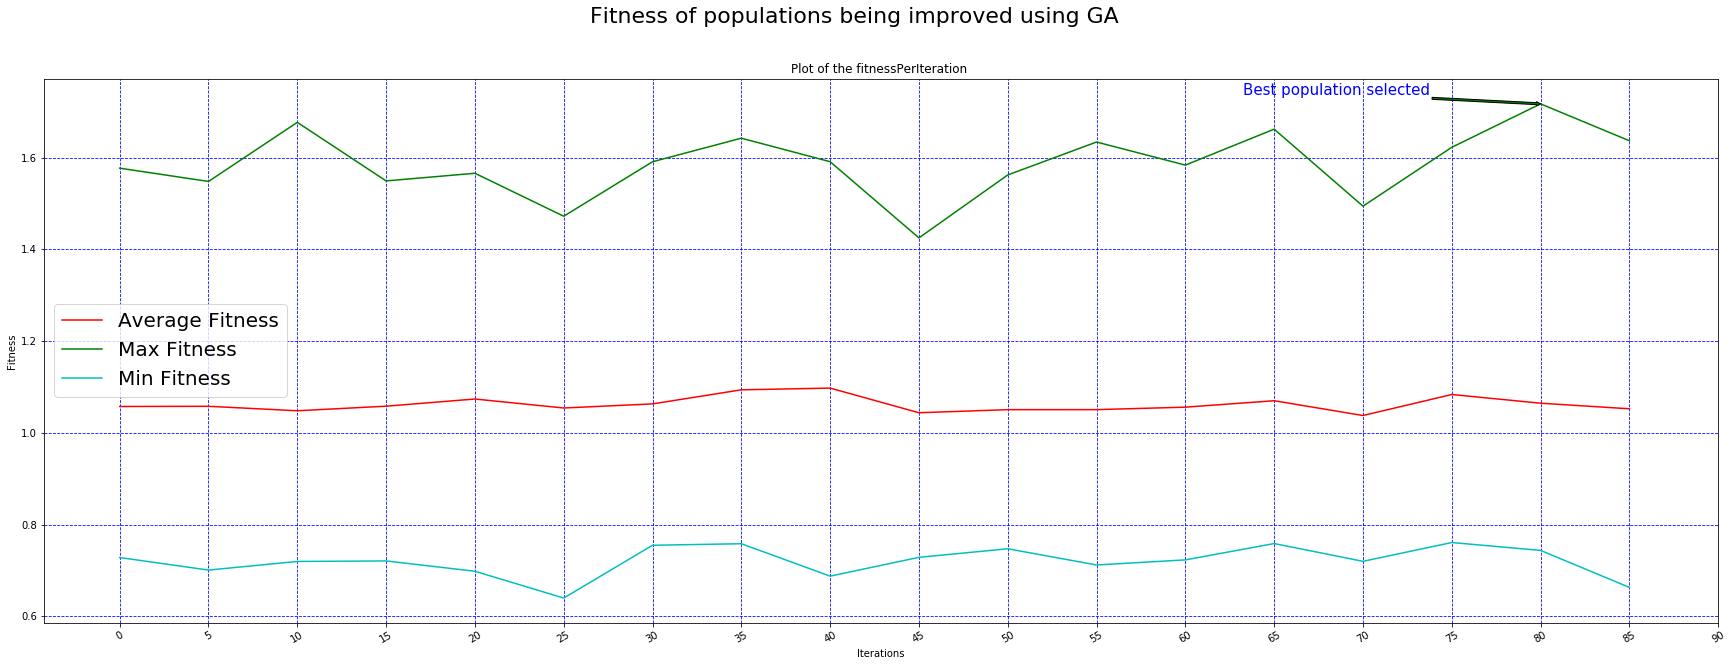

In [56]:
#plot fitnessPerGeneration
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(1, 1, 1)
#set title of the graph/plot
ax.set_title('Plot of the fitnessPerIteration ')
#ax.set_xlabel('Date')
ax.plot(avgFitnessPerGeneration, 'r', label='Average Fitness')
ax.plot(maxFitnessPerGeneration, 'g', label='Max Fitness')
ax.plot(minFitnessPerGeneration, 'c', label='Min Fitness')
ax.legend(loc='best', prop={'size': 20}) 
_ = fig.suptitle('Fitness of populations being improved using GA', fontsize=22)
ax.grid(color = 'b', linestyle='--')
xticks = list(range(0,len(maxFitnessPerGeneration)+1,1))
xticklabels = [x*5 for x in xticks]
props = {'xlabel': 'Iterations',
         'xticks': xticks,
         'ylabel': 'Fitness'
        }
_ = ax.set(**props)
labels = ax.set_xticklabels(xticklabels, rotation=30, fontsize='medium')
#Annotation
xh = (len(maxFitnessPerGeneration)-2)
yh = np.max(temp_fitness)
_= ax.annotate('Best population selected', 
                xy = (xh, yh), 
                xytext=(ax.get_xlim()[0]+xh-2.5, yh + 0.045),
                arrowprops=dict(facecolor='green', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top', color='blue', size=15
                )

#### The most important features that give the best fitness are:

In [57]:
print(np.ravel(house_features[np.argwhere(bestInd)]))

['MSSubClass' 'MSZoning' 'LotFrontage' 'LotShape' 'LandContour'
 'Utilities' 'Neighborhood' 'Condition1' 'BldgType' 'HouseStyle'
 'OverallQual' 'Exterior1st' 'ExterCond' 'BsmtFinSF1' 'BsmtUnfSF'
 'TotalBsmtSF' 'HeatingQC' 'Electrical' '2ndFlrSF' 'GrLivArea'
 'BsmtHalfBath' 'FullBath' 'HalfBath' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'GarageYrBlt' 'GarageCars'
 'GarageCond' 'EnclosedPorch' '3SsnPorch' 'PoolArea' 'PoolQC' 'Fence'
 'MiscFeature' 'MoSold' 'YrSold' 'SaleType' 'SaleCondition']


**Evaluate with the test set**

In [58]:
def get_predictions_forTest(features):
    #for given feature indexes, this function will get predictions from neural network for the specified features
    mlp = NeuralNetwork(x_train[:,features], y_train)
    predictions = mlp.predict(x_test[:,features])
    return predictions

In [59]:
# get predictions on testset
pred_test = np.frompyfunc(get_predictions_forTest, 1, 1) #Function to get prediction array corresponding to all the slected features
selected_features_test = decode_function(selectedPop) #get selected features by GA
s_predictions_test = pred_test(selected_features_test) #predicted labels for test set
fitness_of_featuresSets_test = fVec(pred = s_predictions_test, real = y_test) #for every predicted array, get the fitness for each individual
fitness_of_featuresSets_test = fitness_of_featuresSets_test.reshape(fitness_of_featuresSets_test.shape[0],1)  #taking the transpose to get proper dimensions for future computations

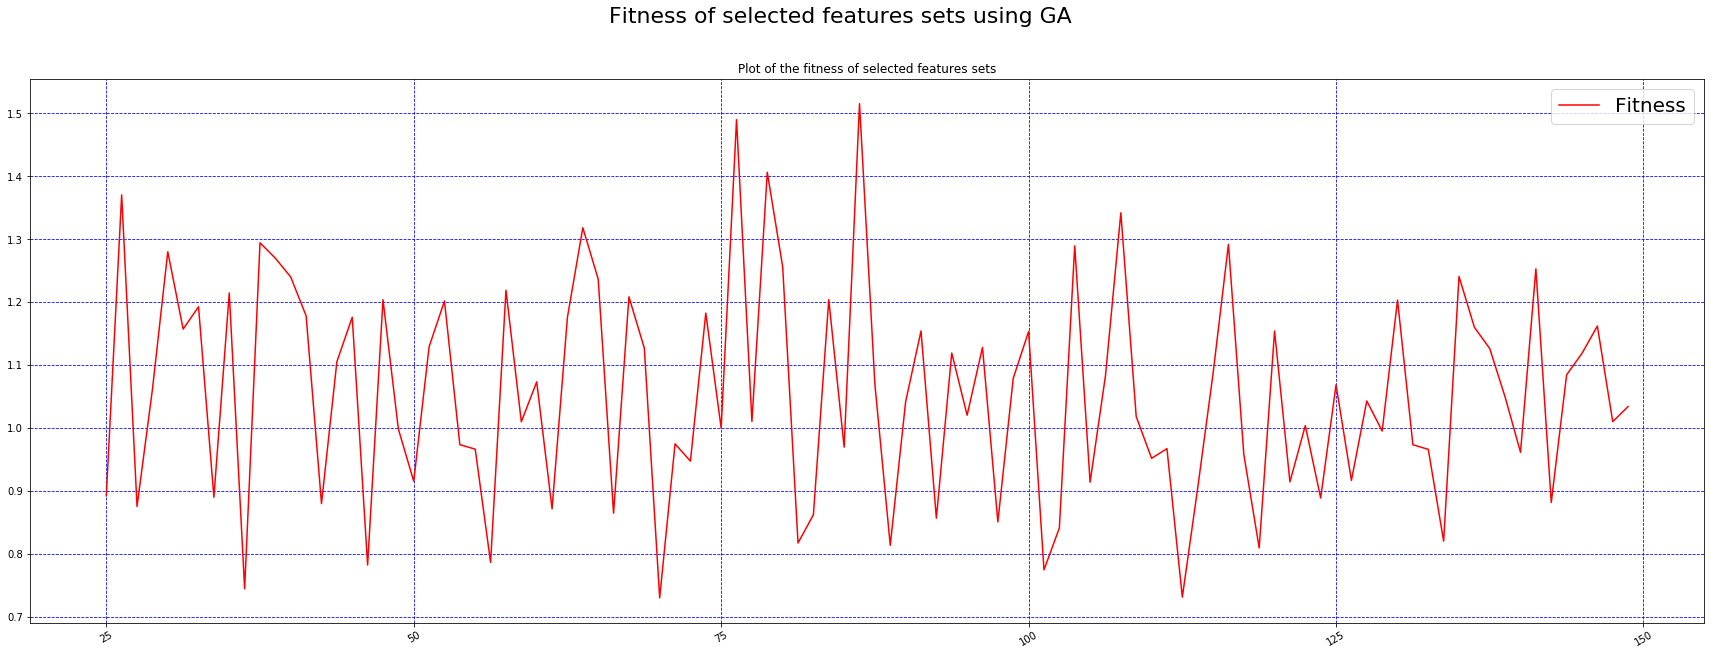

In [75]:
#plot fitness_of_featuresSets_test
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(1, 1, 1)
#set title of the graph/plot
ax.set_title('Plot of the fitness of selected features sets')

ax.plot(fitness_of_featuresSets_test, 'r', label='Fitness')
ax.legend(loc='best', prop={'size': 20}) 
_ = fig.suptitle('Fitness of selected features sets using GA', fontsize=22)
ax.grid(color = 'b', linestyle='--')
xticks = list(range(0,len(fitness_of_featuresSets_test)+1,5))
xticklabels = [x*5 for x in xticks]

labels = ax.set_xticklabels(xticklabels, rotation=30, fontsize='medium')

In [61]:
# Denormalize data after normalizing to get original scale of values

def denormalize(dataset, scaled_data):
    dataset = dataset['SalePrice'].values.reshape(-1,1)
    normalized_data = scaled_data.reshape(-1,1)
    scaler = StandardScaler()
    scaler.fit_transform(dataset)
    return scaler.inverse_transform(normalized_data)

In [62]:
# denormalize y test and predictions
de_y_test = denormalize(testset, y_test)
de_pred = denormalize(testset, s_predictions_test)
# de_pred = np.abs(de_pred)
# make the predictions array flat
fitness_values = np.ravel(fitness_of_featuresSets_test)

de_pred_max = de_pred[np.argmax(fitness_values)][0] # predictions with max fitness in selected features set
de_pred_min = de_pred[np.argmin(fitness_values)][0] # and min fitness

# index of fitness value that's nearest to the average fitness of selected features set
average_idx = (np.abs(fitness_values - np.average(fitness_values))).argmin()
de_pred_average = de_pred[average_idx][0]

In [63]:
def plot_test_result(pred, test_y, fra=0, color='blue', label='predictions'):
    #Plotting real value against prediction value over a period
    fig = plt.figure(1, figsize=(20,12))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title("House Prices's Prediction", fontsize=20)
    ax.plot(test_y[fra:], color='red', label='real', linewidth=3)
    ax.plot(pred[fra:], color=color, label=label, linewidth=3)
        
    ax.legend(loc='best')
    plt.ylabel('Price')
    plt.show()

In [64]:
def mse_result(test, pred):
    MSE = mean_squared_error(test , pred) 
    RMSE = np.sqrt(MSE)
    fitness = 1/RMSE
    print("MSE %.4f"% MSE)
    print("RMSE %.4f"% RMSE)
    print("Fitness %.8f"% fitness)

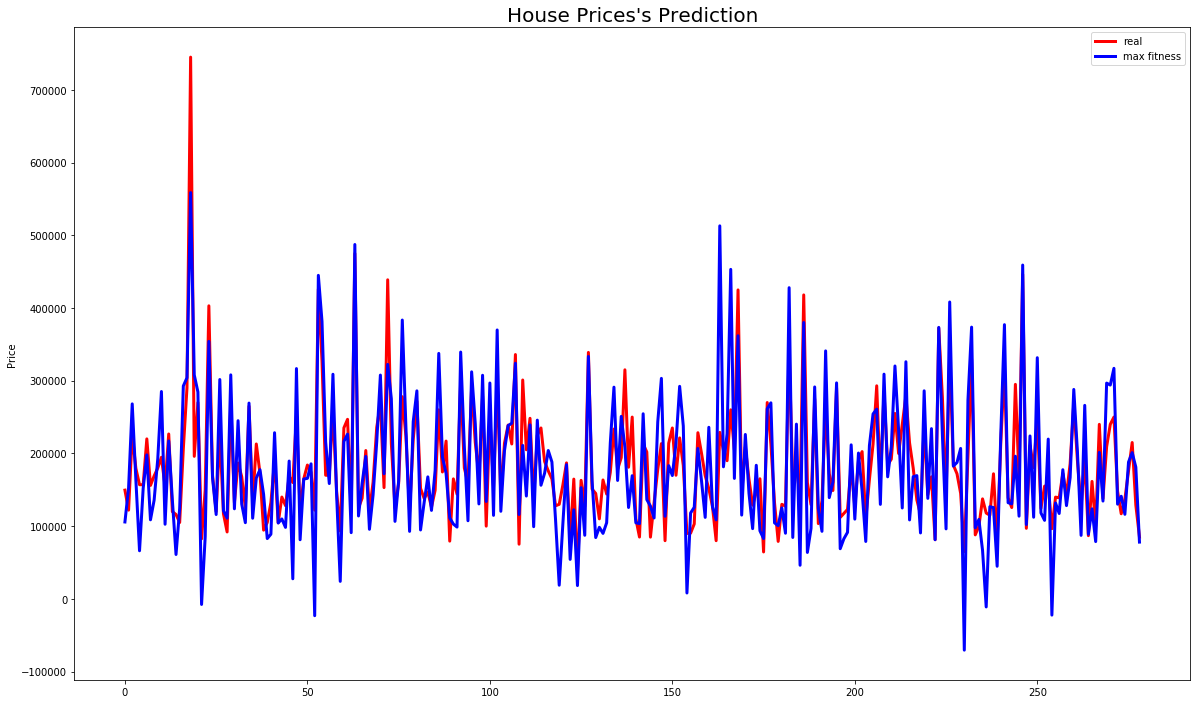

In [65]:
plot_test_result(de_pred_max, de_y_test, fra=600, label='max fitness')

In [66]:
mse_result(de_y_test , de_pred_max)

MSE 2980709998.6613
RMSE 54595.8790
Fitness 0.00001832


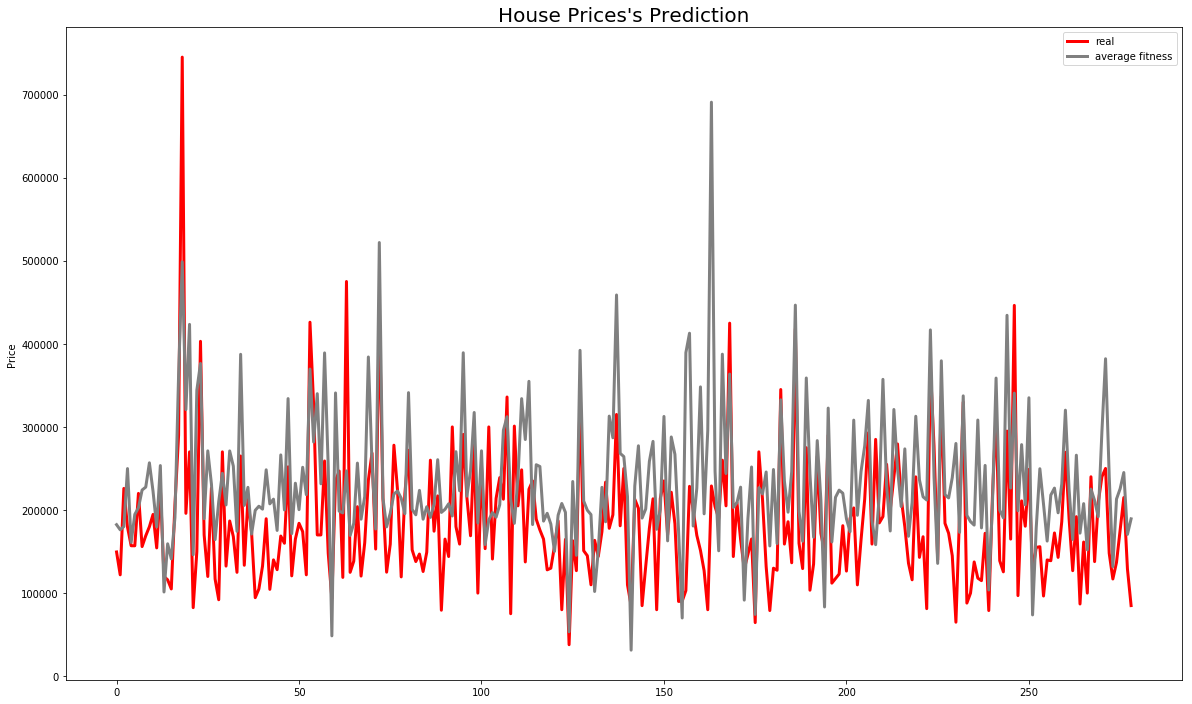

In [67]:
plot_test_result(de_pred_average, de_y_test, fra=600, color='gray', label='average fitness')

In [68]:
mse_result(de_y_test , de_pred_average)

MSE 6080455507.3518
RMSE 77977.2756
Fitness 0.00001282


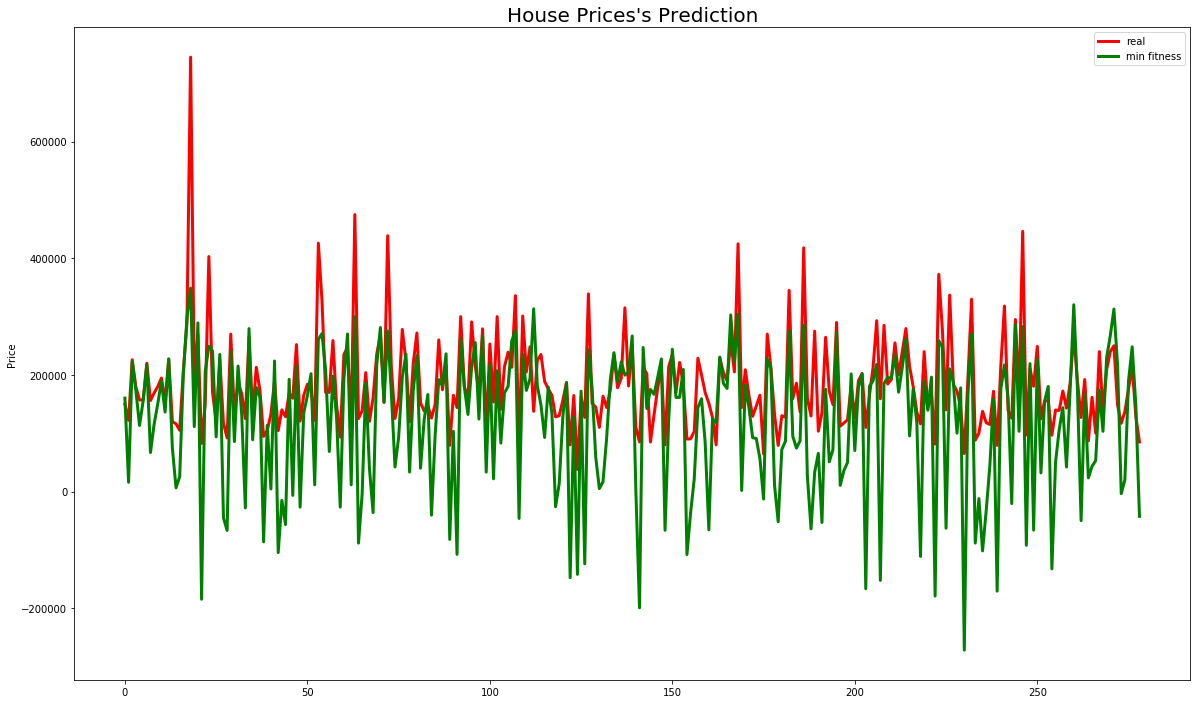

In [69]:
plot_test_result(de_pred_min, de_y_test, fra=600, color='green', label='min fitness')

In [70]:
mse_result(de_y_test , de_pred_min)

MSE 12838898103.2783
RMSE 113308.8615
Fitness 0.00000883


### House prices's prediction without feature selection:

In [71]:
# create mlp model, then we fit the training data to the model and we use x_test to get the predictions
mlp = MLPRegressor(hidden_layer_sizes=(10),activation='relu',solver='lbfgs',max_iter=1,)
mlp.fit(x_train, y_train)  
pred = mlp.predict(x_test)

In [72]:
# Denormalize the data to get the original scale of values
de_pred = denormalize(testset, pred)
mse_result(de_y_test, de_pred)

MSE 6749925761.0119
RMSE 82157.9318
Fitness 0.00001217


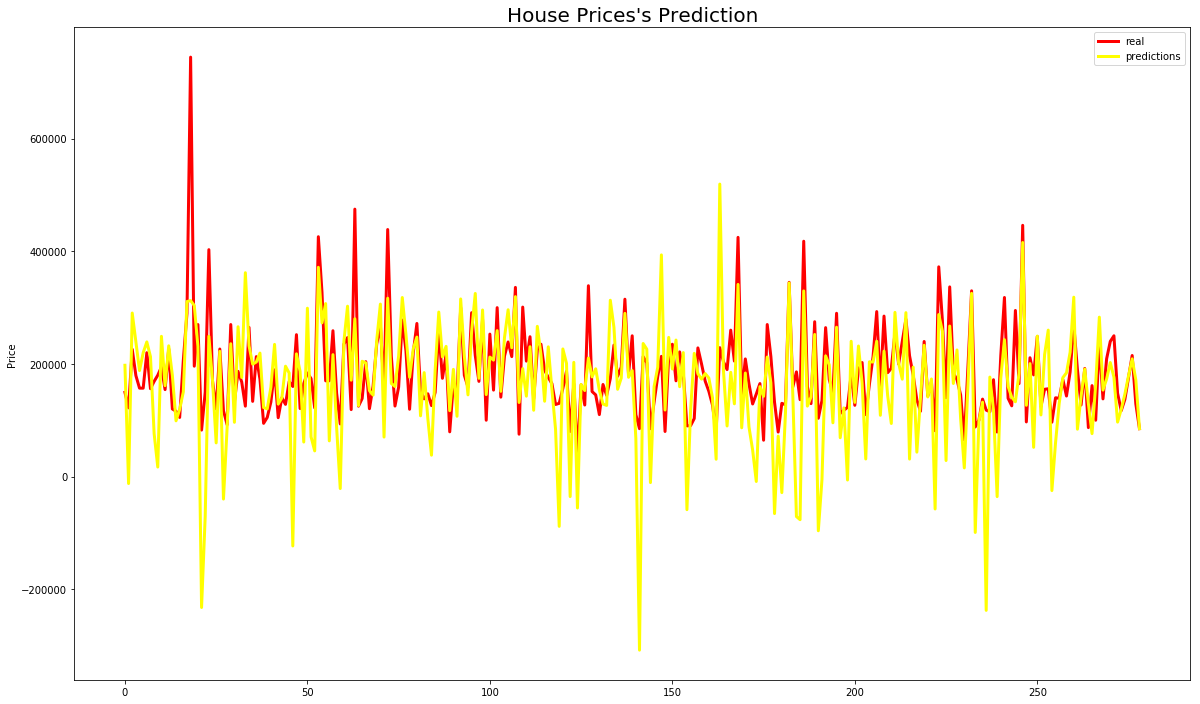

In [73]:
# Plot real values against prediction values 
plot_test_result(de_pred, de_y_test, fra=600, color='yellow', label='predictions')